In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from natsort import natsorted
%matplotlib inline
from pyeer.eer_info import get_eer_stats
from pyeer.report import generate_eer_report, export_error_rates
from pyeer.plot import *

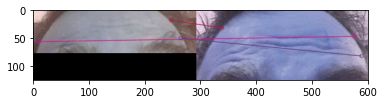

(<matplotlib.image.AxesImage at 0x1a385441780>, None)

In [25]:

# read images
img1 = cv2.imread('C:/SIFT/forhead/s1/1_P1_S1_1.jpg')  
img2 = cv2.imread('C:/SIFT/forhead/s2/1_P1_S2_2.jpg') 
#sift
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

In [26]:
file1 = open("sift.txt", "w")
path1 = 'C:/SIFT/forhead/s1'
path2 = 'C:/SIFT/forhead/s2'
#path 1 for session1 and path 2 for session 2
sift = cv2.xfeatures2d.SIFT_create()
bf = cv2.BFMatcher()
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    img1 = os.path.join(path1, images)
    img1 = cv2.imread(img1)
    img1 = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    ###############################################################################################################
        #feature enhancement
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img1 = cv2.GaussianBlur(img1,(5,5),2)
    img1 = cv2.medianBlur(img1,3) 
    img1 = cv2.bilateralFilter(img1,7,100,100)
    img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
    ###############################################################################################################
    kp1, des1 = sift.detectAndCompute(img1,None)
    if len(kp1)>0:
        for image in natsorted(os.listdir(path2)):
            img2 = os.path.join(path2, image)
            str2 = str(image)
            if (img1 != img2): # queryImage
                img2 = cv2.imread(img2) # trainImage
                img2 = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
                kp2, des2 = sift.detectAndCompute(img2,None)
                if len(kp2) == 0:
                    continue
                matches = bf.knnMatch(des1,des2, k=2)
                dis = bf.match(des1,des2)
            #----------------------------------------------
                number_keypoints = 0
                if len(kp1) <= len(kp2):
                    number_keypoints = len(kp1)
                else:
                    number_keypoints = len(kp2)
                good = []
                for v in matches:
                    if len(v) < 2:
                        continue
                    else:
                        m,n = v
                        if m.distance < 0.7*n.distance:
                            good.append([m])
                #print("GOOD Matches:", len(good))
                score = len(good) / number_keypoints
                file1.write( str1 + " " + str2 + " " + str(score)+"\n")
                print(str1 + " " + str2 + " " + str(score)) # replace with 'cos' if using cosine similarity
file1.close()

C:\Users\Ishu\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


1_P1_S1_1.jpg 1_P1_S2_1.jpg 0.0
1_P1_S1_1.jpg 1_P1_S2_2.jpg 0.0
1_P1_S1_1.jpg 1_P1_S2_3.jpg 0.0
1_P1_S1_1.jpg 1_P2_S2_1.jpg 0.0
1_P1_S1_1.jpg 1_P2_S2_2.jpg 0.0
1_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
1_P1_S1_1.jpg 2_P1_S2_1.jpg 0.0
1_P1_S1_1.jpg 2_P1_S2_2.jpg 0.0
1_P1_S1_1.jpg 2_P1_S2_3.jpg 0.3076923076923077
1_P1_S1_1.jpg 2_P2_S2_1.jpg 0.0
1_P1_S1_1.jpg 2_P2_S2_2.jpg 0.02127659574468085
1_P1_S1_1.jpg 2_P2_S2_3.jpg 0.008849557522123894
1_P1_S1_1.jpg 3_P1_S2_1.jpg 0.0
1_P1_S1_1.jpg 3_P1_S2_2.jpg 0.018867924528301886
1_P1_S1_1.jpg 3_P1_S2_3.jpg 0.0
1_P1_S1_1.jpg 3_P2_S2_1.jpg 0.021739130434782608
1_P1_S1_1.jpg 3_P2_S2_2.jpg 0.0
1_P1_S1_1.jpg 3_P2_S2_3.jpg 0.0
1_P1_S1_1.jpg 4_P1_S2_1.jpg 0.0
1_P1_S1_1.jpg 4_P1_S2_2.jpg 0.1
1_P1_S1_1.jpg 4_P1_S2_3.jpg 0.02631578947368421
1_P1_S1_1.jpg 4_P2_S2_1.jpg 0.0
1_P1_S1_1.jpg 4_P2_S2_2.jpg 0.0
1_P1_S1_1.jpg 4_P2_S2_3.jpg 0.0
1_P1_S1_1.jpg 5_P1_S2_1.jpg 0.0
1_P1_S1_1.jpg 5_P1_S2_2.jpg 0.18181818181818182
1_P1_S1_1.jpg 5_P1_S2_3.jpg 0.0
1_P1_S1_1.jpg 5_P2_S2_

1_P1_S1_2.jpg 11_P2_S2_2.jpg 0.0
1_P1_S1_2.jpg 11_P2_S2_3.jpg 0.0
1_P1_S1_2.jpg 12_P1_S2_1.jpg 0.07692307692307693
1_P1_S1_2.jpg 12_P1_S2_2.jpg 0.0
1_P1_S1_2.jpg 12_P1_S2_3.jpg 0.0
1_P1_S1_2.jpg 12_P2_S2_1.jpg 0.0
1_P1_S1_2.jpg 12_P2_S2_2.jpg 0.0
1_P1_S1_2.jpg 12_P2_S2_3.jpg 0.0
1_P1_S1_2.jpg 13_P1_S2_1.jpg 0.03773584905660377
1_P1_S1_2.jpg 13_P1_S2_2.jpg 0.0
1_P1_S1_2.jpg 13_P1_S2_3.jpg 0.0
1_P1_S1_2.jpg 13_P2_S2_1.jpg 0.0
1_P1_S1_2.jpg 13_P2_S2_2.jpg 0.0
1_P1_S1_2.jpg 13_P2_S2_3.jpg 0.0
1_P1_S1_2.jpg 14_P1_S2_1.jpg 0.0
1_P1_S1_2.jpg 14_P1_S2_2.jpg 0.0
1_P1_S1_2.jpg 14_P1_S2_3.jpg 0.025
1_P1_S1_2.jpg 14_P2_S2_1.jpg 0.024390243902439025
1_P1_S1_2.jpg 14_P2_S2_2.jpg 0.0
1_P1_S1_2.jpg 14_P2_S2_3.jpg 0.0
1_P1_S1_2.jpg 15_P1_S2_1.jpg 0.0
1_P1_S1_2.jpg 15_P1_S2_2.jpg 0.0
1_P1_S1_2.jpg 15_P1_S2_3.jpg 0.0
1_P1_S1_2.jpg 15_P2_S2_1.jpg 0.0
1_P1_S1_2.jpg 15_P2_S2_2.jpg 0.0
1_P1_S1_2.jpg 15_P2_S2_3.jpg 0.021739130434782608
1_P1_S1_2.jpg 16_P1_S2_1.jpg 0.0
1_P1_S1_2.jpg 16_P1_S2_2.jpg 0.0140845070

1_P1_S1_3.jpg 22_P1_S2_1.jpg 0.0
1_P1_S1_3.jpg 22_P1_S2_2.jpg 0.0
1_P1_S1_3.jpg 22_P1_S2_3.jpg 0.0
1_P1_S1_3.jpg 22_P2_S2_1.jpg 0.06666666666666667
1_P1_S1_3.jpg 22_P2_S2_2.jpg 0.0
1_P1_S1_3.jpg 22_P2_S2_3.jpg 0.0
1_P1_S1_3.jpg 23_P1_S2_1.jpg 0.625
1_P1_S1_3.jpg 23_P1_S2_2.jpg 0.0
1_P1_S1_3.jpg 23_P1_S2_3.jpg 0.0
1_P1_S1_3.jpg 23_P2_S2_1.jpg 0.02702702702702703
1_P1_S1_3.jpg 23_P2_S2_2.jpg 0.021739130434782608
1_P1_S1_3.jpg 23_P2_S2_3.jpg 0.0
1_P1_S1_3.jpg 24_P1_S2_1.jpg 0.09090909090909091
1_P1_S1_3.jpg 24_P1_S2_2.jpg 0.1111111111111111
1_P1_S1_3.jpg 24_P1_S2_3.jpg 0.08333333333333333
1_P1_S1_3.jpg 24_P2_S2_1.jpg 0.0
1_P1_S1_3.jpg 24_P2_S2_2.jpg 0.0
1_P1_S1_3.jpg 24_P2_S2_3.jpg 0.0
1_P1_S1_3.jpg 25_P1_S2_1.jpg 0.0
1_P1_S1_3.jpg 25_P1_S2_2.jpg 0.0
1_P1_S1_3.jpg 25_P1_S2_3.jpg 0.0
1_P1_S1_3.jpg 25_P2_S2_1.jpg 0.05263157894736842
1_P1_S1_3.jpg 25_P2_S2_2.jpg 0.0
1_P1_S1_3.jpg 25_P2_S2_3.jpg 0.00909090909090909
1_P1_S1_3.jpg 26_P1_S2_1.jpg 0.02631578947368421
1_P1_S1_3.jpg 26_P1_S2_2.jpg 

1_P2_S1_1.jpg 28_P1_S2_1.jpg 0.06666666666666667
1_P2_S1_1.jpg 28_P1_S2_2.jpg 0.13793103448275862
1_P2_S1_1.jpg 28_P1_S2_3.jpg 0.0
1_P2_S1_1.jpg 28_P2_S2_1.jpg 0.0
1_P2_S1_1.jpg 28_P2_S2_2.jpg 0.025210084033613446
1_P2_S1_1.jpg 28_P2_S2_3.jpg 0.015625
1_P2_S1_2.jpg 1_P1_S2_1.jpg 0.0
1_P2_S1_2.jpg 1_P1_S2_2.jpg 0.0
1_P2_S1_2.jpg 1_P1_S2_3.jpg 0.0
1_P2_S1_2.jpg 1_P2_S2_1.jpg 0.0
1_P2_S1_2.jpg 1_P2_S2_2.jpg 0.0
1_P2_S1_2.jpg 1_P2_S2_3.jpg 0.006097560975609756
1_P2_S1_2.jpg 2_P1_S2_1.jpg 0.0
1_P2_S1_2.jpg 2_P1_S2_2.jpg 0.0
1_P2_S1_2.jpg 2_P1_S2_3.jpg 0.6153846153846154
1_P2_S1_2.jpg 2_P2_S2_1.jpg 0.0
1_P2_S1_2.jpg 2_P2_S2_2.jpg 0.0
1_P2_S1_2.jpg 2_P2_S2_3.jpg 0.014184397163120567
1_P2_S1_2.jpg 3_P1_S2_1.jpg 0.0
1_P2_S1_2.jpg 3_P1_S2_2.jpg 0.07547169811320754
1_P2_S1_2.jpg 3_P1_S2_3.jpg 0.0
1_P2_S1_2.jpg 3_P2_S2_1.jpg 0.0
1_P2_S1_2.jpg 3_P2_S2_2.jpg 0.0
1_P2_S1_2.jpg 3_P2_S2_3.jpg 0.0
1_P2_S1_2.jpg 4_P1_S2_1.jpg 0.0
1_P2_S1_2.jpg 4_P1_S2_2.jpg 0.0
1_P2_S1_2.jpg 4_P1_S2_3.jpg 0.0
1_P2_S1_2.j

1_P2_S1_3.jpg 7_P2_S2_2.jpg 0.6428571428571429
1_P2_S1_3.jpg 7_P2_S2_3.jpg 0.0
1_P2_S1_3.jpg 8_P1_S2_1.jpg 0.23529411764705882
1_P2_S1_3.jpg 8_P1_S2_2.jpg 0.07692307692307693
1_P2_S1_3.jpg 8_P1_S2_3.jpg 0.022727272727272728
1_P2_S1_3.jpg 8_P2_S2_1.jpg 0.13725490196078433
1_P2_S1_3.jpg 8_P2_S2_2.jpg 0.24
1_P2_S1_3.jpg 8_P2_S2_3.jpg 0.2962962962962963
1_P2_S1_3.jpg 9_P1_S2_1.jpg 0.021739130434782608
1_P2_S1_3.jpg 9_P1_S2_2.jpg 0.02127659574468085
1_P2_S1_3.jpg 9_P1_S2_3.jpg 0.0
1_P2_S1_3.jpg 9_P2_S2_1.jpg 0.05263157894736842
1_P2_S1_3.jpg 9_P2_S2_2.jpg 0.0
1_P2_S1_3.jpg 9_P2_S2_3.jpg 0.0
1_P2_S1_3.jpg 10_P1_S2_1.jpg 0.09090909090909091
1_P2_S1_3.jpg 10_P1_S2_2.jpg 0.06060606060606061
1_P2_S1_3.jpg 10_P1_S2_3.jpg 0.06451612903225806
1_P2_S1_3.jpg 10_P2_S2_1.jpg 0.0
1_P2_S1_3.jpg 10_P2_S2_2.jpg 0.0
1_P2_S1_3.jpg 10_P2_S2_3.jpg 0.0
1_P2_S1_3.jpg 11_P1_S2_1.jpg 0.03571428571428571
1_P2_S1_3.jpg 11_P1_S2_2.jpg 0.13725490196078433
1_P2_S1_3.jpg 11_P1_S2_3.jpg 0.023809523809523808
1_P2_S1_3.jpg

2_P1_S1_1.jpg 11_P2_S2_3.jpg 0.15384615384615385
2_P1_S1_1.jpg 12_P1_S2_1.jpg 0.23076923076923078
2_P1_S1_1.jpg 12_P1_S2_2.jpg 0.07547169811320754
2_P1_S1_1.jpg 12_P1_S2_3.jpg 0.0
2_P1_S1_1.jpg 12_P2_S2_1.jpg 0.3333333333333333
2_P1_S1_1.jpg 12_P2_S2_2.jpg 0.10810810810810811
2_P1_S1_1.jpg 12_P2_S2_3.jpg 0.07547169811320754
2_P1_S1_1.jpg 13_P1_S2_1.jpg 0.0
2_P1_S1_1.jpg 13_P1_S2_2.jpg 0.0
2_P1_S1_1.jpg 13_P1_S2_3.jpg 0.0
2_P1_S1_1.jpg 13_P2_S2_1.jpg 0.0
2_P1_S1_1.jpg 13_P2_S2_2.jpg 0.17647058823529413
2_P1_S1_1.jpg 13_P2_S2_3.jpg 0.09090909090909091
2_P1_S1_1.jpg 14_P1_S2_1.jpg 0.0425531914893617
2_P1_S1_1.jpg 14_P1_S2_2.jpg 0.07407407407407407
2_P1_S1_1.jpg 14_P1_S2_3.jpg 0.0
2_P1_S1_1.jpg 14_P2_S2_1.jpg 0.0
2_P1_S1_1.jpg 14_P2_S2_2.jpg 0.0
2_P1_S1_1.jpg 14_P2_S2_3.jpg 0.02040816326530612
2_P1_S1_1.jpg 15_P1_S2_1.jpg 0.2
2_P1_S1_1.jpg 15_P1_S2_2.jpg 0.1
2_P1_S1_1.jpg 15_P1_S2_3.jpg 0.16666666666666666
2_P1_S1_1.jpg 15_P2_S2_1.jpg 0.2
2_P1_S1_1.jpg 15_P2_S2_2.jpg 0.045454545454545456
2

2_P1_S1_2.jpg 18_P1_S2_1.jpg 0.0
2_P1_S1_2.jpg 18_P1_S2_2.jpg 0.0
2_P1_S1_2.jpg 18_P1_S2_3.jpg 0.0
2_P1_S1_2.jpg 18_P2_S2_1.jpg 0.0
2_P1_S1_2.jpg 18_P2_S2_2.jpg 0.0
2_P1_S1_2.jpg 18_P2_S2_3.jpg 0.0
2_P1_S1_2.jpg 19_P1_S2_1.jpg 0.09090909090909091
2_P1_S1_2.jpg 19_P1_S2_2.jpg 1.0909090909090908
2_P1_S1_2.jpg 19_P1_S2_3.jpg 0.9
2_P1_S1_2.jpg 19_P2_S2_1.jpg 0.125
2_P1_S1_2.jpg 19_P2_S2_2.jpg 0.9
2_P1_S1_2.jpg 19_P2_S2_3.jpg 3.0
2_P1_S1_2.jpg 20_P1_S2_1.jpg 2.25
2_P1_S1_2.jpg 20_P1_S2_2.jpg 0.0
2_P1_S1_2.jpg 20_P1_S2_3.jpg 0.4444444444444444
2_P1_S1_2.jpg 20_P2_S2_1.jpg 1.4
2_P1_S1_2.jpg 20_P2_S2_2.jpg 0.0
2_P1_S1_2.jpg 20_P2_S2_3.jpg 0.06666666666666667
2_P1_S1_2.jpg 21_P1_S2_1.jpg 0.0
2_P1_S1_2.jpg 21_P1_S2_2.jpg 0.0
2_P1_S1_2.jpg 21_P1_S2_3.jpg 0.04081632653061224
2_P1_S1_2.jpg 21_P2_S2_1.jpg 0.0625
2_P1_S1_2.jpg 21_P2_S2_2.jpg 0.0
2_P1_S1_2.jpg 21_P2_S2_3.jpg 0.023529411764705882
2_P1_S1_2.jpg 22_P1_S2_1.jpg 0.4
2_P1_S1_2.jpg 22_P1_S2_2.jpg 0.0
2_P1_S1_2.jpg 22_P1_S2_3.jpg 0.0588235294

2_P1_S1_3.jpg 28_P2_S2_2.jpg 0.008403361344537815
2_P1_S1_3.jpg 28_P2_S2_3.jpg 0.0
2_P2_S1_1.jpg 1_P1_S2_1.jpg 0.0
2_P2_S1_1.jpg 1_P1_S2_2.jpg 0.007352941176470588
2_P2_S1_1.jpg 1_P1_S2_3.jpg 0.0
2_P2_S1_1.jpg 1_P2_S2_1.jpg 0.0
2_P2_S1_1.jpg 1_P2_S2_2.jpg 0.0033444816053511705
2_P2_S1_1.jpg 1_P2_S2_3.jpg 0.0
2_P2_S1_1.jpg 2_P1_S2_1.jpg 0.0
2_P2_S1_1.jpg 2_P1_S2_2.jpg 0.16666666666666666
2_P2_S1_1.jpg 2_P1_S2_3.jpg 0.6923076923076923
2_P2_S1_1.jpg 2_P2_S2_1.jpg 0.0
2_P2_S1_1.jpg 2_P2_S2_2.jpg 0.06382978723404255
2_P2_S1_1.jpg 2_P2_S2_3.jpg 0.02127659574468085
2_P2_S1_1.jpg 3_P1_S2_1.jpg 0.007874015748031496
2_P2_S1_1.jpg 3_P1_S2_2.jpg 0.09433962264150944
2_P2_S1_1.jpg 3_P1_S2_3.jpg 0.04838709677419355
2_P2_S1_1.jpg 3_P2_S2_1.jpg 0.043478260869565216
2_P2_S1_1.jpg 3_P2_S2_2.jpg 0.0784313725490196
2_P2_S1_1.jpg 3_P2_S2_3.jpg 0.0
2_P2_S1_1.jpg 4_P1_S2_1.jpg 0.08333333333333333
2_P2_S1_1.jpg 4_P1_S2_2.jpg 0.3
2_P2_S1_1.jpg 4_P1_S2_3.jpg 0.05263157894736842
2_P2_S1_1.jpg 4_P2_S2_1.jpg 0.0246

2_P2_S1_2.jpg 5_P1_S2_2.jpg 0.0
2_P2_S1_2.jpg 5_P1_S2_3.jpg 0.0
2_P2_S1_2.jpg 5_P2_S2_1.jpg 0.0425531914893617
2_P2_S1_2.jpg 5_P2_S2_2.jpg 2.0
2_P2_S1_2.jpg 5_P2_S2_3.jpg 0.375
2_P2_S1_2.jpg 6_P1_S2_1.jpg 0.047619047619047616
2_P2_S1_2.jpg 6_P1_S2_2.jpg 0.011363636363636364
2_P2_S1_2.jpg 6_P1_S2_3.jpg 0.2702702702702703
2_P2_S1_2.jpg 6_P2_S2_1.jpg 0.03508771929824561
2_P2_S1_2.jpg 6_P2_S2_2.jpg 0.0
2_P2_S1_2.jpg 6_P2_S2_3.jpg 0.1111111111111111
2_P2_S1_2.jpg 7_P1_S2_1.jpg 0.02702702702702703
2_P2_S1_2.jpg 7_P1_S2_2.jpg 0.42857142857142855
2_P2_S1_2.jpg 7_P1_S2_3.jpg 0.025
2_P2_S1_2.jpg 7_P2_S2_1.jpg 0.4444444444444444
2_P2_S1_2.jpg 7_P2_S2_2.jpg 0.6428571428571429
2_P2_S1_2.jpg 7_P2_S2_3.jpg 0.0
2_P2_S1_2.jpg 8_P1_S2_1.jpg 0.35294117647058826
2_P2_S1_2.jpg 8_P1_S2_2.jpg 0.23076923076923078
2_P2_S1_2.jpg 8_P1_S2_3.jpg 0.09090909090909091
2_P2_S1_2.jpg 8_P2_S2_1.jpg 0.0784313725490196
2_P2_S1_2.jpg 8_P2_S2_2.jpg 0.28
2_P2_S1_2.jpg 8_P2_S2_3.jpg 0.4444444444444444
2_P2_S1_2.jpg 9_P1_S2_1.

2_P2_S1_3.jpg 9_P2_S2_2.jpg 0.029411764705882353
2_P2_S1_3.jpg 9_P2_S2_3.jpg 0.0
2_P2_S1_3.jpg 10_P1_S2_1.jpg 0.06060606060606061
2_P2_S1_3.jpg 10_P1_S2_2.jpg 0.0
2_P2_S1_3.jpg 10_P1_S2_3.jpg 0.06451612903225806
2_P2_S1_3.jpg 10_P2_S2_1.jpg 0.0
2_P2_S1_3.jpg 10_P2_S2_2.jpg 0.023809523809523808
2_P2_S1_3.jpg 10_P2_S2_3.jpg 0.0
2_P2_S1_3.jpg 11_P1_S2_1.jpg 0.017857142857142856
2_P2_S1_3.jpg 11_P1_S2_2.jpg 0.49019607843137253
2_P2_S1_3.jpg 11_P1_S2_3.jpg 0.023809523809523808
2_P2_S1_3.jpg 11_P2_S2_1.jpg 0.5384615384615384
2_P2_S1_3.jpg 11_P2_S2_2.jpg 0.4444444444444444
2_P2_S1_3.jpg 11_P2_S2_3.jpg 0.0
2_P2_S1_3.jpg 12_P1_S2_1.jpg 0.11538461538461539
2_P2_S1_3.jpg 12_P1_S2_2.jpg 0.03773584905660377
2_P2_S1_3.jpg 12_P1_S2_3.jpg 0.0
2_P2_S1_3.jpg 12_P2_S2_1.jpg 0.125
2_P2_S1_3.jpg 12_P2_S2_2.jpg 0.08108108108108109
2_P2_S1_3.jpg 12_P2_S2_3.jpg 0.05660377358490566
2_P2_S1_3.jpg 13_P1_S2_1.jpg 0.03773584905660377
2_P2_S1_3.jpg 13_P1_S2_2.jpg 0.03571428571428571
2_P2_S1_3.jpg 13_P1_S2_3.jpg 0.1

3_P1_S1_1.jpg 15_P2_S2_2.jpg 0.022727272727272728
3_P1_S1_1.jpg 15_P2_S2_3.jpg 0.043478260869565216
3_P1_S1_1.jpg 16_P1_S2_1.jpg 0.0
3_P1_S1_1.jpg 16_P1_S2_2.jpg 0.0
3_P1_S1_1.jpg 16_P1_S2_3.jpg 0.010101010101010102
3_P1_S1_1.jpg 16_P2_S2_1.jpg 0.0
3_P1_S1_1.jpg 16_P2_S2_2.jpg 0.0
3_P1_S1_1.jpg 16_P2_S2_3.jpg 0.01282051282051282
3_P1_S1_1.jpg 17_P1_S2_1.jpg 0.04878048780487805
3_P1_S1_1.jpg 17_P1_S2_2.jpg 0.02702702702702703
3_P1_S1_1.jpg 17_P1_S2_3.jpg 0.04
3_P1_S1_1.jpg 17_P2_S2_1.jpg 0.0
3_P1_S1_1.jpg 17_P2_S2_2.jpg 0.020833333333333332
3_P1_S1_1.jpg 17_P2_S2_3.jpg 0.0
3_P1_S1_1.jpg 18_P1_S2_1.jpg 0.0
3_P1_S1_1.jpg 18_P1_S2_2.jpg 0.0
3_P1_S1_1.jpg 18_P1_S2_3.jpg 0.0
3_P1_S1_1.jpg 18_P2_S2_1.jpg 0.017857142857142856
3_P1_S1_1.jpg 18_P2_S2_2.jpg 0.0
3_P1_S1_1.jpg 18_P2_S2_3.jpg 0.0
3_P1_S1_1.jpg 19_P1_S2_1.jpg 0.2727272727272727
3_P1_S1_1.jpg 19_P1_S2_2.jpg 0.7272727272727273
3_P1_S1_1.jpg 19_P1_S2_3.jpg 0.5
3_P1_S1_1.jpg 19_P2_S2_1.jpg 0.25
3_P1_S1_1.jpg 19_P2_S2_2.jpg 0.3
3_P1_S1_1.

3_P1_S1_2.jpg 21_P1_S2_3.jpg 0.04081632653061224
3_P1_S1_2.jpg 21_P2_S2_1.jpg 0.05
3_P1_S1_2.jpg 21_P2_S2_2.jpg 0.05405405405405406
3_P1_S1_2.jpg 21_P2_S2_3.jpg 0.03529411764705882
3_P1_S1_2.jpg 22_P1_S2_1.jpg 0.1
3_P1_S1_2.jpg 22_P1_S2_2.jpg 0.0
3_P1_S1_2.jpg 22_P1_S2_3.jpg 0.0
3_P1_S1_2.jpg 22_P2_S2_1.jpg 0.13333333333333333
3_P1_S1_2.jpg 22_P2_S2_2.jpg 0.05
3_P1_S1_2.jpg 22_P2_S2_3.jpg 0.05555555555555555
3_P1_S1_2.jpg 23_P1_S2_1.jpg 0.0
3_P1_S1_2.jpg 23_P1_S2_2.jpg 0.047619047619047616
3_P1_S1_2.jpg 23_P1_S2_3.jpg 0.0625
3_P1_S1_2.jpg 23_P2_S2_1.jpg 0.0
3_P1_S1_2.jpg 23_P2_S2_2.jpg 0.043478260869565216
3_P1_S1_2.jpg 23_P2_S2_3.jpg 0.013513513513513514
3_P1_S1_2.jpg 24_P1_S2_1.jpg 0.22727272727272727
3_P1_S1_2.jpg 24_P1_S2_2.jpg 0.0
3_P1_S1_2.jpg 24_P1_S2_3.jpg 0.25
3_P1_S1_2.jpg 24_P2_S2_1.jpg 0.0
3_P1_S1_2.jpg 24_P2_S2_2.jpg 0.02702702702702703
3_P1_S1_2.jpg 24_P2_S2_3.jpg 0.05405405405405406
3_P1_S1_2.jpg 25_P1_S2_1.jpg 0.05263157894736842
3_P1_S1_2.jpg 25_P1_S2_2.jpg 0.04
3_P1_S

3_P1_S1_3.jpg 27_P2_S2_1.jpg 0.0
3_P1_S1_3.jpg 27_P2_S2_2.jpg 0.45454545454545453
3_P1_S1_3.jpg 27_P2_S2_3.jpg 0.011764705882352941
3_P1_S1_3.jpg 28_P1_S2_1.jpg 0.13333333333333333
3_P1_S1_3.jpg 28_P1_S2_2.jpg 0.017241379310344827
3_P1_S1_3.jpg 28_P1_S2_3.jpg 0.0
3_P1_S1_3.jpg 28_P2_S2_1.jpg 0.013333333333333334
3_P1_S1_3.jpg 28_P2_S2_2.jpg 0.008403361344537815
3_P1_S1_3.jpg 28_P2_S2_3.jpg 0.0
3_P2_S1_1.jpg 1_P1_S2_1.jpg 0.015625
3_P2_S1_1.jpg 1_P1_S2_2.jpg 0.0
3_P2_S1_1.jpg 1_P1_S2_3.jpg 0.0
3_P2_S1_1.jpg 1_P2_S2_1.jpg 0.0
3_P2_S1_1.jpg 1_P2_S2_2.jpg 0.0033444816053511705
3_P2_S1_1.jpg 1_P2_S2_3.jpg 0.0
3_P2_S1_1.jpg 2_P1_S2_1.jpg 0.0
3_P2_S1_1.jpg 2_P1_S2_2.jpg 0.16666666666666666
3_P2_S1_1.jpg 2_P1_S2_3.jpg 0.6153846153846154
3_P2_S1_1.jpg 2_P2_S2_1.jpg 0.02727272727272727
3_P2_S1_1.jpg 2_P2_S2_2.jpg 0.14893617021276595
3_P2_S1_1.jpg 2_P2_S2_3.jpg 0.06382978723404255
3_P2_S1_1.jpg 3_P1_S2_1.jpg 0.007874015748031496
3_P2_S1_1.jpg 3_P1_S2_2.jpg 0.07547169811320754
3_P2_S1_1.jpg 3_P1_S

3_P2_S1_2.jpg 3_P1_S2_1.jpg 0.007874015748031496
3_P2_S1_2.jpg 3_P1_S2_2.jpg 0.07547169811320754
3_P2_S1_2.jpg 3_P1_S2_3.jpg 0.03225806451612903
3_P2_S1_2.jpg 3_P2_S2_1.jpg 0.03260869565217391
3_P2_S1_2.jpg 3_P2_S2_2.jpg 0.058823529411764705
3_P2_S1_2.jpg 3_P2_S2_3.jpg 0.016129032258064516
3_P2_S1_2.jpg 4_P1_S2_1.jpg 0.1388888888888889
3_P2_S1_2.jpg 4_P1_S2_2.jpg 0.4
3_P2_S1_2.jpg 4_P1_S2_3.jpg 0.0
3_P2_S1_2.jpg 4_P2_S2_1.jpg 0.012345679012345678
3_P2_S1_2.jpg 4_P2_S2_2.jpg 0.4117647058823529
3_P2_S1_2.jpg 4_P2_S2_3.jpg 0.15384615384615385
3_P2_S1_2.jpg 5_P1_S2_1.jpg 0.08571428571428572
3_P2_S1_2.jpg 5_P1_S2_2.jpg 0.0
3_P2_S1_2.jpg 5_P1_S2_3.jpg 0.0
3_P2_S1_2.jpg 5_P2_S2_1.jpg 0.06382978723404255
3_P2_S1_2.jpg 5_P2_S2_2.jpg 1.0
3_P2_S1_2.jpg 5_P2_S2_3.jpg 1.125
3_P2_S1_2.jpg 6_P1_S2_1.jpg 0.047619047619047616
3_P2_S1_2.jpg 6_P1_S2_2.jpg 0.011363636363636364
3_P2_S1_2.jpg 6_P1_S2_3.jpg 0.13513513513513514
3_P2_S1_2.jpg 6_P2_S2_1.jpg 0.017543859649122806
3_P2_S1_2.jpg 6_P2_S2_2.jpg 0.017

3_P2_S1_3.jpg 7_P2_S2_2.jpg 0.2857142857142857
3_P2_S1_3.jpg 7_P2_S2_3.jpg 0.0
3_P2_S1_3.jpg 8_P1_S2_1.jpg 0.058823529411764705
3_P2_S1_3.jpg 8_P1_S2_2.jpg 0.0
3_P2_S1_3.jpg 8_P1_S2_3.jpg 0.09090909090909091
3_P2_S1_3.jpg 8_P2_S2_1.jpg 0.058823529411764705
3_P2_S1_3.jpg 8_P2_S2_2.jpg 0.04
3_P2_S1_3.jpg 8_P2_S2_3.jpg 0.037037037037037035
3_P2_S1_3.jpg 9_P1_S2_1.jpg 0.0
3_P2_S1_3.jpg 9_P1_S2_2.jpg 0.02127659574468085
3_P2_S1_3.jpg 9_P1_S2_3.jpg 0.02040816326530612
3_P2_S1_3.jpg 9_P2_S2_1.jpg 0.0
3_P2_S1_3.jpg 9_P2_S2_2.jpg 0.029411764705882353
3_P2_S1_3.jpg 9_P2_S2_3.jpg 0.0392156862745098
3_P2_S1_3.jpg 10_P1_S2_1.jpg 0.06060606060606061
3_P2_S1_3.jpg 10_P1_S2_2.jpg 0.0
3_P2_S1_3.jpg 10_P1_S2_3.jpg 0.03225806451612903
3_P2_S1_3.jpg 10_P2_S2_1.jpg 0.0
3_P2_S1_3.jpg 10_P2_S2_2.jpg 0.023809523809523808
3_P2_S1_3.jpg 10_P2_S2_3.jpg 0.0
3_P2_S1_3.jpg 11_P1_S2_1.jpg 0.017857142857142856
3_P2_S1_3.jpg 11_P1_S2_2.jpg 0.09803921568627451
3_P2_S1_3.jpg 11_P1_S2_3.jpg 0.023809523809523808
3_P2_S1_3

4_P1_S1_1.jpg 13_P2_S2_1.jpg 0.03225806451612903
4_P1_S1_1.jpg 13_P2_S2_2.jpg 0.058823529411764705
4_P1_S1_1.jpg 13_P2_S2_3.jpg 0.0
4_P1_S1_1.jpg 14_P1_S2_1.jpg 0.0
4_P1_S1_1.jpg 14_P1_S2_2.jpg 0.037037037037037035
4_P1_S1_1.jpg 14_P1_S2_3.jpg 0.0
4_P1_S1_1.jpg 14_P2_S2_1.jpg 0.0
4_P1_S1_1.jpg 14_P2_S2_2.jpg 0.0
4_P1_S1_1.jpg 14_P2_S2_3.jpg 0.0
4_P1_S1_1.jpg 15_P1_S2_1.jpg 0.13333333333333333
4_P1_S1_1.jpg 15_P1_S2_2.jpg 0.05
4_P1_S1_1.jpg 15_P1_S2_3.jpg 0.25
4_P1_S1_1.jpg 15_P2_S2_1.jpg 0.175
4_P1_S1_1.jpg 15_P2_S2_2.jpg 0.022727272727272728
4_P1_S1_1.jpg 15_P2_S2_3.jpg 0.021739130434782608
4_P1_S1_1.jpg 16_P1_S2_1.jpg 0.0
4_P1_S1_1.jpg 16_P1_S2_2.jpg 0.014084507042253521
4_P1_S1_1.jpg 16_P1_S2_3.jpg 0.020202020202020204
4_P1_S1_1.jpg 16_P2_S2_1.jpg 0.0
4_P1_S1_1.jpg 16_P2_S2_2.jpg 0.0
4_P1_S1_1.jpg 16_P2_S2_3.jpg 0.0
4_P1_S1_1.jpg 17_P1_S2_1.jpg 0.0
4_P1_S1_1.jpg 17_P1_S2_2.jpg 0.02702702702702703
4_P1_S1_1.jpg 17_P1_S2_3.jpg 0.02
4_P1_S1_1.jpg 17_P2_S2_1.jpg 0.025
4_P1_S1_1.jpg 17_P

4_P1_S1_2.jpg 21_P2_S2_1.jpg 0.025
4_P1_S1_2.jpg 21_P2_S2_2.jpg 0.0
4_P1_S1_2.jpg 21_P2_S2_3.jpg 0.011764705882352941
4_P1_S1_2.jpg 22_P1_S2_1.jpg 0.0
4_P1_S1_2.jpg 22_P1_S2_2.jpg 0.0
4_P1_S1_2.jpg 22_P1_S2_3.jpg 0.0
4_P1_S1_2.jpg 22_P2_S2_1.jpg 0.06666666666666667
4_P1_S1_2.jpg 22_P2_S2_2.jpg 0.05
4_P1_S1_2.jpg 22_P2_S2_3.jpg 0.0
4_P1_S1_2.jpg 23_P1_S2_1.jpg 0.125
4_P1_S1_2.jpg 23_P1_S2_2.jpg 0.0
4_P1_S1_2.jpg 23_P1_S2_3.jpg 0.125
4_P1_S1_2.jpg 23_P2_S2_1.jpg 0.02702702702702703
4_P1_S1_2.jpg 23_P2_S2_2.jpg 0.021739130434782608
4_P1_S1_2.jpg 23_P2_S2_3.jpg 0.0
4_P1_S1_2.jpg 24_P1_S2_1.jpg 0.09090909090909091
4_P1_S1_2.jpg 24_P1_S2_2.jpg 0.0
4_P1_S1_2.jpg 24_P1_S2_3.jpg 0.08333333333333333
4_P1_S1_2.jpg 24_P2_S2_1.jpg 0.0
4_P1_S1_2.jpg 24_P2_S2_2.jpg 0.05405405405405406
4_P1_S1_2.jpg 24_P2_S2_3.jpg 0.02702702702702703
4_P1_S1_2.jpg 25_P1_S2_1.jpg 0.0
4_P1_S1_2.jpg 25_P1_S2_2.jpg 0.0
4_P1_S1_2.jpg 25_P1_S2_3.jpg 0.10526315789473684
4_P1_S1_2.jpg 25_P2_S2_1.jpg 0.10526315789473684
4_P1_S

4_P1_S1_3.jpg 27_P2_S2_2.jpg 0.8181818181818182
4_P1_S1_3.jpg 27_P2_S2_3.jpg 0.0
4_P1_S1_3.jpg 28_P1_S2_1.jpg 0.06666666666666667
4_P1_S1_3.jpg 28_P1_S2_2.jpg 0.017241379310344827
4_P1_S1_3.jpg 28_P1_S2_3.jpg 0.0
4_P1_S1_3.jpg 28_P2_S2_1.jpg 0.0
4_P1_S1_3.jpg 28_P2_S2_2.jpg 0.008403361344537815
4_P1_S1_3.jpg 28_P2_S2_3.jpg 0.015625
4_P2_S1_1.jpg 1_P1_S2_1.jpg 0.0
4_P2_S1_1.jpg 1_P1_S2_2.jpg 0.0
4_P2_S1_1.jpg 1_P1_S2_3.jpg 0.0
4_P2_S1_1.jpg 1_P2_S2_1.jpg 0.0
4_P2_S1_1.jpg 1_P2_S2_2.jpg 0.006134969325153374
4_P2_S1_1.jpg 1_P2_S2_3.jpg 0.006134969325153374
4_P2_S1_1.jpg 2_P1_S2_1.jpg 0.0
4_P2_S1_1.jpg 2_P1_S2_2.jpg 0.0
4_P2_S1_1.jpg 2_P1_S2_3.jpg 0.46153846153846156
4_P2_S1_1.jpg 2_P2_S2_1.jpg 0.0
4_P2_S1_1.jpg 2_P2_S2_2.jpg 0.02127659574468085
4_P2_S1_1.jpg 2_P2_S2_3.jpg 0.028368794326241134
4_P2_S1_1.jpg 3_P1_S2_1.jpg 0.0
4_P2_S1_1.jpg 3_P1_S2_2.jpg 0.018867924528301886
4_P2_S1_1.jpg 3_P1_S2_3.jpg 0.0
4_P2_S1_1.jpg 3_P2_S2_1.jpg 0.0
4_P2_S1_1.jpg 3_P2_S2_2.jpg 0.0
4_P2_S1_1.jpg 3_P2_S2_

4_P2_S1_2.jpg 8_P2_S2_1.jpg 0.0392156862745098
4_P2_S1_2.jpg 8_P2_S2_2.jpg 0.0
4_P2_S1_2.jpg 8_P2_S2_3.jpg 0.037037037037037035
4_P2_S1_2.jpg 9_P1_S2_1.jpg 0.0
4_P2_S1_2.jpg 9_P1_S2_2.jpg 0.02127659574468085
4_P2_S1_2.jpg 9_P1_S2_3.jpg 0.04081632653061224
4_P2_S1_2.jpg 9_P2_S2_1.jpg 0.0
4_P2_S1_2.jpg 9_P2_S2_2.jpg 0.11764705882352941
4_P2_S1_2.jpg 9_P2_S2_3.jpg 0.0
4_P2_S1_2.jpg 10_P1_S2_1.jpg 0.09090909090909091
4_P2_S1_2.jpg 10_P1_S2_2.jpg 0.12121212121212122
4_P2_S1_2.jpg 10_P1_S2_3.jpg 0.06451612903225806
4_P2_S1_2.jpg 10_P2_S2_1.jpg 0.07692307692307693
4_P2_S1_2.jpg 10_P2_S2_2.jpg 0.0
4_P2_S1_2.jpg 10_P2_S2_3.jpg 0.0
4_P2_S1_2.jpg 11_P1_S2_1.jpg 0.0
4_P2_S1_2.jpg 11_P1_S2_2.jpg 0.0392156862745098
4_P2_S1_2.jpg 11_P1_S2_3.jpg 0.0
4_P2_S1_2.jpg 11_P2_S2_1.jpg 0.0
4_P2_S1_2.jpg 11_P2_S2_2.jpg 0.0
4_P2_S1_2.jpg 11_P2_S2_3.jpg 0.07692307692307693
4_P2_S1_2.jpg 12_P1_S2_1.jpg 0.07692307692307693
4_P2_S1_2.jpg 12_P1_S2_2.jpg 0.0
4_P2_S1_2.jpg 12_P1_S2_3.jpg 0.044444444444444446
4_P2_S1_2

4_P2_S1_3.jpg 15_P2_S2_3.jpg 0.021739130434782608
4_P2_S1_3.jpg 16_P1_S2_1.jpg 0.005952380952380952
4_P2_S1_3.jpg 16_P1_S2_2.jpg 0.0
4_P2_S1_3.jpg 16_P1_S2_3.jpg 0.0
4_P2_S1_3.jpg 16_P2_S2_1.jpg 0.01098901098901099
4_P2_S1_3.jpg 16_P2_S2_2.jpg 0.0
4_P2_S1_3.jpg 16_P2_S2_3.jpg 0.0
4_P2_S1_3.jpg 17_P1_S2_1.jpg 0.024390243902439025
4_P2_S1_3.jpg 17_P1_S2_2.jpg 0.0
4_P2_S1_3.jpg 17_P1_S2_3.jpg 0.02
4_P2_S1_3.jpg 17_P2_S2_1.jpg 0.0
4_P2_S1_3.jpg 17_P2_S2_2.jpg 0.041666666666666664
4_P2_S1_3.jpg 17_P2_S2_3.jpg 0.0
4_P2_S1_3.jpg 18_P1_S2_1.jpg 0.0
4_P2_S1_3.jpg 18_P1_S2_2.jpg 0.0
4_P2_S1_3.jpg 18_P1_S2_3.jpg 0.058823529411764705
4_P2_S1_3.jpg 18_P2_S2_1.jpg 0.0
4_P2_S1_3.jpg 18_P2_S2_2.jpg 0.0
4_P2_S1_3.jpg 18_P2_S2_3.jpg 0.0
4_P2_S1_3.jpg 19_P1_S2_1.jpg 0.0
4_P2_S1_3.jpg 19_P1_S2_2.jpg 1.0
4_P2_S1_3.jpg 19_P1_S2_3.jpg 0.3
4_P2_S1_3.jpg 19_P2_S2_1.jpg 0.0
4_P2_S1_3.jpg 19_P2_S2_2.jpg 0.4
4_P2_S1_3.jpg 19_P2_S2_3.jpg 1.8
4_P2_S1_3.jpg 20_P1_S2_1.jpg 1.75
4_P2_S1_3.jpg 20_P1_S2_2.jpg 0.0
4_P2_S

5_P1_S1_1.jpg 22_P2_S2_2.jpg 0.0
5_P1_S1_1.jpg 22_P2_S2_3.jpg 0.16666666666666666
5_P1_S1_1.jpg 23_P1_S2_1.jpg 0.0
5_P1_S1_1.jpg 23_P1_S2_2.jpg 0.09523809523809523
5_P1_S1_1.jpg 23_P1_S2_3.jpg 0.0625
5_P1_S1_1.jpg 23_P2_S2_1.jpg 0.0
5_P1_S1_1.jpg 23_P2_S2_2.jpg 0.10869565217391304
5_P1_S1_1.jpg 23_P2_S2_3.jpg 0.013513513513513514
5_P1_S1_1.jpg 24_P1_S2_1.jpg 0.22727272727272727
5_P1_S1_1.jpg 24_P1_S2_2.jpg 0.0
5_P1_S1_1.jpg 24_P1_S2_3.jpg 0.16666666666666666
5_P1_S1_1.jpg 24_P2_S2_1.jpg 0.0
5_P1_S1_1.jpg 24_P2_S2_2.jpg 0.08108108108108109
5_P1_S1_1.jpg 24_P2_S2_3.jpg 0.08108108108108109
5_P1_S1_1.jpg 25_P1_S2_1.jpg 0.0
5_P1_S1_1.jpg 25_P1_S2_2.jpg 0.0
5_P1_S1_1.jpg 25_P1_S2_3.jpg 0.10526315789473684
5_P1_S1_1.jpg 25_P2_S2_1.jpg 0.10526315789473684
5_P1_S1_1.jpg 25_P2_S2_2.jpg 0.17857142857142858
5_P1_S1_1.jpg 25_P2_S2_3.jpg 0.0
5_P1_S1_1.jpg 26_P1_S2_1.jpg 0.05263157894736842
5_P1_S1_1.jpg 26_P1_S2_2.jpg 0.025
5_P1_S1_1.jpg 26_P1_S2_3.jpg 0.047619047619047616
5_P1_S1_1.jpg 26_P2_S2_1.j

5_P1_S1_2.jpg 28_P1_S2_1.jpg 0.0
5_P1_S1_2.jpg 28_P1_S2_2.jpg 0.017241379310344827
5_P1_S1_2.jpg 28_P1_S2_3.jpg 0.0
5_P1_S1_2.jpg 28_P2_S2_1.jpg 0.0
5_P1_S1_2.jpg 28_P2_S2_2.jpg 0.0
5_P1_S1_2.jpg 28_P2_S2_3.jpg 0.0
5_P1_S1_3.jpg 1_P1_S2_1.jpg 0.015625
5_P1_S1_3.jpg 1_P1_S2_2.jpg 0.007352941176470588
5_P1_S1_3.jpg 1_P1_S2_3.jpg 0.007692307692307693
5_P1_S1_3.jpg 1_P2_S2_1.jpg 0.00966183574879227
5_P1_S1_3.jpg 1_P2_S2_2.jpg 0.019011406844106463
5_P1_S1_3.jpg 1_P2_S2_3.jpg 0.0
5_P1_S1_3.jpg 2_P1_S2_1.jpg 0.0
5_P1_S1_3.jpg 2_P1_S2_2.jpg 0.0
5_P1_S1_3.jpg 2_P1_S2_3.jpg 0.38461538461538464
5_P1_S1_3.jpg 2_P2_S2_1.jpg 0.0
5_P1_S1_3.jpg 2_P2_S2_2.jpg 0.06382978723404255
5_P1_S1_3.jpg 2_P2_S2_3.jpg 0.0070921985815602835
5_P1_S1_3.jpg 3_P1_S2_1.jpg 0.0
5_P1_S1_3.jpg 3_P1_S2_2.jpg 0.05660377358490566
5_P1_S1_3.jpg 3_P1_S2_3.jpg 0.04838709677419355
5_P1_S1_3.jpg 3_P2_S2_1.jpg 0.010869565217391304
5_P1_S1_3.jpg 3_P2_S2_2.jpg 0.058823529411764705
5_P1_S1_3.jpg 3_P2_S2_3.jpg 0.0
5_P1_S1_3.jpg 4_P1_S2

5_P2_S1_1.jpg 5_P2_S2_1.jpg 0.0425531914893617
5_P2_S1_1.jpg 5_P2_S2_2.jpg 1.0
5_P2_S1_1.jpg 5_P2_S2_3.jpg 0.125
5_P2_S1_1.jpg 6_P1_S2_1.jpg 0.011904761904761904
5_P2_S1_1.jpg 6_P1_S2_2.jpg 0.011363636363636364
5_P2_S1_1.jpg 6_P1_S2_3.jpg 0.13513513513513514
5_P2_S1_1.jpg 6_P2_S2_1.jpg 0.07017543859649122
5_P2_S1_1.jpg 6_P2_S2_2.jpg 0.0
5_P2_S1_1.jpg 6_P2_S2_3.jpg 0.1111111111111111
5_P2_S1_1.jpg 7_P1_S2_1.jpg 0.0
5_P2_S1_1.jpg 7_P1_S2_2.jpg 0.10714285714285714
5_P2_S1_1.jpg 7_P1_S2_3.jpg 0.0
5_P2_S1_1.jpg 7_P2_S2_1.jpg 0.6111111111111112
5_P2_S1_1.jpg 7_P2_S2_2.jpg 0.42857142857142855
5_P2_S1_1.jpg 7_P2_S2_3.jpg 0.0
5_P2_S1_1.jpg 8_P1_S2_1.jpg 0.0
5_P2_S1_1.jpg 8_P1_S2_2.jpg 0.0
5_P2_S1_1.jpg 8_P1_S2_3.jpg 0.36363636363636365
5_P2_S1_1.jpg 8_P2_S2_1.jpg 0.2549019607843137
5_P2_S1_1.jpg 8_P2_S2_2.jpg 0.12
5_P2_S1_1.jpg 8_P2_S2_3.jpg 0.2222222222222222
5_P2_S1_1.jpg 9_P1_S2_1.jpg 0.043478260869565216
5_P2_S1_1.jpg 9_P1_S2_2.jpg 0.0
5_P2_S1_1.jpg 9_P1_S2_3.jpg 0.24489795918367346
5_P2_S1

5_P2_S1_2.jpg 9_P2_S2_1.jpg 0.05263157894736842
5_P2_S1_2.jpg 9_P2_S2_2.jpg 0.20588235294117646
5_P2_S1_2.jpg 9_P2_S2_3.jpg 0.0392156862745098
5_P2_S1_2.jpg 10_P1_S2_1.jpg 0.18181818181818182
5_P2_S1_2.jpg 10_P1_S2_2.jpg 0.30303030303030304
5_P2_S1_2.jpg 10_P1_S2_3.jpg 0.3548387096774194
5_P2_S1_2.jpg 10_P2_S2_1.jpg 0.07692307692307693
5_P2_S1_2.jpg 10_P2_S2_2.jpg 0.0
5_P2_S1_2.jpg 10_P2_S2_3.jpg 0.0
5_P2_S1_2.jpg 11_P1_S2_1.jpg 0.017857142857142856
5_P2_S1_2.jpg 11_P1_S2_2.jpg 0.17647058823529413
5_P2_S1_2.jpg 11_P1_S2_3.jpg 0.047619047619047616
5_P2_S1_2.jpg 11_P2_S2_1.jpg 0.5384615384615384
5_P2_S1_2.jpg 11_P2_S2_2.jpg 0.4444444444444444
5_P2_S1_2.jpg 11_P2_S2_3.jpg 0.15384615384615385
5_P2_S1_2.jpg 12_P1_S2_1.jpg 0.3076923076923077
5_P2_S1_2.jpg 12_P1_S2_2.jpg 0.09433962264150944
5_P2_S1_2.jpg 12_P1_S2_3.jpg 0.0
5_P2_S1_2.jpg 12_P2_S2_1.jpg 0.25
5_P2_S1_2.jpg 12_P2_S2_2.jpg 0.10810810810810811
5_P2_S1_2.jpg 12_P2_S2_3.jpg 0.05660377358490566
5_P2_S1_2.jpg 13_P1_S2_1.jpg 0.018867924

5_P2_S1_3.jpg 13_P1_S2_2.jpg 0.0
5_P2_S1_3.jpg 13_P1_S2_3.jpg 0.2
5_P2_S1_3.jpg 13_P2_S2_1.jpg 0.0
5_P2_S1_3.jpg 13_P2_S2_2.jpg 0.23529411764705882
5_P2_S1_3.jpg 13_P2_S2_3.jpg 0.09090909090909091
5_P2_S1_3.jpg 14_P1_S2_1.jpg 0.0425531914893617
5_P2_S1_3.jpg 14_P1_S2_2.jpg 0.07407407407407407
5_P2_S1_3.jpg 14_P1_S2_3.jpg 0.0
5_P2_S1_3.jpg 14_P2_S2_1.jpg 0.07317073170731707
5_P2_S1_3.jpg 14_P2_S2_2.jpg 0.06451612903225806
5_P2_S1_3.jpg 14_P2_S2_3.jpg 0.0
5_P2_S1_3.jpg 15_P1_S2_1.jpg 0.26666666666666666
5_P2_S1_3.jpg 15_P1_S2_2.jpg 0.0
5_P2_S1_3.jpg 15_P1_S2_3.jpg 0.4166666666666667
5_P2_S1_3.jpg 15_P2_S2_1.jpg 0.25
5_P2_S1_3.jpg 15_P2_S2_2.jpg 0.045454545454545456
5_P2_S1_3.jpg 15_P2_S2_3.jpg 0.10869565217391304
5_P2_S1_3.jpg 16_P1_S2_1.jpg 0.004807692307692308
5_P2_S1_3.jpg 16_P1_S2_2.jpg 0.04225352112676056
5_P2_S1_3.jpg 16_P1_S2_3.jpg 0.0
5_P2_S1_3.jpg 16_P2_S2_1.jpg 0.03296703296703297
5_P2_S1_3.jpg 16_P2_S2_2.jpg 0.0
5_P2_S1_3.jpg 16_P2_S2_3.jpg 0.01282051282051282
5_P2_S1_3.jpg 17

6_P1_S1_1.jpg 19_P2_S2_2.jpg 0.3
6_P1_S1_1.jpg 19_P2_S2_3.jpg 1.0
6_P1_S1_1.jpg 20_P1_S2_1.jpg 1.25
6_P1_S1_1.jpg 20_P1_S2_2.jpg 0.0
6_P1_S1_1.jpg 20_P1_S2_3.jpg 0.4444444444444444
6_P1_S1_1.jpg 20_P2_S2_1.jpg 0.4
6_P1_S1_1.jpg 20_P2_S2_2.jpg 0.0
6_P1_S1_1.jpg 20_P2_S2_3.jpg 0.0
6_P1_S1_1.jpg 21_P1_S2_1.jpg 0.0
6_P1_S1_1.jpg 21_P1_S2_2.jpg 0.015873015873015872
6_P1_S1_1.jpg 21_P1_S2_3.jpg 0.02040816326530612
6_P1_S1_1.jpg 21_P2_S2_1.jpg 0.0125
6_P1_S1_1.jpg 21_P2_S2_2.jpg 0.0
6_P1_S1_1.jpg 21_P2_S2_3.jpg 0.0
6_P1_S1_1.jpg 22_P1_S2_1.jpg 0.0
6_P1_S1_1.jpg 22_P1_S2_2.jpg 0.08333333333333333
6_P1_S1_1.jpg 22_P1_S2_3.jpg 0.0
6_P1_S1_1.jpg 22_P2_S2_1.jpg 0.2
6_P1_S1_1.jpg 22_P2_S2_2.jpg 0.0
6_P1_S1_1.jpg 22_P2_S2_3.jpg 0.0
6_P1_S1_1.jpg 23_P1_S2_1.jpg 0.0
6_P1_S1_1.jpg 23_P1_S2_2.jpg 0.0
6_P1_S1_1.jpg 23_P1_S2_3.jpg 0.125
6_P1_S1_1.jpg 23_P2_S2_1.jpg 0.0
6_P1_S1_1.jpg 23_P2_S2_2.jpg 0.0
6_P1_S1_1.jpg 23_P2_S2_3.jpg 0.013513513513513514
6_P1_S1_1.jpg 24_P1_S2_1.jpg 0.13636363636363635
6_P1_S

6_P1_S1_2.jpg 28_P2_S2_1.jpg 0.0
6_P1_S1_2.jpg 28_P2_S2_2.jpg 0.0
6_P1_S1_2.jpg 28_P2_S2_3.jpg 0.0
6_P1_S1_3.jpg 1_P1_S2_1.jpg 0.0078125
6_P1_S1_3.jpg 1_P1_S2_2.jpg 0.014705882352941176
6_P1_S1_3.jpg 1_P1_S2_3.jpg 0.007692307692307693
6_P1_S1_3.jpg 1_P2_S2_1.jpg 0.0
6_P1_S1_3.jpg 1_P2_S2_2.jpg 0.0
6_P1_S1_3.jpg 1_P2_S2_3.jpg 0.0
6_P1_S1_3.jpg 2_P1_S2_1.jpg 0.25
6_P1_S1_3.jpg 2_P1_S2_2.jpg 0.08333333333333333
6_P1_S1_3.jpg 2_P1_S2_3.jpg 0.46153846153846156
6_P1_S1_3.jpg 2_P2_S2_1.jpg 0.0
6_P1_S1_3.jpg 2_P2_S2_2.jpg 0.14893617021276595
6_P1_S1_3.jpg 2_P2_S2_3.jpg 0.028368794326241134
6_P1_S1_3.jpg 3_P1_S2_1.jpg 0.0
6_P1_S1_3.jpg 3_P1_S2_2.jpg 0.018867924528301886
6_P1_S1_3.jpg 3_P1_S2_3.jpg 0.016129032258064516
6_P1_S1_3.jpg 3_P2_S2_1.jpg 0.0
6_P1_S1_3.jpg 3_P2_S2_2.jpg 0.0
6_P1_S1_3.jpg 3_P2_S2_3.jpg 0.0
6_P1_S1_3.jpg 4_P1_S2_1.jpg 0.027777777777777776
6_P1_S1_3.jpg 4_P1_S2_2.jpg 0.1
6_P1_S1_3.jpg 4_P1_S2_3.jpg 0.0
6_P1_S1_3.jpg 4_P2_S2_1.jpg 0.0
6_P1_S1_3.jpg 4_P2_S2_2.jpg 0.1176470588

6_P2_S1_1.jpg 7_P2_S2_1.jpg 0.1111111111111111
6_P2_S1_1.jpg 7_P2_S2_2.jpg 0.07142857142857142
6_P2_S1_1.jpg 7_P2_S2_3.jpg 0.0
6_P2_S1_1.jpg 8_P1_S2_1.jpg 0.23529411764705882
6_P2_S1_1.jpg 8_P1_S2_2.jpg 0.46153846153846156
6_P2_S1_1.jpg 8_P1_S2_3.jpg 0.022727272727272728
6_P2_S1_1.jpg 8_P2_S2_1.jpg 0.0392156862745098
6_P2_S1_1.jpg 8_P2_S2_2.jpg 0.08
6_P2_S1_1.jpg 8_P2_S2_3.jpg 0.2222222222222222
6_P2_S1_1.jpg 9_P1_S2_1.jpg 0.06521739130434782
6_P2_S1_1.jpg 9_P1_S2_2.jpg 0.0425531914893617
6_P2_S1_1.jpg 9_P1_S2_3.jpg 0.0
6_P2_S1_1.jpg 9_P2_S2_1.jpg 0.05263157894736842
6_P2_S1_1.jpg 9_P2_S2_2.jpg 0.029411764705882353
6_P2_S1_1.jpg 9_P2_S2_3.jpg 0.0196078431372549
6_P2_S1_1.jpg 10_P1_S2_1.jpg 0.030303030303030304
6_P2_S1_1.jpg 10_P1_S2_2.jpg 0.06060606060606061
6_P2_S1_1.jpg 10_P1_S2_3.jpg 0.0
6_P2_S1_1.jpg 10_P2_S2_1.jpg 0.05128205128205128
6_P2_S1_1.jpg 10_P2_S2_2.jpg 0.023809523809523808
6_P2_S1_1.jpg 10_P2_S2_3.jpg 0.027777777777777776
6_P2_S1_1.jpg 11_P1_S2_1.jpg 0.0
6_P2_S1_1.jpg 11

6_P2_S1_2.jpg 12_P1_S2_3.jpg 0.0
6_P2_S1_2.jpg 12_P2_S2_1.jpg 0.25
6_P2_S1_2.jpg 12_P2_S2_2.jpg 0.05405405405405406
6_P2_S1_2.jpg 12_P2_S2_3.jpg 0.018867924528301886
6_P2_S1_2.jpg 13_P1_S2_1.jpg 0.07547169811320754
6_P2_S1_2.jpg 13_P1_S2_2.jpg 0.0
6_P2_S1_2.jpg 13_P1_S2_3.jpg 0.1
6_P2_S1_2.jpg 13_P2_S2_1.jpg 0.06451612903225806
6_P2_S1_2.jpg 13_P2_S2_2.jpg 1.0588235294117647
6_P2_S1_2.jpg 13_P2_S2_3.jpg 0.2727272727272727
6_P2_S1_2.jpg 14_P1_S2_1.jpg 0.0425531914893617
6_P2_S1_2.jpg 14_P1_S2_2.jpg 0.14814814814814814
6_P2_S1_2.jpg 14_P1_S2_3.jpg 0.025
6_P2_S1_2.jpg 14_P2_S2_1.jpg 0.04878048780487805
6_P2_S1_2.jpg 14_P2_S2_2.jpg 0.03225806451612903
6_P2_S1_2.jpg 14_P2_S2_3.jpg 0.04081632653061224
6_P2_S1_2.jpg 15_P1_S2_1.jpg 0.06666666666666667
6_P2_S1_2.jpg 15_P1_S2_2.jpg 0.2
6_P2_S1_2.jpg 15_P1_S2_3.jpg 0.8333333333333334
6_P2_S1_2.jpg 15_P2_S2_1.jpg 0.425
6_P2_S1_2.jpg 15_P2_S2_2.jpg 0.09090909090909091
6_P2_S1_2.jpg 15_P2_S2_3.jpg 0.17391304347826086
6_P2_S1_2.jpg 16_P1_S2_1.jpg 0.0

6_P2_S1_3.jpg 16_P1_S2_2.jpg 0.028169014084507043
6_P2_S1_3.jpg 16_P1_S2_3.jpg 0.030303030303030304
6_P2_S1_3.jpg 16_P2_S2_1.jpg 0.01098901098901099
6_P2_S1_3.jpg 16_P2_S2_2.jpg 0.03225806451612903
6_P2_S1_3.jpg 16_P2_S2_3.jpg 0.0
6_P2_S1_3.jpg 17_P1_S2_1.jpg 0.0
6_P2_S1_3.jpg 17_P1_S2_2.jpg 0.05405405405405406
6_P2_S1_3.jpg 17_P1_S2_3.jpg 0.06
6_P2_S1_3.jpg 17_P2_S2_1.jpg 0.0
6_P2_S1_3.jpg 17_P2_S2_2.jpg 0.0625
6_P2_S1_3.jpg 17_P2_S2_3.jpg 0.0625
6_P2_S1_3.jpg 18_P1_S2_1.jpg 0.012048192771084338
6_P2_S1_3.jpg 18_P1_S2_2.jpg 0.0
6_P2_S1_3.jpg 18_P1_S2_3.jpg 0.058823529411764705
6_P2_S1_3.jpg 18_P2_S2_1.jpg 0.0
6_P2_S1_3.jpg 18_P2_S2_2.jpg 0.0
6_P2_S1_3.jpg 18_P2_S2_3.jpg 0.06666666666666667
6_P2_S1_3.jpg 19_P1_S2_1.jpg 0.09090909090909091
6_P2_S1_3.jpg 19_P1_S2_2.jpg 2.272727272727273
6_P2_S1_3.jpg 19_P1_S2_3.jpg 0.9
6_P2_S1_3.jpg 19_P2_S2_1.jpg 0.25
6_P2_S1_3.jpg 19_P2_S2_2.jpg 0.9
6_P2_S1_3.jpg 19_P2_S2_3.jpg 4.4
6_P2_S1_3.jpg 20_P1_S2_1.jpg 4.25
6_P2_S1_3.jpg 20_P1_S2_2.jpg 1.0
6_P2

7_P1_S1_1.jpg 21_P2_S2_2.jpg 0.02702702702702703
7_P1_S1_1.jpg 21_P2_S2_3.jpg 0.03529411764705882
7_P1_S1_1.jpg 22_P1_S2_1.jpg 0.0
7_P1_S1_1.jpg 22_P1_S2_2.jpg 0.0
7_P1_S1_1.jpg 22_P1_S2_3.jpg 0.11764705882352941
7_P1_S1_1.jpg 22_P2_S2_1.jpg 0.2
7_P1_S1_1.jpg 22_P2_S2_2.jpg 0.15
7_P1_S1_1.jpg 22_P2_S2_3.jpg 0.1111111111111111
7_P1_S1_1.jpg 23_P1_S2_1.jpg 0.875
7_P1_S1_1.jpg 23_P1_S2_2.jpg 0.0
7_P1_S1_1.jpg 23_P1_S2_3.jpg 0.125
7_P1_S1_1.jpg 23_P2_S2_1.jpg 0.0
7_P1_S1_1.jpg 23_P2_S2_2.jpg 0.043478260869565216
7_P1_S1_1.jpg 23_P2_S2_3.jpg 0.013513513513513514
7_P1_S1_1.jpg 24_P1_S2_1.jpg 0.045454545454545456
7_P1_S1_1.jpg 24_P1_S2_2.jpg 0.1111111111111111
7_P1_S1_1.jpg 24_P1_S2_3.jpg 0.0
7_P1_S1_1.jpg 24_P2_S2_1.jpg 0.05714285714285714
7_P1_S1_1.jpg 24_P2_S2_2.jpg 0.0
7_P1_S1_1.jpg 24_P2_S2_3.jpg 0.0
7_P1_S1_1.jpg 25_P1_S2_1.jpg 0.0
7_P1_S1_1.jpg 25_P1_S2_2.jpg 0.0
7_P1_S1_1.jpg 25_P1_S2_3.jpg 0.10526315789473684
7_P1_S1_1.jpg 25_P2_S2_1.jpg 0.10526315789473684
7_P1_S1_1.jpg 25_P2_S2_2.j

7_P1_S1_2.jpg 27_P2_S2_3.jpg 0.0
7_P1_S1_2.jpg 28_P1_S2_1.jpg 0.13333333333333333
7_P1_S1_2.jpg 28_P1_S2_2.jpg 0.0
7_P1_S1_2.jpg 28_P1_S2_3.jpg 0.0
7_P1_S1_2.jpg 28_P2_S2_1.jpg 0.0
7_P1_S1_2.jpg 28_P2_S2_2.jpg 0.0
7_P1_S1_2.jpg 28_P2_S2_3.jpg 0.03125
7_P1_S1_3.jpg 1_P1_S2_1.jpg 0.0625
7_P1_S1_3.jpg 1_P1_S2_2.jpg 0.0
7_P1_S1_3.jpg 1_P1_S2_3.jpg 0.015384615384615385
7_P1_S1_3.jpg 1_P2_S2_1.jpg 0.00966183574879227
7_P1_S1_3.jpg 1_P2_S2_2.jpg 0.013377926421404682
7_P1_S1_3.jpg 1_P2_S2_3.jpg 0.0
7_P1_S1_3.jpg 2_P1_S2_1.jpg 0.25
7_P1_S1_3.jpg 2_P1_S2_2.jpg 0.0
7_P1_S1_3.jpg 2_P1_S2_3.jpg 0.46153846153846156
7_P1_S1_3.jpg 2_P2_S2_1.jpg 0.00909090909090909
7_P1_S1_3.jpg 2_P2_S2_2.jpg 0.1702127659574468
7_P1_S1_3.jpg 2_P2_S2_3.jpg 0.0070921985815602835
7_P1_S1_3.jpg 3_P1_S2_1.jpg 0.0
7_P1_S1_3.jpg 3_P1_S2_2.jpg 0.05660377358490566
7_P1_S1_3.jpg 3_P1_S2_3.jpg 0.0
7_P1_S1_3.jpg 3_P2_S2_1.jpg 0.03260869565217391
7_P1_S1_3.jpg 3_P2_S2_2.jpg 0.0392156862745098
7_P1_S1_3.jpg 3_P2_S2_3.jpg 0.016129032

7_P2_S1_1.jpg 4_P2_S2_2.jpg 0.11764705882352941
7_P2_S1_1.jpg 4_P2_S2_3.jpg 0.0
7_P2_S1_1.jpg 5_P1_S2_1.jpg 0.0
7_P2_S1_1.jpg 5_P1_S2_2.jpg 0.36363636363636365
7_P2_S1_1.jpg 5_P1_S2_3.jpg 0.0
7_P2_S1_1.jpg 5_P2_S2_1.jpg 0.0
7_P2_S1_1.jpg 5_P2_S2_2.jpg 0.5
7_P2_S1_1.jpg 5_P2_S2_3.jpg 0.375
7_P2_S1_1.jpg 6_P1_S2_1.jpg 0.011904761904761904
7_P2_S1_1.jpg 6_P1_S2_2.jpg 0.011363636363636364
7_P2_S1_1.jpg 6_P1_S2_3.jpg 0.05405405405405406
7_P2_S1_1.jpg 6_P2_S2_1.jpg 0.017543859649122806
7_P2_S1_1.jpg 6_P2_S2_2.jpg 0.0
7_P2_S1_1.jpg 6_P2_S2_3.jpg 0.2222222222222222
7_P2_S1_1.jpg 7_P1_S2_1.jpg 0.0
7_P2_S1_1.jpg 7_P1_S2_2.jpg 0.14285714285714285
7_P2_S1_1.jpg 7_P1_S2_3.jpg 0.0
7_P2_S1_1.jpg 7_P2_S2_1.jpg 0.2777777777777778
7_P2_S1_1.jpg 7_P2_S2_2.jpg 0.35714285714285715
7_P2_S1_1.jpg 7_P2_S2_3.jpg 0.0
7_P2_S1_1.jpg 8_P1_S2_1.jpg 0.058823529411764705
7_P2_S1_1.jpg 8_P1_S2_2.jpg 0.07692307692307693
7_P2_S1_1.jpg 8_P1_S2_3.jpg 0.06818181818181818
7_P2_S1_1.jpg 8_P2_S2_1.jpg 0.0784313725490196
7_P2_

7_P2_S1_2.jpg 9_P2_S2_3.jpg 0.0196078431372549
7_P2_S1_2.jpg 10_P1_S2_1.jpg 0.2727272727272727
7_P2_S1_2.jpg 10_P1_S2_2.jpg 0.030303030303030304
7_P2_S1_2.jpg 10_P1_S2_3.jpg 0.06451612903225806
7_P2_S1_2.jpg 10_P2_S2_1.jpg 0.07692307692307693
7_P2_S1_2.jpg 10_P2_S2_2.jpg 0.0
7_P2_S1_2.jpg 10_P2_S2_3.jpg 0.0
7_P2_S1_2.jpg 11_P1_S2_1.jpg 0.0
7_P2_S1_2.jpg 11_P1_S2_2.jpg 0.0784313725490196
7_P2_S1_2.jpg 11_P1_S2_3.jpg 0.023809523809523808
7_P2_S1_2.jpg 11_P2_S2_1.jpg 0.23076923076923078
7_P2_S1_2.jpg 11_P2_S2_2.jpg 0.2777777777777778
7_P2_S1_2.jpg 11_P2_S2_3.jpg 0.23076923076923078
7_P2_S1_2.jpg 12_P1_S2_1.jpg 0.2692307692307692
7_P2_S1_2.jpg 12_P1_S2_2.jpg 0.018867924528301886
7_P2_S1_2.jpg 12_P1_S2_3.jpg 0.0
7_P2_S1_2.jpg 12_P2_S2_1.jpg 0.20833333333333334
7_P2_S1_2.jpg 12_P2_S2_2.jpg 0.10810810810810811
7_P2_S1_2.jpg 12_P2_S2_3.jpg 0.0
7_P2_S1_2.jpg 13_P1_S2_1.jpg 0.0
7_P2_S1_2.jpg 13_P1_S2_2.jpg 0.07142857142857142
7_P2_S1_2.jpg 13_P1_S2_3.jpg 0.1
7_P2_S1_2.jpg 13_P2_S2_1.jpg 0.0
7_P2

7_P2_S1_3.jpg 14_P1_S2_2.jpg 0.18518518518518517
7_P2_S1_3.jpg 14_P1_S2_3.jpg 0.025
7_P2_S1_3.jpg 14_P2_S2_1.jpg 0.12195121951219512
7_P2_S1_3.jpg 14_P2_S2_2.jpg 0.0
7_P2_S1_3.jpg 14_P2_S2_3.jpg 0.0
7_P2_S1_3.jpg 15_P1_S2_1.jpg 0.13333333333333333
7_P2_S1_3.jpg 15_P1_S2_2.jpg 0.2
7_P2_S1_3.jpg 15_P1_S2_3.jpg 0.4166666666666667
7_P2_S1_3.jpg 15_P2_S2_1.jpg 0.2
7_P2_S1_3.jpg 15_P2_S2_2.jpg 0.09090909090909091
7_P2_S1_3.jpg 15_P2_S2_3.jpg 0.08695652173913043
7_P2_S1_3.jpg 16_P1_S2_1.jpg 0.004807692307692308
7_P2_S1_3.jpg 16_P1_S2_2.jpg 0.028169014084507043
7_P2_S1_3.jpg 16_P1_S2_3.jpg 0.0
7_P2_S1_3.jpg 16_P2_S2_1.jpg 0.01098901098901099
7_P2_S1_3.jpg 16_P2_S2_2.jpg 0.0
7_P2_S1_3.jpg 16_P2_S2_3.jpg 0.01282051282051282
7_P2_S1_3.jpg 17_P1_S2_1.jpg 0.0
7_P2_S1_3.jpg 17_P1_S2_2.jpg 0.05405405405405406
7_P2_S1_3.jpg 17_P1_S2_3.jpg 0.08
7_P2_S1_3.jpg 17_P2_S2_1.jpg 0.025
7_P2_S1_3.jpg 17_P2_S2_2.jpg 0.1875
7_P2_S1_3.jpg 17_P2_S2_3.jpg 0.0
7_P2_S1_3.jpg 18_P1_S2_1.jpg 0.0
7_P2_S1_3.jpg 18_P1_S2_

8_P1_S1_1.jpg 22_P2_S2_1.jpg 0.0
8_P1_S1_1.jpg 22_P2_S2_2.jpg 0.0
8_P1_S1_1.jpg 22_P2_S2_3.jpg 0.05555555555555555
8_P1_S1_1.jpg 23_P1_S2_1.jpg 0.0
8_P1_S1_1.jpg 23_P1_S2_2.jpg 0.0
8_P1_S1_1.jpg 23_P1_S2_3.jpg 0.0625
8_P1_S1_1.jpg 23_P2_S2_1.jpg 0.0
8_P1_S1_1.jpg 23_P2_S2_2.jpg 0.043478260869565216
8_P1_S1_1.jpg 23_P2_S2_3.jpg 0.0
8_P1_S1_1.jpg 24_P1_S2_1.jpg 0.045454545454545456
8_P1_S1_1.jpg 24_P1_S2_2.jpg 0.1111111111111111
8_P1_S1_1.jpg 24_P1_S2_3.jpg 0.0
8_P1_S1_1.jpg 24_P2_S2_1.jpg 0.02857142857142857
8_P1_S1_1.jpg 24_P2_S2_2.jpg 0.0
8_P1_S1_1.jpg 24_P2_S2_3.jpg 0.05405405405405406
8_P1_S1_1.jpg 25_P1_S2_1.jpg 0.0
8_P1_S1_1.jpg 25_P1_S2_2.jpg 0.04
8_P1_S1_1.jpg 25_P1_S2_3.jpg 0.05263157894736842
8_P1_S1_1.jpg 25_P2_S2_1.jpg 0.07894736842105263
8_P1_S1_1.jpg 25_P2_S2_2.jpg 0.14285714285714285
8_P1_S1_1.jpg 25_P2_S2_3.jpg 0.0
8_P1_S1_1.jpg 26_P1_S2_1.jpg 0.02631578947368421
8_P1_S1_1.jpg 26_P1_S2_2.jpg 0.0
8_P1_S1_1.jpg 26_P1_S2_3.jpg 0.09523809523809523
8_P1_S1_1.jpg 26_P2_S2_1.jp

8_P1_S1_3.jpg 4_P1_S2_1.jpg 0.027777777777777776
8_P1_S1_3.jpg 4_P1_S2_2.jpg 0.1
8_P1_S1_3.jpg 4_P1_S2_3.jpg 0.02631578947368421
8_P1_S1_3.jpg 4_P2_S2_1.jpg 0.04938271604938271
8_P1_S1_3.jpg 4_P2_S2_2.jpg 0.058823529411764705
8_P1_S1_3.jpg 4_P2_S2_3.jpg 0.15384615384615385
8_P1_S1_3.jpg 5_P1_S2_1.jpg 0.08571428571428572
8_P1_S1_3.jpg 5_P1_S2_2.jpg 0.09090909090909091
8_P1_S1_3.jpg 5_P1_S2_3.jpg 0.0
8_P1_S1_3.jpg 5_P2_S2_1.jpg 0.02127659574468085
8_P1_S1_3.jpg 5_P2_S2_2.jpg 0.3
8_P1_S1_3.jpg 5_P2_S2_3.jpg 0.0
8_P1_S1_3.jpg 6_P1_S2_1.jpg 0.0
8_P1_S1_3.jpg 6_P1_S2_2.jpg 0.0
8_P1_S1_3.jpg 6_P1_S2_3.jpg 0.0
8_P1_S1_3.jpg 6_P2_S2_1.jpg 0.017543859649122806
8_P1_S1_3.jpg 6_P2_S2_2.jpg 0.0
8_P1_S1_3.jpg 6_P2_S2_3.jpg 0.0
8_P1_S1_3.jpg 7_P1_S2_1.jpg 0.0
8_P1_S1_3.jpg 7_P1_S2_2.jpg 0.03571428571428571
8_P1_S1_3.jpg 7_P1_S2_3.jpg 0.025
8_P1_S1_3.jpg 7_P2_S2_1.jpg 0.16666666666666666
8_P1_S1_3.jpg 7_P2_S2_2.jpg 0.2857142857142857
8_P1_S1_3.jpg 7_P2_S2_3.jpg 0.0
8_P1_S1_3.jpg 8_P1_S2_1.jpg 0.294117

8_P2_S1_1.jpg 9_P2_S2_1.jpg 0.18421052631578946
8_P2_S1_1.jpg 9_P2_S2_2.jpg 0.08823529411764706
8_P2_S1_1.jpg 9_P2_S2_3.jpg 0.0
8_P2_S1_1.jpg 10_P1_S2_1.jpg 0.09090909090909091
8_P2_S1_1.jpg 10_P1_S2_2.jpg 0.030303030303030304
8_P2_S1_1.jpg 10_P1_S2_3.jpg 0.06451612903225806
8_P2_S1_1.jpg 10_P2_S2_1.jpg 0.0
8_P2_S1_1.jpg 10_P2_S2_2.jpg 0.0
8_P2_S1_1.jpg 10_P2_S2_3.jpg 0.0
8_P2_S1_1.jpg 11_P1_S2_1.jpg 0.05357142857142857
8_P2_S1_1.jpg 11_P1_S2_2.jpg 0.11764705882352941
8_P2_S1_1.jpg 11_P1_S2_3.jpg 0.047619047619047616
8_P2_S1_1.jpg 11_P2_S2_1.jpg 0.23076923076923078
8_P2_S1_1.jpg 11_P2_S2_2.jpg 0.5555555555555556
8_P2_S1_1.jpg 11_P2_S2_3.jpg 0.15384615384615385
8_P2_S1_1.jpg 12_P1_S2_1.jpg 0.15384615384615385
8_P2_S1_1.jpg 12_P1_S2_2.jpg 0.09433962264150944
8_P2_S1_1.jpg 12_P1_S2_3.jpg 0.0
8_P2_S1_1.jpg 12_P2_S2_1.jpg 0.08333333333333333
8_P2_S1_1.jpg 12_P2_S2_2.jpg 0.13513513513513514
8_P2_S1_1.jpg 12_P2_S2_3.jpg 0.0
8_P2_S1_1.jpg 13_P1_S2_1.jpg 0.0
8_P2_S1_1.jpg 13_P1_S2_2.jpg 0.14285

8_P2_S1_2.jpg 15_P2_S2_2.jpg 0.11363636363636363
8_P2_S1_2.jpg 15_P2_S2_3.jpg 0.06521739130434782
8_P2_S1_2.jpg 16_P1_S2_1.jpg 0.005208333333333333
8_P2_S1_2.jpg 16_P1_S2_2.jpg 0.0
8_P2_S1_2.jpg 16_P1_S2_3.jpg 0.0
8_P2_S1_2.jpg 16_P2_S2_1.jpg 0.0
8_P2_S1_2.jpg 16_P2_S2_2.jpg 0.0
8_P2_S1_2.jpg 16_P2_S2_3.jpg 0.0
8_P2_S1_2.jpg 17_P1_S2_1.jpg 0.04878048780487805
8_P2_S1_2.jpg 17_P1_S2_2.jpg 0.02702702702702703
8_P2_S1_2.jpg 17_P1_S2_3.jpg 0.0
8_P2_S1_2.jpg 17_P2_S2_1.jpg 0.025
8_P2_S1_2.jpg 17_P2_S2_2.jpg 0.0625
8_P2_S1_2.jpg 17_P2_S2_3.jpg 0.020833333333333332
8_P2_S1_2.jpg 18_P1_S2_1.jpg 0.0
8_P2_S1_2.jpg 18_P1_S2_2.jpg 0.0
8_P2_S1_2.jpg 18_P1_S2_3.jpg 0.0
8_P2_S1_2.jpg 18_P2_S2_1.jpg 0.0
8_P2_S1_2.jpg 18_P2_S2_2.jpg 0.0
8_P2_S1_2.jpg 18_P2_S2_3.jpg 0.0
8_P2_S1_2.jpg 19_P1_S2_1.jpg 0.09090909090909091
8_P2_S1_2.jpg 19_P1_S2_2.jpg 1.6363636363636365
8_P2_S1_2.jpg 19_P1_S2_3.jpg 0.6
8_P2_S1_2.jpg 19_P2_S2_1.jpg 0.0
8_P2_S1_2.jpg 19_P2_S2_2.jpg 1.0
8_P2_S1_2.jpg 19_P2_S2_3.jpg 3.2
8_P2_S1_

8_P2_S1_3.jpg 21_P2_S2_3.jpg 0.023529411764705882
8_P2_S1_3.jpg 22_P1_S2_1.jpg 0.2
8_P2_S1_3.jpg 22_P1_S2_2.jpg 0.0
8_P2_S1_3.jpg 22_P1_S2_3.jpg 0.0
8_P2_S1_3.jpg 22_P2_S2_1.jpg 0.13333333333333333
8_P2_S1_3.jpg 22_P2_S2_2.jpg 0.15
8_P2_S1_3.jpg 22_P2_S2_3.jpg 0.2222222222222222
8_P2_S1_3.jpg 23_P1_S2_1.jpg 0.25
8_P2_S1_3.jpg 23_P1_S2_2.jpg 0.0
8_P2_S1_3.jpg 23_P1_S2_3.jpg 0.0
8_P2_S1_3.jpg 23_P2_S2_1.jpg 0.02702702702702703
8_P2_S1_3.jpg 23_P2_S2_2.jpg 0.043478260869565216
8_P2_S1_3.jpg 23_P2_S2_3.jpg 0.02702702702702703
8_P2_S1_3.jpg 24_P1_S2_1.jpg 0.18181818181818182
8_P2_S1_3.jpg 24_P1_S2_2.jpg 0.1111111111111111
8_P2_S1_3.jpg 24_P1_S2_3.jpg 0.08333333333333333
8_P2_S1_3.jpg 24_P2_S2_1.jpg 0.17142857142857143
8_P2_S1_3.jpg 24_P2_S2_2.jpg 0.02702702702702703
8_P2_S1_3.jpg 24_P2_S2_3.jpg 0.05405405405405406
8_P2_S1_3.jpg 25_P1_S2_1.jpg 0.0
8_P2_S1_3.jpg 25_P1_S2_2.jpg 0.12
8_P2_S1_3.jpg 25_P1_S2_3.jpg 0.10526315789473684
8_P2_S1_3.jpg 25_P2_S2_1.jpg 0.2631578947368421
8_P2_S1_3.jpg 2

9_P1_S1_1.jpg 27_P2_S2_2.jpg 0.36363636363636365
9_P1_S1_1.jpg 27_P2_S2_3.jpg 0.011764705882352941
9_P1_S1_1.jpg 28_P1_S2_1.jpg 0.0
9_P1_S1_1.jpg 28_P1_S2_2.jpg 0.0
9_P1_S1_1.jpg 28_P1_S2_3.jpg 0.0
9_P1_S1_1.jpg 28_P2_S2_1.jpg 0.0
9_P1_S1_1.jpg 28_P2_S2_2.jpg 0.0
9_P1_S1_1.jpg 28_P2_S2_3.jpg 0.0
9_P1_S1_2.jpg 1_P1_S2_1.jpg 0.0
9_P1_S1_2.jpg 1_P1_S2_2.jpg 0.0
9_P1_S1_2.jpg 1_P1_S2_3.jpg 0.0
9_P1_S1_2.jpg 1_P2_S2_1.jpg 0.0
9_P1_S1_2.jpg 1_P2_S2_2.jpg 0.01
9_P1_S1_2.jpg 1_P2_S2_3.jpg 0.0
9_P1_S1_2.jpg 2_P1_S2_1.jpg 0.125
9_P1_S1_2.jpg 2_P1_S2_2.jpg 0.16666666666666666
9_P1_S1_2.jpg 2_P1_S2_3.jpg 0.23076923076923078
9_P1_S1_2.jpg 2_P2_S2_1.jpg 0.0
9_P1_S1_2.jpg 2_P2_S2_2.jpg 0.06382978723404255
9_P1_S1_2.jpg 2_P2_S2_3.jpg 0.01
9_P1_S1_2.jpg 3_P1_S2_1.jpg 0.0
9_P1_S1_2.jpg 3_P1_S2_2.jpg 0.03773584905660377
9_P1_S1_2.jpg 3_P1_S2_3.jpg 0.04838709677419355
9_P1_S1_2.jpg 3_P2_S2_1.jpg 0.010869565217391304
9_P1_S1_2.jpg 3_P2_S2_2.jpg 0.0196078431372549
9_P1_S1_2.jpg 3_P2_S2_3.jpg 0.0
9_P1_S1_2.j

9_P1_S1_3.jpg 7_P1_S2_1.jpg 0.0
9_P1_S1_3.jpg 7_P1_S2_2.jpg 0.17857142857142858
9_P1_S1_3.jpg 7_P1_S2_3.jpg 0.0
9_P1_S1_3.jpg 7_P2_S2_1.jpg 0.05555555555555555
9_P1_S1_3.jpg 7_P2_S2_2.jpg 0.35714285714285715
9_P1_S1_3.jpg 7_P2_S2_3.jpg 0.0
9_P1_S1_3.jpg 8_P1_S2_1.jpg 0.0
9_P1_S1_3.jpg 8_P1_S2_2.jpg 0.0
9_P1_S1_3.jpg 8_P1_S2_3.jpg 0.045454545454545456
9_P1_S1_3.jpg 8_P2_S2_1.jpg 0.0784313725490196
9_P1_S1_3.jpg 8_P2_S2_2.jpg 0.0
9_P1_S1_3.jpg 8_P2_S2_3.jpg 0.07407407407407407
9_P1_S1_3.jpg 9_P1_S2_1.jpg 0.0
9_P1_S1_3.jpg 9_P1_S2_2.jpg 0.0
9_P1_S1_3.jpg 9_P1_S2_3.jpg 0.0
9_P1_S1_3.jpg 9_P2_S2_1.jpg 0.02631578947368421
9_P1_S1_3.jpg 9_P2_S2_2.jpg 0.08823529411764706
9_P1_S1_3.jpg 9_P2_S2_3.jpg 0.0196078431372549
9_P1_S1_3.jpg 10_P1_S2_1.jpg 0.06060606060606061
9_P1_S1_3.jpg 10_P1_S2_2.jpg 0.09090909090909091
9_P1_S1_3.jpg 10_P1_S2_3.jpg 0.03225806451612903
9_P1_S1_3.jpg 10_P2_S2_1.jpg 0.02564102564102564
9_P1_S1_3.jpg 10_P2_S2_2.jpg 0.0
9_P1_S1_3.jpg 10_P2_S2_3.jpg 0.027777777777777776
9_

9_P2_S1_1.jpg 13_P1_S2_1.jpg 0.05660377358490566
9_P2_S1_1.jpg 13_P1_S2_2.jpg 0.0
9_P2_S1_1.jpg 13_P1_S2_3.jpg 0.0
9_P2_S1_1.jpg 13_P2_S2_1.jpg 0.03225806451612903
9_P2_S1_1.jpg 13_P2_S2_2.jpg 0.4117647058823529
9_P2_S1_1.jpg 13_P2_S2_3.jpg 0.0
9_P2_S1_1.jpg 14_P1_S2_1.jpg 0.02127659574468085
9_P2_S1_1.jpg 14_P1_S2_2.jpg 0.07407407407407407
9_P2_S1_1.jpg 14_P1_S2_3.jpg 0.075
9_P2_S1_1.jpg 14_P2_S2_1.jpg 0.12195121951219512
9_P2_S1_1.jpg 14_P2_S2_2.jpg 0.0
9_P2_S1_1.jpg 14_P2_S2_3.jpg 0.0
9_P2_S1_1.jpg 15_P1_S2_1.jpg 0.26666666666666666
9_P2_S1_1.jpg 15_P1_S2_2.jpg 0.0
9_P2_S1_1.jpg 15_P1_S2_3.jpg 0.25
9_P2_S1_1.jpg 15_P2_S2_1.jpg 0.275
9_P2_S1_1.jpg 15_P2_S2_2.jpg 0.06818181818181818
9_P2_S1_1.jpg 15_P2_S2_3.jpg 0.15217391304347827
9_P2_S1_1.jpg 16_P1_S2_1.jpg 0.014423076923076924
9_P2_S1_1.jpg 16_P1_S2_2.jpg 0.0
9_P2_S1_1.jpg 16_P1_S2_3.jpg 0.030303030303030304
9_P2_S1_1.jpg 16_P2_S2_1.jpg 0.03296703296703297
9_P2_S1_1.jpg 16_P2_S2_2.jpg 0.0
9_P2_S1_1.jpg 16_P2_S2_3.jpg 0.012820512820

9_P2_S1_2.jpg 18_P2_S2_3.jpg 0.0
9_P2_S1_2.jpg 19_P1_S2_1.jpg 0.0
9_P2_S1_2.jpg 19_P1_S2_2.jpg 1.0
9_P2_S1_2.jpg 19_P1_S2_3.jpg 0.4
9_P2_S1_2.jpg 19_P2_S2_1.jpg 0.0
9_P2_S1_2.jpg 19_P2_S2_2.jpg 0.8
9_P2_S1_2.jpg 19_P2_S2_3.jpg 2.8
9_P2_S1_2.jpg 20_P1_S2_1.jpg 2.75
9_P2_S1_2.jpg 20_P1_S2_2.jpg 0.1111111111111111
9_P2_S1_2.jpg 20_P1_S2_3.jpg 0.0
9_P2_S1_2.jpg 20_P2_S2_1.jpg 0.6
9_P2_S1_2.jpg 20_P2_S2_2.jpg 0.14285714285714285
9_P2_S1_2.jpg 20_P2_S2_3.jpg 0.0
9_P2_S1_2.jpg 21_P1_S2_1.jpg 0.0
9_P2_S1_2.jpg 21_P1_S2_2.jpg 0.031746031746031744
9_P2_S1_2.jpg 21_P1_S2_3.jpg 0.04081632653061224
9_P2_S1_2.jpg 21_P2_S2_1.jpg 0.0375
9_P2_S1_2.jpg 21_P2_S2_2.jpg 0.02702702702702703
9_P2_S1_2.jpg 21_P2_S2_3.jpg 0.0
9_P2_S1_2.jpg 22_P1_S2_1.jpg 0.3
9_P2_S1_2.jpg 22_P1_S2_2.jpg 0.0
9_P2_S1_2.jpg 22_P1_S2_3.jpg 0.0
9_P2_S1_2.jpg 22_P2_S2_1.jpg 0.0
9_P2_S1_2.jpg 22_P2_S2_2.jpg 0.05
9_P2_S1_2.jpg 22_P2_S2_3.jpg 0.16666666666666666
9_P2_S1_2.jpg 23_P1_S2_1.jpg 0.125
9_P2_S1_2.jpg 23_P1_S2_2.jpg 0.09523809

9_P2_S1_3.jpg 25_P1_S2_1.jpg 0.10526315789473684
9_P2_S1_3.jpg 25_P1_S2_2.jpg 0.08
9_P2_S1_3.jpg 25_P1_S2_3.jpg 0.42105263157894735
9_P2_S1_3.jpg 25_P2_S2_1.jpg 0.47368421052631576
9_P2_S1_3.jpg 25_P2_S2_2.jpg 0.5
9_P2_S1_3.jpg 25_P2_S2_3.jpg 0.0
9_P2_S1_3.jpg 26_P1_S2_1.jpg 0.21052631578947367
9_P2_S1_3.jpg 26_P1_S2_2.jpg 0.0
9_P2_S1_3.jpg 26_P1_S2_3.jpg 0.14285714285714285
9_P2_S1_3.jpg 26_P2_S2_1.jpg 0.0
9_P2_S1_3.jpg 26_P2_S2_2.jpg 0.0
9_P2_S1_3.jpg 26_P2_S2_3.jpg 0.0
9_P2_S1_3.jpg 27_P1_S2_1.jpg 0.060240963855421686
9_P2_S1_3.jpg 27_P1_S2_2.jpg 0.7631578947368421
9_P2_S1_3.jpg 27_P1_S2_3.jpg 0.0851063829787234
9_P2_S1_3.jpg 27_P2_S2_1.jpg 0.009174311926605505
9_P2_S1_3.jpg 27_P2_S2_2.jpg 2.4545454545454546
9_P2_S1_3.jpg 27_P2_S2_3.jpg 0.0
9_P2_S1_3.jpg 28_P1_S2_1.jpg 0.13333333333333333
9_P2_S1_3.jpg 28_P1_S2_2.jpg 0.10344827586206896
9_P2_S1_3.jpg 28_P1_S2_3.jpg 0.018867924528301886
9_P2_S1_3.jpg 28_P2_S2_1.jpg 0.013333333333333334
9_P2_S1_3.jpg 28_P2_S2_2.jpg 0.01680672268907563

10_P1_S1_2.jpg 3_P2_S2_2.jpg 0.0
10_P1_S1_2.jpg 3_P2_S2_3.jpg 0.0
10_P1_S1_2.jpg 4_P1_S2_1.jpg 0.027777777777777776
10_P1_S1_2.jpg 4_P1_S2_2.jpg 0.2
10_P1_S1_2.jpg 4_P1_S2_3.jpg 0.02631578947368421
10_P1_S1_2.jpg 4_P2_S2_1.jpg 0.012345679012345678
10_P1_S1_2.jpg 4_P2_S2_2.jpg 0.0
10_P1_S1_2.jpg 4_P2_S2_3.jpg 0.15384615384615385
10_P1_S1_2.jpg 5_P1_S2_1.jpg 0.0
10_P1_S1_2.jpg 5_P1_S2_2.jpg 0.2727272727272727
10_P1_S1_2.jpg 5_P1_S2_3.jpg 0.0
10_P1_S1_2.jpg 5_P2_S2_1.jpg 0.0
10_P1_S1_2.jpg 5_P2_S2_2.jpg 0.4
10_P1_S1_2.jpg 5_P2_S2_3.jpg 0.625
10_P1_S1_2.jpg 6_P1_S2_1.jpg 0.03571428571428571
10_P1_S1_2.jpg 6_P1_S2_2.jpg 0.0
10_P1_S1_2.jpg 6_P1_S2_3.jpg 0.10810810810810811
10_P1_S1_2.jpg 6_P2_S2_1.jpg 0.017543859649122806
10_P1_S1_2.jpg 6_P2_S2_2.jpg 0.017543859649122806
10_P1_S1_2.jpg 6_P2_S2_3.jpg 0.2222222222222222
10_P1_S1_2.jpg 7_P1_S2_1.jpg 0.0
10_P1_S1_2.jpg 7_P1_S2_2.jpg 0.03571428571428571
10_P1_S1_2.jpg 7_P1_S2_3.jpg 0.0
10_P1_S1_2.jpg 7_P2_S2_1.jpg 0.0
10_P1_S1_2.jpg 7_P2_S2_2.jpg

10_P1_S1_3.jpg 11_P2_S2_2.jpg 0.05555555555555555
10_P1_S1_3.jpg 11_P2_S2_3.jpg 0.0
10_P1_S1_3.jpg 12_P1_S2_1.jpg 0.07692307692307693
10_P1_S1_3.jpg 12_P1_S2_2.jpg 0.05660377358490566
10_P1_S1_3.jpg 12_P1_S2_3.jpg 0.0
10_P1_S1_3.jpg 12_P2_S2_1.jpg 0.041666666666666664
10_P1_S1_3.jpg 12_P2_S2_2.jpg 0.02702702702702703
10_P1_S1_3.jpg 12_P2_S2_3.jpg 0.0
10_P1_S1_3.jpg 13_P1_S2_1.jpg 0.018867924528301886
10_P1_S1_3.jpg 13_P1_S2_2.jpg 0.0
10_P1_S1_3.jpg 13_P1_S2_3.jpg 0.0
10_P1_S1_3.jpg 13_P2_S2_1.jpg 0.06451612903225806
10_P1_S1_3.jpg 13_P2_S2_2.jpg 0.058823529411764705
10_P1_S1_3.jpg 13_P2_S2_3.jpg 0.0
10_P1_S1_3.jpg 14_P1_S2_1.jpg 0.02127659574468085
10_P1_S1_3.jpg 14_P1_S2_2.jpg 0.0
10_P1_S1_3.jpg 14_P1_S2_3.jpg 0.025
10_P1_S1_3.jpg 14_P2_S2_1.jpg 0.07317073170731707
10_P1_S1_3.jpg 14_P2_S2_2.jpg 0.0
10_P1_S1_3.jpg 14_P2_S2_3.jpg 0.0
10_P1_S1_3.jpg 15_P1_S2_1.jpg 0.2
10_P1_S1_3.jpg 15_P1_S2_2.jpg 0.0
10_P1_S1_3.jpg 15_P1_S2_3.jpg 0.0
10_P1_S1_3.jpg 15_P2_S2_1.jpg 0.075
10_P1_S1_3.jpg 15

10_P2_S1_1.jpg 16_P2_S2_3.jpg 0.01282051282051282
10_P2_S1_1.jpg 17_P1_S2_1.jpg 0.0
10_P2_S1_1.jpg 17_P1_S2_2.jpg 0.0
10_P2_S1_1.jpg 17_P1_S2_3.jpg 0.04
10_P2_S1_1.jpg 17_P2_S2_1.jpg 0.0
10_P2_S1_1.jpg 17_P2_S2_2.jpg 0.041666666666666664
10_P2_S1_1.jpg 17_P2_S2_3.jpg 0.0
10_P2_S1_1.jpg 18_P1_S2_1.jpg 0.0
10_P2_S1_1.jpg 18_P1_S2_2.jpg 0.0
10_P2_S1_1.jpg 18_P1_S2_3.jpg 0.0
10_P2_S1_1.jpg 18_P2_S2_1.jpg 0.0
10_P2_S1_1.jpg 18_P2_S2_2.jpg 0.0
10_P2_S1_1.jpg 18_P2_S2_3.jpg 0.03333333333333333
10_P2_S1_1.jpg 19_P1_S2_1.jpg 0.0
10_P2_S1_1.jpg 19_P1_S2_2.jpg 0.9090909090909091
10_P2_S1_1.jpg 19_P1_S2_3.jpg 0.1
10_P2_S1_1.jpg 19_P2_S2_1.jpg 0.0
10_P2_S1_1.jpg 19_P2_S2_2.jpg 1.4
10_P2_S1_1.jpg 19_P2_S2_3.jpg 2.6
10_P2_S1_1.jpg 20_P1_S2_1.jpg 4.0
10_P2_S1_1.jpg 20_P1_S2_2.jpg 0.7777777777777778
10_P2_S1_1.jpg 20_P1_S2_3.jpg 0.5555555555555556
10_P2_S1_1.jpg 20_P2_S2_1.jpg 0.6
10_P2_S1_1.jpg 20_P2_S2_2.jpg 0.0
10_P2_S1_1.jpg 20_P2_S2_3.jpg 0.0
10_P2_S1_1.jpg 21_P1_S2_1.jpg 0.25
10_P2_S1_1.jpg 21_P1

10_P2_S1_2.jpg 22_P1_S2_1.jpg 0.3
10_P2_S1_2.jpg 22_P1_S2_2.jpg 0.0
10_P2_S1_2.jpg 22_P1_S2_3.jpg 0.058823529411764705
10_P2_S1_2.jpg 22_P2_S2_1.jpg 0.13333333333333333
10_P2_S1_2.jpg 22_P2_S2_2.jpg 0.0
10_P2_S1_2.jpg 22_P2_S2_3.jpg 0.16666666666666666
10_P2_S1_2.jpg 23_P1_S2_1.jpg 0.25
10_P2_S1_2.jpg 23_P1_S2_2.jpg 0.0
10_P2_S1_2.jpg 23_P1_S2_3.jpg 0.125
10_P2_S1_2.jpg 23_P2_S2_1.jpg 0.0
10_P2_S1_2.jpg 23_P2_S2_2.jpg 0.0
10_P2_S1_2.jpg 23_P2_S2_3.jpg 0.0
10_P2_S1_2.jpg 24_P1_S2_1.jpg 0.045454545454545456
10_P2_S1_2.jpg 24_P1_S2_2.jpg 0.0
10_P2_S1_2.jpg 24_P1_S2_3.jpg 0.0
10_P2_S1_2.jpg 24_P2_S2_1.jpg 0.0
10_P2_S1_2.jpg 24_P2_S2_2.jpg 0.0
10_P2_S1_2.jpg 24_P2_S2_3.jpg 0.0
10_P2_S1_2.jpg 25_P1_S2_1.jpg 0.0
10_P2_S1_2.jpg 25_P1_S2_2.jpg 0.04
10_P2_S1_2.jpg 25_P1_S2_3.jpg 0.05263157894736842
10_P2_S1_2.jpg 25_P2_S2_1.jpg 0.0
10_P2_S1_2.jpg 25_P2_S2_2.jpg 0.10714285714285714
10_P2_S1_2.jpg 25_P2_S2_3.jpg 0.0
10_P2_S1_2.jpg 26_P1_S2_1.jpg 0.0
10_P2_S1_2.jpg 26_P1_S2_2.jpg 0.0
10_P2_S1_2.jpg

10_P2_S1_3.jpg 28_P2_S2_2.jpg 0.0
10_P2_S1_3.jpg 28_P2_S2_3.jpg 0.0
11_P1_S1_1.jpg 1_P1_S2_1.jpg 0.008130081300813009
11_P1_S1_1.jpg 1_P1_S2_2.jpg 0.008130081300813009
11_P1_S1_1.jpg 1_P1_S2_3.jpg 0.0
11_P1_S1_1.jpg 1_P2_S2_1.jpg 0.032520325203252036
11_P1_S1_1.jpg 1_P2_S2_2.jpg 0.024390243902439025
11_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
11_P1_S1_1.jpg 2_P1_S2_1.jpg 0.0
11_P1_S1_1.jpg 2_P1_S2_2.jpg 0.08333333333333333
11_P1_S1_1.jpg 2_P1_S2_3.jpg 0.15384615384615385
11_P1_S1_1.jpg 2_P2_S2_1.jpg 0.0
11_P1_S1_1.jpg 2_P2_S2_2.jpg 0.06382978723404255
11_P1_S1_1.jpg 2_P2_S2_3.jpg 0.0
11_P1_S1_1.jpg 3_P1_S2_1.jpg 0.0
11_P1_S1_1.jpg 3_P1_S2_2.jpg 0.018867924528301886
11_P1_S1_1.jpg 3_P1_S2_3.jpg 0.0
11_P1_S1_1.jpg 3_P2_S2_1.jpg 0.043478260869565216
11_P1_S1_1.jpg 3_P2_S2_2.jpg 0.0
11_P1_S1_1.jpg 3_P2_S2_3.jpg 0.0
11_P1_S1_1.jpg 4_P1_S2_1.jpg 0.027777777777777776
11_P1_S1_1.jpg 4_P1_S2_2.jpg 0.3
11_P1_S1_1.jpg 4_P1_S2_3.jpg 0.02631578947368421
11_P1_S1_1.jpg 4_P2_S2_1.jpg 0.012345679012345678
11_P1_

11_P1_S1_2.jpg 7_P2_S2_3.jpg 0.0
11_P1_S1_2.jpg 8_P1_S2_1.jpg 0.058823529411764705
11_P1_S1_2.jpg 8_P1_S2_2.jpg 0.07692307692307693
11_P1_S1_2.jpg 8_P1_S2_3.jpg 0.022727272727272728
11_P1_S1_2.jpg 8_P2_S2_1.jpg 0.0196078431372549
11_P1_S1_2.jpg 8_P2_S2_2.jpg 0.0
11_P1_S1_2.jpg 8_P2_S2_3.jpg 0.07407407407407407
11_P1_S1_2.jpg 9_P1_S2_1.jpg 0.0
11_P1_S1_2.jpg 9_P1_S2_2.jpg 0.0425531914893617
11_P1_S1_2.jpg 9_P1_S2_3.jpg 0.0
11_P1_S1_2.jpg 9_P2_S2_1.jpg 0.0
11_P1_S1_2.jpg 9_P2_S2_2.jpg 0.058823529411764705
11_P1_S1_2.jpg 9_P2_S2_3.jpg 0.0196078431372549
11_P1_S1_2.jpg 10_P1_S2_1.jpg 0.12121212121212122
11_P1_S1_2.jpg 10_P1_S2_2.jpg 0.09090909090909091
11_P1_S1_2.jpg 10_P1_S2_3.jpg 0.06451612903225806
11_P1_S1_2.jpg 10_P2_S2_1.jpg 0.02564102564102564
11_P1_S1_2.jpg 10_P2_S2_2.jpg 0.0
11_P1_S1_2.jpg 10_P2_S2_3.jpg 0.0
11_P1_S1_2.jpg 11_P1_S2_1.jpg 0.0
11_P1_S1_2.jpg 11_P1_S2_2.jpg 0.0784313725490196
11_P1_S1_2.jpg 11_P1_S2_3.jpg 0.047619047619047616
11_P1_S1_2.jpg 11_P2_S2_1.jpg 0.230769230

11_P1_S1_3.jpg 13_P1_S2_2.jpg 0.0
11_P1_S1_3.jpg 13_P1_S2_3.jpg 0.1
11_P1_S1_3.jpg 13_P2_S2_1.jpg 0.03225806451612903
11_P1_S1_3.jpg 13_P2_S2_2.jpg 0.11764705882352941
11_P1_S1_3.jpg 13_P2_S2_3.jpg 0.0
11_P1_S1_3.jpg 14_P1_S2_1.jpg 0.0
11_P1_S1_3.jpg 14_P1_S2_2.jpg 0.0
11_P1_S1_3.jpg 14_P1_S2_3.jpg 0.0
11_P1_S1_3.jpg 14_P2_S2_1.jpg 0.04878048780487805
11_P1_S1_3.jpg 14_P2_S2_2.jpg 0.0967741935483871
11_P1_S1_3.jpg 14_P2_S2_3.jpg 0.0
11_P1_S1_3.jpg 15_P1_S2_1.jpg 0.2
11_P1_S1_3.jpg 15_P1_S2_2.jpg 0.05
11_P1_S1_3.jpg 15_P1_S2_3.jpg 0.25
11_P1_S1_3.jpg 15_P2_S2_1.jpg 0.125
11_P1_S1_3.jpg 15_P2_S2_2.jpg 0.022727272727272728
11_P1_S1_3.jpg 15_P2_S2_3.jpg 0.021739130434782608
11_P1_S1_3.jpg 16_P1_S2_1.jpg 0.006060606060606061
11_P1_S1_3.jpg 16_P1_S2_2.jpg 0.0
11_P1_S1_3.jpg 16_P1_S2_3.jpg 0.0
11_P1_S1_3.jpg 16_P2_S2_1.jpg 0.0
11_P1_S1_3.jpg 16_P2_S2_2.jpg 0.0
11_P1_S1_3.jpg 16_P2_S2_3.jpg 0.01282051282051282
11_P1_S1_3.jpg 17_P1_S2_1.jpg 0.0
11_P1_S1_3.jpg 17_P1_S2_2.jpg 0.02702702702702703


11_P2_S1_1.jpg 20_P1_S2_1.jpg 1.25
11_P2_S1_1.jpg 20_P1_S2_2.jpg 0.0
11_P2_S1_1.jpg 20_P1_S2_3.jpg 0.1111111111111111
11_P2_S1_1.jpg 20_P2_S2_1.jpg 0.0
11_P2_S1_1.jpg 20_P2_S2_2.jpg 0.0
11_P2_S1_1.jpg 20_P2_S2_3.jpg 0.0
11_P2_S1_1.jpg 21_P1_S2_1.jpg 0.041666666666666664
11_P2_S1_1.jpg 21_P1_S2_2.jpg 0.07936507936507936
11_P2_S1_1.jpg 21_P1_S2_3.jpg 0.02040816326530612
11_P2_S1_1.jpg 21_P2_S2_1.jpg 0.0625
11_P2_S1_1.jpg 21_P2_S2_2.jpg 0.06756756756756757
11_P2_S1_1.jpg 21_P2_S2_3.jpg 0.023529411764705882
11_P2_S1_1.jpg 22_P1_S2_1.jpg 0.0
11_P2_S1_1.jpg 22_P1_S2_2.jpg 0.0
11_P2_S1_1.jpg 22_P1_S2_3.jpg 0.0
11_P2_S1_1.jpg 22_P2_S2_1.jpg 0.0
11_P2_S1_1.jpg 22_P2_S2_2.jpg 0.0
11_P2_S1_1.jpg 22_P2_S2_3.jpg 0.0
11_P2_S1_1.jpg 23_P1_S2_1.jpg 0.0
11_P2_S1_1.jpg 23_P1_S2_2.jpg 0.047619047619047616
11_P2_S1_1.jpg 23_P1_S2_3.jpg 0.0
11_P2_S1_1.jpg 23_P2_S2_1.jpg 0.0
11_P2_S1_1.jpg 23_P2_S2_2.jpg 0.021739130434782608
11_P2_S1_1.jpg 23_P2_S2_3.jpg 0.013513513513513514
11_P2_S1_1.jpg 24_P1_S2_1.jpg 0.

11_P2_S1_2.jpg 24_P2_S2_2.jpg 0.0
11_P2_S1_2.jpg 24_P2_S2_3.jpg 0.32432432432432434
11_P2_S1_2.jpg 25_P1_S2_1.jpg 0.05263157894736842
11_P2_S1_2.jpg 25_P1_S2_2.jpg 0.0
11_P2_S1_2.jpg 25_P1_S2_3.jpg 0.0
11_P2_S1_2.jpg 25_P2_S2_1.jpg 0.5789473684210527
11_P2_S1_2.jpg 25_P2_S2_2.jpg 0.75
11_P2_S1_2.jpg 25_P2_S2_3.jpg 0.0
11_P2_S1_2.jpg 26_P1_S2_1.jpg 0.42105263157894735
11_P2_S1_2.jpg 26_P1_S2_2.jpg 0.025
11_P2_S1_2.jpg 26_P1_S2_3.jpg 0.14285714285714285
11_P2_S1_2.jpg 26_P2_S2_1.jpg 0.07142857142857142
11_P2_S1_2.jpg 26_P2_S2_2.jpg 0.03225806451612903
11_P2_S1_2.jpg 26_P2_S2_3.jpg 0.0
11_P2_S1_2.jpg 27_P1_S2_1.jpg 0.060240963855421686
11_P2_S1_2.jpg 27_P1_S2_2.jpg 0.868421052631579
11_P2_S1_2.jpg 27_P1_S2_3.jpg 0.06382978723404255
11_P2_S1_2.jpg 27_P2_S2_1.jpg 0.009174311926605505
11_P2_S1_2.jpg 27_P2_S2_2.jpg 0.45454545454545453
11_P2_S1_2.jpg 27_P2_S2_3.jpg 0.03529411764705882
11_P2_S1_2.jpg 28_P1_S2_1.jpg 0.0
11_P2_S1_2.jpg 28_P1_S2_2.jpg 0.0
11_P2_S1_2.jpg 28_P1_S2_3.jpg 0.0
11_P2_S1

12_P1_S1_1.jpg 1_P2_S2_1.jpg 0.004830917874396135
12_P1_S1_1.jpg 1_P2_S2_2.jpg 0.013888888888888888
12_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
12_P1_S1_1.jpg 2_P1_S2_1.jpg 0.0
12_P1_S1_1.jpg 2_P1_S2_2.jpg 0.08333333333333333
12_P1_S1_1.jpg 2_P1_S2_3.jpg 0.3076923076923077
12_P1_S1_1.jpg 2_P2_S2_1.jpg 0.0
12_P1_S1_1.jpg 2_P2_S2_2.jpg 0.10638297872340426
12_P1_S1_1.jpg 2_P2_S2_3.jpg 0.03546099290780142
12_P1_S1_1.jpg 3_P1_S2_1.jpg 0.0
12_P1_S1_1.jpg 3_P1_S2_2.jpg 0.018867924528301886
12_P1_S1_1.jpg 3_P1_S2_3.jpg 0.08064516129032258
12_P1_S1_1.jpg 3_P2_S2_1.jpg 0.03260869565217391
12_P1_S1_1.jpg 3_P2_S2_2.jpg 0.058823529411764705
12_P1_S1_1.jpg 3_P2_S2_3.jpg 0.016129032258064516
12_P1_S1_1.jpg 4_P1_S2_1.jpg 0.027777777777777776
12_P1_S1_1.jpg 4_P1_S2_2.jpg 0.2
12_P1_S1_1.jpg 4_P1_S2_3.jpg 0.0
12_P1_S1_1.jpg 4_P2_S2_1.jpg 0.024691358024691357
12_P1_S1_1.jpg 4_P2_S2_2.jpg 0.0
12_P1_S1_1.jpg 4_P2_S2_3.jpg 0.07692307692307693
12_P1_S1_1.jpg 5_P1_S2_1.jpg 0.02857142857142857
12_P1_S1_1.jpg 5_P1_S2_2.jpg

12_P1_S1_2.jpg 5_P2_S2_3.jpg 0.25
12_P1_S1_2.jpg 6_P1_S2_1.jpg 0.011904761904761904
12_P1_S1_2.jpg 6_P1_S2_2.jpg 0.0
12_P1_S1_2.jpg 6_P1_S2_3.jpg 0.08108108108108109
12_P1_S1_2.jpg 6_P2_S2_1.jpg 0.017543859649122806
12_P1_S1_2.jpg 6_P2_S2_2.jpg 0.0
12_P1_S1_2.jpg 6_P2_S2_3.jpg 0.3333333333333333
12_P1_S1_2.jpg 7_P1_S2_1.jpg 0.02702702702702703
12_P1_S1_2.jpg 7_P1_S2_2.jpg 0.03571428571428571
12_P1_S1_2.jpg 7_P1_S2_3.jpg 0.0
12_P1_S1_2.jpg 7_P2_S2_1.jpg 0.3888888888888889
12_P1_S1_2.jpg 7_P2_S2_2.jpg 0.2857142857142857
12_P1_S1_2.jpg 7_P2_S2_3.jpg 0.0
12_P1_S1_2.jpg 8_P1_S2_1.jpg 0.11764705882352941
12_P1_S1_2.jpg 8_P1_S2_2.jpg 0.0
12_P1_S1_2.jpg 8_P1_S2_3.jpg 0.20454545454545456
12_P1_S1_2.jpg 8_P2_S2_1.jpg 0.13725490196078433
12_P1_S1_2.jpg 8_P2_S2_2.jpg 0.04
12_P1_S1_2.jpg 8_P2_S2_3.jpg 0.1111111111111111
12_P1_S1_2.jpg 9_P1_S2_1.jpg 0.0
12_P1_S1_2.jpg 9_P1_S2_2.jpg 0.0
12_P1_S1_2.jpg 9_P1_S2_3.jpg 0.08163265306122448
12_P1_S1_2.jpg 9_P2_S2_1.jpg 0.0
12_P1_S1_2.jpg 9_P2_S2_2.jpg 0.05

12_P1_S1_3.jpg 9_P2_S2_3.jpg 0.0392156862745098
12_P1_S1_3.jpg 10_P1_S2_1.jpg 0.24242424242424243
12_P1_S1_3.jpg 10_P1_S2_2.jpg 0.06060606060606061
12_P1_S1_3.jpg 10_P1_S2_3.jpg 0.03225806451612903
12_P1_S1_3.jpg 10_P2_S2_1.jpg 0.0
12_P1_S1_3.jpg 10_P2_S2_2.jpg 0.0
12_P1_S1_3.jpg 10_P2_S2_3.jpg 0.0
12_P1_S1_3.jpg 11_P1_S2_1.jpg 0.05357142857142857
12_P1_S1_3.jpg 11_P1_S2_2.jpg 0.0392156862745098
12_P1_S1_3.jpg 11_P1_S2_3.jpg 0.11904761904761904
12_P1_S1_3.jpg 11_P2_S2_1.jpg 0.6923076923076923
12_P1_S1_3.jpg 11_P2_S2_2.jpg 0.6111111111111112
12_P1_S1_3.jpg 11_P2_S2_3.jpg 0.15384615384615385
12_P1_S1_3.jpg 12_P1_S2_1.jpg 0.7307692307692307
12_P1_S1_3.jpg 12_P1_S2_2.jpg 0.0
12_P1_S1_3.jpg 12_P1_S2_3.jpg 0.044444444444444446
12_P1_S1_3.jpg 12_P2_S2_1.jpg 0.3333333333333333
12_P1_S1_3.jpg 12_P2_S2_2.jpg 0.21621621621621623
12_P1_S1_3.jpg 12_P2_S2_3.jpg 0.05660377358490566
12_P1_S1_3.jpg 13_P1_S2_1.jpg 0.09433962264150944
12_P1_S1_3.jpg 13_P1_S2_2.jpg 0.14285714285714285
12_P1_S1_3.jpg 13_P1

12_P2_S1_1.jpg 13_P2_S2_2.jpg 0.7647058823529411
12_P2_S1_1.jpg 13_P2_S2_3.jpg 0.18181818181818182
12_P2_S1_1.jpg 14_P1_S2_1.jpg 0.06382978723404255
12_P2_S1_1.jpg 14_P1_S2_2.jpg 0.14814814814814814
12_P2_S1_1.jpg 14_P1_S2_3.jpg 0.125
12_P2_S1_1.jpg 14_P2_S2_1.jpg 0.21951219512195122
12_P2_S1_1.jpg 14_P2_S2_2.jpg 0.03225806451612903
12_P2_S1_1.jpg 14_P2_S2_3.jpg 0.02040816326530612
12_P2_S1_1.jpg 15_P1_S2_1.jpg 0.4666666666666667
12_P2_S1_1.jpg 15_P1_S2_2.jpg 0.2
12_P2_S1_1.jpg 15_P1_S2_3.jpg 1.0
12_P2_S1_1.jpg 15_P2_S2_1.jpg 0.45
12_P2_S1_1.jpg 15_P2_S2_2.jpg 0.11363636363636363
12_P2_S1_1.jpg 15_P2_S2_3.jpg 0.2391304347826087
12_P2_S1_1.jpg 16_P1_S2_1.jpg 0.038461538461538464
12_P2_S1_1.jpg 16_P1_S2_2.jpg 0.0
12_P2_S1_1.jpg 16_P1_S2_3.jpg 0.010101010101010102
12_P2_S1_1.jpg 16_P2_S2_1.jpg 0.03296703296703297
12_P2_S1_1.jpg 16_P2_S2_2.jpg 0.0
12_P2_S1_1.jpg 16_P2_S2_3.jpg 0.0
12_P2_S1_1.jpg 17_P1_S2_1.jpg 0.0
12_P2_S1_1.jpg 17_P1_S2_2.jpg 0.08108108108108109
12_P2_S1_1.jpg 17_P1_S2_3.

12_P2_S1_2.jpg 16_P2_S2_2.jpg 0.0
12_P2_S1_2.jpg 16_P2_S2_3.jpg 0.01282051282051282
12_P2_S1_2.jpg 17_P1_S2_1.jpg 0.024390243902439025
12_P2_S1_2.jpg 17_P1_S2_2.jpg 0.0
12_P2_S1_2.jpg 17_P1_S2_3.jpg 0.06
12_P2_S1_2.jpg 17_P2_S2_1.jpg 0.025
12_P2_S1_2.jpg 17_P2_S2_2.jpg 0.3333333333333333
12_P2_S1_2.jpg 17_P2_S2_3.jpg 0.020833333333333332
12_P2_S1_2.jpg 18_P1_S2_1.jpg 0.0
12_P2_S1_2.jpg 18_P1_S2_2.jpg 0.0
12_P2_S1_2.jpg 18_P1_S2_3.jpg 0.0
12_P2_S1_2.jpg 18_P2_S2_1.jpg 0.017857142857142856
12_P2_S1_2.jpg 18_P2_S2_2.jpg 0.0
12_P2_S1_2.jpg 18_P2_S2_3.jpg 0.03333333333333333
12_P2_S1_2.jpg 19_P1_S2_1.jpg 0.2727272727272727
12_P2_S1_2.jpg 19_P1_S2_2.jpg 2.909090909090909
12_P2_S1_2.jpg 19_P1_S2_3.jpg 2.3
12_P2_S1_2.jpg 19_P2_S2_1.jpg 0.25
12_P2_S1_2.jpg 19_P2_S2_2.jpg 2.6
12_P2_S1_2.jpg 19_P2_S2_3.jpg 7.8
12_P2_S1_2.jpg 20_P1_S2_1.jpg 8.25
12_P2_S1_2.jpg 20_P1_S2_2.jpg 0.6666666666666666
12_P2_S1_2.jpg 20_P1_S2_3.jpg 1.7777777777777777
12_P2_S1_2.jpg 20_P2_S2_1.jpg 3.8
12_P2_S1_2.jpg 20_P2_S

12_P2_S1_3.jpg 19_P2_S2_3.jpg 4.2
12_P2_S1_3.jpg 20_P1_S2_1.jpg 4.0
12_P2_S1_3.jpg 20_P1_S2_2.jpg 1.0
12_P2_S1_3.jpg 20_P1_S2_3.jpg 0.5555555555555556
12_P2_S1_3.jpg 20_P2_S2_1.jpg 1.4
12_P2_S1_3.jpg 20_P2_S2_2.jpg 0.14285714285714285
12_P2_S1_3.jpg 20_P2_S2_3.jpg 0.0
12_P2_S1_3.jpg 21_P1_S2_1.jpg 0.08333333333333333
12_P2_S1_3.jpg 21_P1_S2_2.jpg 0.031746031746031744
12_P2_S1_3.jpg 21_P1_S2_3.jpg 0.10204081632653061
12_P2_S1_3.jpg 21_P2_S2_1.jpg 0.0875
12_P2_S1_3.jpg 21_P2_S2_2.jpg 0.0945945945945946
12_P2_S1_3.jpg 21_P2_S2_3.jpg 0.07058823529411765
12_P2_S1_3.jpg 22_P1_S2_1.jpg 0.1
12_P2_S1_3.jpg 22_P1_S2_2.jpg 0.0
12_P2_S1_3.jpg 22_P1_S2_3.jpg 0.058823529411764705
12_P2_S1_3.jpg 22_P2_S2_1.jpg 0.4666666666666667
12_P2_S1_3.jpg 22_P2_S2_2.jpg 0.15
12_P2_S1_3.jpg 22_P2_S2_3.jpg 0.2222222222222222
12_P2_S1_3.jpg 23_P1_S2_1.jpg 0.125
12_P2_S1_3.jpg 23_P1_S2_2.jpg 0.14285714285714285
12_P2_S1_3.jpg 23_P1_S2_3.jpg 0.125
12_P2_S1_3.jpg 23_P2_S2_1.jpg 0.10810810810810811
12_P2_S1_3.jpg 23_P2

13_P1_S1_1.jpg 25_P1_S2_1.jpg 0.0
13_P1_S1_1.jpg 25_P1_S2_2.jpg 0.04
13_P1_S1_1.jpg 25_P1_S2_3.jpg 0.15789473684210525
13_P1_S1_1.jpg 25_P2_S2_1.jpg 0.05263157894736842
13_P1_S1_1.jpg 25_P2_S2_2.jpg 0.07142857142857142
13_P1_S1_1.jpg 25_P2_S2_3.jpg 0.0
13_P1_S1_1.jpg 26_P1_S2_1.jpg 0.0
13_P1_S1_1.jpg 26_P1_S2_2.jpg 0.0
13_P1_S1_1.jpg 26_P1_S2_3.jpg 0.19047619047619047
13_P1_S1_1.jpg 26_P2_S2_1.jpg 0.0
13_P1_S1_1.jpg 26_P2_S2_2.jpg 0.0
13_P1_S1_1.jpg 26_P2_S2_3.jpg 0.0
13_P1_S1_1.jpg 27_P1_S2_1.jpg 0.024096385542168676
13_P1_S1_1.jpg 27_P1_S2_2.jpg 0.15789473684210525
13_P1_S1_1.jpg 27_P1_S2_3.jpg 0.06382978723404255
13_P1_S1_1.jpg 27_P2_S2_1.jpg 0.009174311926605505
13_P1_S1_1.jpg 27_P2_S2_2.jpg 1.7272727272727273
13_P1_S1_1.jpg 27_P2_S2_3.jpg 0.023529411764705882
13_P1_S1_1.jpg 28_P1_S2_1.jpg 0.0
13_P1_S1_1.jpg 28_P1_S2_2.jpg 0.06896551724137931
13_P1_S1_1.jpg 28_P1_S2_3.jpg 0.0
13_P1_S1_1.jpg 28_P2_S2_1.jpg 0.013333333333333334
13_P1_S1_1.jpg 28_P2_S2_2.jpg 0.03361344537815126
13_P1_

13_P1_S1_3.jpg 2_P1_S2_1.jpg 0.125
13_P1_S1_3.jpg 2_P1_S2_2.jpg 0.16666666666666666
13_P1_S1_3.jpg 2_P1_S2_3.jpg 0.7692307692307693
13_P1_S1_3.jpg 2_P2_S2_1.jpg 0.0
13_P1_S1_3.jpg 2_P2_S2_2.jpg 0.02127659574468085
13_P1_S1_3.jpg 2_P2_S2_3.jpg 0.03546099290780142
13_P1_S1_3.jpg 3_P1_S2_1.jpg 0.007874015748031496
13_P1_S1_3.jpg 3_P1_S2_2.jpg 0.11320754716981132
13_P1_S1_3.jpg 3_P1_S2_3.jpg 0.0
13_P1_S1_3.jpg 3_P2_S2_1.jpg 0.043478260869565216
13_P1_S1_3.jpg 3_P2_S2_2.jpg 0.0392156862745098
13_P1_S1_3.jpg 3_P2_S2_3.jpg 0.0
13_P1_S1_3.jpg 4_P1_S2_1.jpg 0.05555555555555555
13_P1_S1_3.jpg 4_P1_S2_2.jpg 0.1
13_P1_S1_3.jpg 4_P1_S2_3.jpg 0.02631578947368421
13_P1_S1_3.jpg 4_P2_S2_1.jpg 0.0
13_P1_S1_3.jpg 4_P2_S2_2.jpg 0.11764705882352941
13_P1_S1_3.jpg 4_P2_S2_3.jpg 0.15384615384615385
13_P1_S1_3.jpg 5_P1_S2_1.jpg 0.02857142857142857
13_P1_S1_3.jpg 5_P1_S2_2.jpg 0.36363636363636365
13_P1_S1_3.jpg 5_P1_S2_3.jpg 0.0
13_P1_S1_3.jpg 5_P2_S2_1.jpg 0.0425531914893617
13_P1_S1_3.jpg 5_P2_S2_2.jpg 0.2


13_P2_S1_1.jpg 6_P1_S2_1.jpg 0.03571428571428571
13_P2_S1_1.jpg 6_P1_S2_2.jpg 0.011363636363636364
13_P2_S1_1.jpg 6_P1_S2_3.jpg 0.10810810810810811
13_P2_S1_1.jpg 6_P2_S2_1.jpg 0.05263157894736842
13_P2_S1_1.jpg 6_P2_S2_2.jpg 0.0
13_P2_S1_1.jpg 6_P2_S2_3.jpg 0.0
13_P2_S1_1.jpg 7_P1_S2_1.jpg 0.0
13_P2_S1_1.jpg 7_P1_S2_2.jpg 0.25
13_P2_S1_1.jpg 7_P1_S2_3.jpg 0.0
13_P2_S1_1.jpg 7_P2_S2_1.jpg 0.3888888888888889
13_P2_S1_1.jpg 7_P2_S2_2.jpg 0.42857142857142855
13_P2_S1_1.jpg 7_P2_S2_3.jpg 0.0
13_P2_S1_1.jpg 8_P1_S2_1.jpg 0.23529411764705882
13_P2_S1_1.jpg 8_P1_S2_2.jpg 0.07692307692307693
13_P2_S1_1.jpg 8_P1_S2_3.jpg 0.18181818181818182
13_P2_S1_1.jpg 8_P2_S2_1.jpg 0.09803921568627451
13_P2_S1_1.jpg 8_P2_S2_2.jpg 0.12
13_P2_S1_1.jpg 8_P2_S2_3.jpg 0.2962962962962963
13_P2_S1_1.jpg 9_P1_S2_1.jpg 0.0
13_P2_S1_1.jpg 9_P1_S2_2.jpg 0.0851063829787234
13_P2_S1_1.jpg 9_P1_S2_3.jpg 0.0
13_P2_S1_1.jpg 9_P2_S2_1.jpg 0.02631578947368421
13_P2_S1_1.jpg 9_P2_S2_2.jpg 0.14705882352941177
13_P2_S1_1.jpg 9_

13_P2_S1_2.jpg 9_P2_S2_3.jpg 0.058823529411764705
13_P2_S1_2.jpg 10_P1_S2_1.jpg 0.15151515151515152
13_P2_S1_2.jpg 10_P1_S2_2.jpg 0.030303030303030304
13_P2_S1_2.jpg 10_P1_S2_3.jpg 0.0967741935483871
13_P2_S1_2.jpg 10_P2_S2_1.jpg 0.05128205128205128
13_P2_S1_2.jpg 10_P2_S2_2.jpg 0.0
13_P2_S1_2.jpg 10_P2_S2_3.jpg 0.027777777777777776
13_P2_S1_2.jpg 11_P1_S2_1.jpg 0.07142857142857142
13_P2_S1_2.jpg 11_P1_S2_2.jpg 0.39215686274509803
13_P2_S1_2.jpg 11_P1_S2_3.jpg 0.07142857142857142
13_P2_S1_2.jpg 11_P2_S2_1.jpg 0.7692307692307693
13_P2_S1_2.jpg 11_P2_S2_2.jpg 0.3333333333333333
13_P2_S1_2.jpg 11_P2_S2_3.jpg 0.23076923076923078
13_P2_S1_2.jpg 12_P1_S2_1.jpg 0.34615384615384615
13_P2_S1_2.jpg 12_P1_S2_2.jpg 0.03773584905660377
13_P2_S1_2.jpg 12_P1_S2_3.jpg 0.0
13_P2_S1_2.jpg 12_P2_S2_1.jpg 0.20833333333333334
13_P2_S1_2.jpg 12_P2_S2_2.jpg 0.05405405405405406
13_P2_S1_2.jpg 12_P2_S2_3.jpg 0.03773584905660377
13_P2_S1_2.jpg 13_P1_S2_1.jpg 0.07547169811320754
13_P2_S1_2.jpg 13_P1_S2_2.jpg 0.0

13_P2_S1_3.jpg 13_P1_S2_3.jpg 0.0
13_P2_S1_3.jpg 13_P2_S2_1.jpg 0.03225806451612903
13_P2_S1_3.jpg 13_P2_S2_2.jpg 0.5882352941176471
13_P2_S1_3.jpg 13_P2_S2_3.jpg 0.09090909090909091
13_P2_S1_3.jpg 14_P1_S2_1.jpg 0.02127659574468085
13_P2_S1_3.jpg 14_P1_S2_2.jpg 0.07407407407407407
13_P2_S1_3.jpg 14_P1_S2_3.jpg 0.1
13_P2_S1_3.jpg 14_P2_S2_1.jpg 0.17073170731707318
13_P2_S1_3.jpg 14_P2_S2_2.jpg 0.0
13_P2_S1_3.jpg 14_P2_S2_3.jpg 0.02040816326530612
13_P2_S1_3.jpg 15_P1_S2_1.jpg 0.26666666666666666
13_P2_S1_3.jpg 15_P1_S2_2.jpg 0.05
13_P2_S1_3.jpg 15_P1_S2_3.jpg 0.5
13_P2_S1_3.jpg 15_P2_S2_1.jpg 0.2
13_P2_S1_3.jpg 15_P2_S2_2.jpg 0.022727272727272728
13_P2_S1_3.jpg 15_P2_S2_3.jpg 0.13043478260869565
13_P2_S1_3.jpg 16_P1_S2_1.jpg 0.0
13_P2_S1_3.jpg 16_P1_S2_2.jpg 0.014084507042253521
13_P2_S1_3.jpg 16_P1_S2_3.jpg 0.010101010101010102
13_P2_S1_3.jpg 16_P2_S2_1.jpg 0.0
13_P2_S1_3.jpg 16_P2_S2_2.jpg 0.0
13_P2_S1_3.jpg 16_P2_S2_3.jpg 0.02564102564102564
13_P2_S1_3.jpg 17_P1_S2_1.jpg 0.048780487

14_P1_S1_1.jpg 19_P2_S2_2.jpg 0.5
14_P1_S1_1.jpg 19_P2_S2_3.jpg 1.4
14_P1_S1_1.jpg 20_P1_S2_1.jpg 1.5
14_P1_S1_1.jpg 20_P1_S2_2.jpg 0.0
14_P1_S1_1.jpg 20_P1_S2_3.jpg 0.4444444444444444
14_P1_S1_1.jpg 20_P2_S2_1.jpg 0.0
14_P1_S1_1.jpg 20_P2_S2_2.jpg 0.14285714285714285
14_P1_S1_1.jpg 20_P2_S2_3.jpg 0.0
14_P1_S1_1.jpg 21_P1_S2_1.jpg 0.0
14_P1_S1_1.jpg 21_P1_S2_2.jpg 0.015873015873015872
14_P1_S1_1.jpg 21_P1_S2_3.jpg 0.02040816326530612
14_P1_S1_1.jpg 21_P2_S2_1.jpg 0.0375
14_P1_S1_1.jpg 21_P2_S2_2.jpg 0.0
14_P1_S1_1.jpg 21_P2_S2_3.jpg 0.011764705882352941
14_P1_S1_1.jpg 22_P1_S2_1.jpg 0.0
14_P1_S1_1.jpg 22_P1_S2_2.jpg 0.0
14_P1_S1_1.jpg 22_P1_S2_3.jpg 0.0
14_P1_S1_1.jpg 22_P2_S2_1.jpg 0.0
14_P1_S1_1.jpg 22_P2_S2_2.jpg 0.0
14_P1_S1_1.jpg 22_P2_S2_3.jpg 0.05555555555555555
14_P1_S1_1.jpg 23_P1_S2_1.jpg 0.25
14_P1_S1_1.jpg 23_P1_S2_2.jpg 0.0
14_P1_S1_1.jpg 23_P1_S2_3.jpg 0.0
14_P1_S1_1.jpg 23_P2_S2_1.jpg 0.0
14_P1_S1_1.jpg 23_P2_S2_2.jpg 0.021739130434782608
14_P1_S1_1.jpg 23_P2_S2_3.jpg 0.

14_P1_S1_2.jpg 27_P1_S2_3.jpg 0.02127659574468085
14_P1_S1_2.jpg 27_P2_S2_1.jpg 0.0
14_P1_S1_2.jpg 27_P2_S2_2.jpg 0.09090909090909091
14_P1_S1_2.jpg 27_P2_S2_3.jpg 0.0
14_P1_S1_2.jpg 28_P1_S2_1.jpg 0.06666666666666667
14_P1_S1_2.jpg 28_P1_S2_2.jpg 0.017241379310344827
14_P1_S1_2.jpg 28_P1_S2_3.jpg 0.03773584905660377
14_P1_S1_2.jpg 28_P2_S2_1.jpg 0.0
14_P1_S1_2.jpg 28_P2_S2_2.jpg 0.0
14_P1_S1_2.jpg 28_P2_S2_3.jpg 0.0
14_P1_S1_3.jpg 1_P1_S2_1.jpg 0.015625
14_P1_S1_3.jpg 1_P1_S2_2.jpg 0.007352941176470588
14_P1_S1_3.jpg 1_P1_S2_3.jpg 0.0
14_P1_S1_3.jpg 1_P2_S2_1.jpg 0.0
14_P1_S1_3.jpg 1_P2_S2_2.jpg 0.005076142131979695
14_P1_S1_3.jpg 1_P2_S2_3.jpg 0.0
14_P1_S1_3.jpg 2_P1_S2_1.jpg 0.125
14_P1_S1_3.jpg 2_P1_S2_2.jpg 0.0
14_P1_S1_3.jpg 2_P1_S2_3.jpg 0.07692307692307693
14_P1_S1_3.jpg 2_P2_S2_1.jpg 0.02727272727272727
14_P1_S1_3.jpg 2_P2_S2_2.jpg 0.06382978723404255
14_P1_S1_3.jpg 2_P2_S2_3.jpg 0.0070921985815602835
14_P1_S1_3.jpg 3_P1_S2_1.jpg 0.007874015748031496
14_P1_S1_3.jpg 3_P1_S2_2.j

14_P2_S1_1.jpg 5_P1_S2_3.jpg 0.0
14_P2_S1_1.jpg 5_P2_S2_1.jpg 0.0
14_P2_S1_1.jpg 5_P2_S2_2.jpg 0.4
14_P2_S1_1.jpg 5_P2_S2_3.jpg 0.125
14_P2_S1_1.jpg 6_P1_S2_1.jpg 0.011904761904761904
14_P2_S1_1.jpg 6_P1_S2_2.jpg 0.011363636363636364
14_P2_S1_1.jpg 6_P1_S2_3.jpg 0.08108108108108109
14_P2_S1_1.jpg 6_P2_S2_1.jpg 0.017543859649122806
14_P2_S1_1.jpg 6_P2_S2_2.jpg 0.0
14_P2_S1_1.jpg 6_P2_S2_3.jpg 0.0
14_P2_S1_1.jpg 7_P1_S2_1.jpg 0.0
14_P2_S1_1.jpg 7_P1_S2_2.jpg 0.25
14_P2_S1_1.jpg 7_P1_S2_3.jpg 0.0
14_P2_S1_1.jpg 7_P2_S2_1.jpg 0.1111111111111111
14_P2_S1_1.jpg 7_P2_S2_2.jpg 0.14285714285714285
14_P2_S1_1.jpg 7_P2_S2_3.jpg 0.0
14_P2_S1_1.jpg 8_P1_S2_1.jpg 0.11764705882352941
14_P2_S1_1.jpg 8_P1_S2_2.jpg 0.0
14_P2_S1_1.jpg 8_P1_S2_3.jpg 0.11363636363636363
14_P2_S1_1.jpg 8_P2_S2_1.jpg 0.058823529411764705
14_P2_S1_1.jpg 8_P2_S2_2.jpg 0.04
14_P2_S1_1.jpg 8_P2_S2_3.jpg 0.1111111111111111
14_P2_S1_1.jpg 9_P1_S2_1.jpg 0.0
14_P2_S1_1.jpg 9_P1_S2_2.jpg 0.0425531914893617
14_P2_S1_1.jpg 9_P1_S2_3.jp

14_P2_S1_2.jpg 11_P1_S2_1.jpg 0.03571428571428571
14_P2_S1_2.jpg 11_P1_S2_2.jpg 0.0
14_P2_S1_2.jpg 11_P1_S2_3.jpg 0.047619047619047616
14_P2_S1_2.jpg 11_P2_S2_1.jpg 0.15384615384615385
14_P2_S1_2.jpg 11_P2_S2_2.jpg 0.16666666666666666
14_P2_S1_2.jpg 11_P2_S2_3.jpg 0.15384615384615385
14_P2_S1_2.jpg 12_P1_S2_1.jpg 0.07692307692307693
14_P2_S1_2.jpg 12_P1_S2_2.jpg 0.018867924528301886
14_P2_S1_2.jpg 12_P1_S2_3.jpg 0.022222222222222223
14_P2_S1_2.jpg 12_P2_S2_1.jpg 0.25
14_P2_S1_2.jpg 12_P2_S2_2.jpg 0.02702702702702703
14_P2_S1_2.jpg 12_P2_S2_3.jpg 0.0
14_P2_S1_2.jpg 13_P1_S2_1.jpg 0.0
14_P2_S1_2.jpg 13_P1_S2_2.jpg 0.0
14_P2_S1_2.jpg 13_P1_S2_3.jpg 0.05
14_P2_S1_2.jpg 13_P2_S2_1.jpg 0.03225806451612903
14_P2_S1_2.jpg 13_P2_S2_2.jpg 0.11764705882352941
14_P2_S1_2.jpg 13_P2_S2_3.jpg 0.0
14_P2_S1_2.jpg 14_P1_S2_1.jpg 0.02127659574468085
14_P2_S1_2.jpg 14_P1_S2_2.jpg 0.037037037037037035
14_P2_S1_2.jpg 14_P1_S2_3.jpg 0.0
14_P2_S1_2.jpg 14_P2_S2_1.jpg 0.024390243902439025
14_P2_S1_2.jpg 14_P2_

14_P2_S1_3.jpg 15_P2_S2_2.jpg 0.0
14_P2_S1_3.jpg 15_P2_S2_3.jpg 0.021739130434782608
14_P2_S1_3.jpg 16_P1_S2_1.jpg 0.0
14_P2_S1_3.jpg 16_P1_S2_2.jpg 0.014084507042253521
14_P2_S1_3.jpg 16_P1_S2_3.jpg 0.020202020202020204
14_P2_S1_3.jpg 16_P2_S2_1.jpg 0.0
14_P2_S1_3.jpg 16_P2_S2_2.jpg 0.016129032258064516
14_P2_S1_3.jpg 16_P2_S2_3.jpg 0.01282051282051282
14_P2_S1_3.jpg 17_P1_S2_1.jpg 0.024390243902439025
14_P2_S1_3.jpg 17_P1_S2_2.jpg 0.0
14_P2_S1_3.jpg 17_P1_S2_3.jpg 0.02
14_P2_S1_3.jpg 17_P2_S2_1.jpg 0.0
14_P2_S1_3.jpg 17_P2_S2_2.jpg 0.08333333333333333
14_P2_S1_3.jpg 17_P2_S2_3.jpg 0.0
14_P2_S1_3.jpg 18_P1_S2_1.jpg 0.012048192771084338
14_P2_S1_3.jpg 18_P1_S2_2.jpg 0.0
14_P2_S1_3.jpg 18_P1_S2_3.jpg 0.029411764705882353
14_P2_S1_3.jpg 18_P2_S2_1.jpg 0.0
14_P2_S1_3.jpg 18_P2_S2_2.jpg 0.0
14_P2_S1_3.jpg 18_P2_S2_3.jpg 0.0
14_P2_S1_3.jpg 19_P1_S2_1.jpg 0.45454545454545453
14_P2_S1_3.jpg 19_P1_S2_2.jpg 0.7272727272727273
14_P2_S1_3.jpg 19_P1_S2_3.jpg 0.5
14_P2_S1_3.jpg 19_P2_S2_1.jpg 0.25


15_P1_S1_1.jpg 24_P1_S2_1.jpg 0.0
15_P1_S1_1.jpg 24_P1_S2_2.jpg 0.0
15_P1_S1_1.jpg 24_P1_S2_3.jpg 0.0
15_P1_S1_1.jpg 24_P2_S2_1.jpg 0.05714285714285714
15_P1_S1_1.jpg 24_P2_S2_2.jpg 0.02702702702702703
15_P1_S1_1.jpg 24_P2_S2_3.jpg 0.02702702702702703
15_P1_S1_1.jpg 25_P1_S2_1.jpg 0.0
15_P1_S1_1.jpg 25_P1_S2_2.jpg 0.04
15_P1_S1_1.jpg 25_P1_S2_3.jpg 0.05263157894736842
15_P1_S1_1.jpg 25_P2_S2_1.jpg 0.05263157894736842
15_P1_S1_1.jpg 25_P2_S2_2.jpg 0.07142857142857142
15_P1_S1_1.jpg 25_P2_S2_3.jpg 0.0
15_P1_S1_1.jpg 26_P1_S2_1.jpg 0.02631578947368421
15_P1_S1_1.jpg 26_P1_S2_2.jpg 0.0
15_P1_S1_1.jpg 26_P1_S2_3.jpg 0.14285714285714285
15_P1_S1_1.jpg 26_P2_S2_1.jpg 0.0
15_P1_S1_1.jpg 26_P2_S2_2.jpg 0.0
15_P1_S1_1.jpg 26_P2_S2_3.jpg 0.0
15_P1_S1_1.jpg 27_P1_S2_1.jpg 0.03076923076923077
15_P1_S1_1.jpg 27_P1_S2_2.jpg 0.07894736842105263
15_P1_S1_1.jpg 27_P1_S2_3.jpg 0.02127659574468085
15_P1_S1_1.jpg 27_P2_S2_1.jpg 0.0
15_P1_S1_1.jpg 27_P2_S2_2.jpg 0.45454545454545453
15_P1_S1_1.jpg 27_P2_S2_3

15_P1_S1_3.jpg 5_P1_S2_1.jpg 0.0
15_P1_S1_3.jpg 5_P1_S2_2.jpg 0.09090909090909091
15_P1_S1_3.jpg 5_P1_S2_3.jpg 0.0
15_P1_S1_3.jpg 5_P2_S2_1.jpg 0.0
15_P1_S1_3.jpg 5_P2_S2_2.jpg 0.1
15_P1_S1_3.jpg 5_P2_S2_3.jpg 0.0
15_P1_S1_3.jpg 6_P1_S2_1.jpg 0.0
15_P1_S1_3.jpg 6_P1_S2_2.jpg 0.0
15_P1_S1_3.jpg 6_P1_S2_3.jpg 0.0
15_P1_S1_3.jpg 6_P2_S2_1.jpg 0.0
15_P1_S1_3.jpg 6_P2_S2_2.jpg 0.0
15_P1_S1_3.jpg 6_P2_S2_3.jpg 0.0
15_P1_S1_3.jpg 7_P1_S2_1.jpg 0.0
15_P1_S1_3.jpg 7_P1_S2_2.jpg 0.0
15_P1_S1_3.jpg 7_P1_S2_3.jpg 0.0
15_P1_S1_3.jpg 7_P2_S2_1.jpg 0.05555555555555555
15_P1_S1_3.jpg 7_P2_S2_2.jpg 0.14285714285714285
15_P1_S1_3.jpg 7_P2_S2_3.jpg 0.0
15_P1_S1_3.jpg 8_P1_S2_1.jpg 0.058823529411764705
15_P1_S1_3.jpg 8_P1_S2_2.jpg 0.0
15_P1_S1_3.jpg 8_P1_S2_3.jpg 0.022727272727272728
15_P1_S1_3.jpg 8_P2_S2_1.jpg 0.08888888888888889
15_P1_S1_3.jpg 8_P2_S2_2.jpg 0.0
15_P1_S1_3.jpg 8_P2_S2_3.jpg 0.037037037037037035
15_P1_S1_3.jpg 9_P1_S2_1.jpg 0.0
15_P1_S1_3.jpg 9_P1_S2_2.jpg 0.022222222222222223
15_P1_S1_3

15_P2_S1_1.jpg 12_P1_S2_2.jpg 0.05660377358490566
15_P2_S1_1.jpg 12_P1_S2_3.jpg 0.0
15_P2_S1_1.jpg 12_P2_S2_1.jpg 0.125
15_P2_S1_1.jpg 12_P2_S2_2.jpg 0.16216216216216217
15_P2_S1_1.jpg 12_P2_S2_3.jpg 0.03773584905660377
15_P2_S1_1.jpg 13_P1_S2_1.jpg 0.018867924528301886
15_P2_S1_1.jpg 13_P1_S2_2.jpg 0.0
15_P2_S1_1.jpg 13_P1_S2_3.jpg 0.05
15_P2_S1_1.jpg 13_P2_S2_1.jpg 0.0967741935483871
15_P2_S1_1.jpg 13_P2_S2_2.jpg 0.4117647058823529
15_P2_S1_1.jpg 13_P2_S2_3.jpg 0.18181818181818182
15_P2_S1_1.jpg 14_P1_S2_1.jpg 0.0
15_P2_S1_1.jpg 14_P1_S2_2.jpg 0.14814814814814814
15_P2_S1_1.jpg 14_P1_S2_3.jpg 0.1
15_P2_S1_1.jpg 14_P2_S2_1.jpg 0.0975609756097561
15_P2_S1_1.jpg 14_P2_S2_2.jpg 0.0967741935483871
15_P2_S1_1.jpg 14_P2_S2_3.jpg 0.0
15_P2_S1_1.jpg 15_P1_S2_1.jpg 0.26666666666666666
15_P2_S1_1.jpg 15_P1_S2_2.jpg 0.2
15_P2_S1_1.jpg 15_P1_S2_3.jpg 0.4166666666666667
15_P2_S1_1.jpg 15_P2_S2_1.jpg 0.1
15_P2_S1_1.jpg 15_P2_S2_2.jpg 0.045454545454545456
15_P2_S1_1.jpg 15_P2_S2_3.jpg 0.021739130434

15_P2_S1_2.jpg 16_P2_S2_3.jpg 0.0
15_P2_S1_2.jpg 17_P1_S2_1.jpg 0.0
15_P2_S1_2.jpg 17_P1_S2_2.jpg 0.0
15_P2_S1_2.jpg 17_P1_S2_3.jpg 0.02
15_P2_S1_2.jpg 17_P2_S2_1.jpg 0.0
15_P2_S1_2.jpg 17_P2_S2_2.jpg 0.0625
15_P2_S1_2.jpg 17_P2_S2_3.jpg 0.020833333333333332
15_P2_S1_2.jpg 18_P1_S2_1.jpg 0.0
15_P2_S1_2.jpg 18_P1_S2_2.jpg 0.0
15_P2_S1_2.jpg 18_P1_S2_3.jpg 0.0
15_P2_S1_2.jpg 18_P2_S2_1.jpg 0.0
15_P2_S1_2.jpg 18_P2_S2_2.jpg 0.0
15_P2_S1_2.jpg 18_P2_S2_3.jpg 0.0
15_P2_S1_2.jpg 19_P1_S2_1.jpg 0.0
15_P2_S1_2.jpg 19_P1_S2_2.jpg 0.6363636363636364
15_P2_S1_2.jpg 19_P1_S2_3.jpg 0.7
15_P2_S1_2.jpg 19_P2_S2_1.jpg 0.125
15_P2_S1_2.jpg 19_P2_S2_2.jpg 0.8
15_P2_S1_2.jpg 19_P2_S2_3.jpg 1.6
15_P2_S1_2.jpg 20_P1_S2_1.jpg 2.0
15_P2_S1_2.jpg 20_P1_S2_2.jpg 0.0
15_P2_S1_2.jpg 20_P1_S2_3.jpg 0.4444444444444444
15_P2_S1_2.jpg 20_P2_S2_1.jpg 0.8
15_P2_S1_2.jpg 20_P2_S2_2.jpg 0.0
15_P2_S1_2.jpg 20_P2_S2_3.jpg 0.0
15_P2_S1_2.jpg 21_P1_S2_1.jpg 0.0
15_P2_S1_2.jpg 21_P1_S2_2.jpg 0.06349206349206349
15_P2_S1_2.jp

15_P2_S1_3.jpg 22_P2_S2_3.jpg 0.05555555555555555
15_P2_S1_3.jpg 23_P1_S2_1.jpg 0.625
15_P2_S1_3.jpg 23_P1_S2_2.jpg 0.0
15_P2_S1_3.jpg 23_P1_S2_3.jpg 0.0625
15_P2_S1_3.jpg 23_P2_S2_1.jpg 0.05405405405405406
15_P2_S1_3.jpg 23_P2_S2_2.jpg 0.08695652173913043
15_P2_S1_3.jpg 23_P2_S2_3.jpg 0.0
15_P2_S1_3.jpg 24_P1_S2_1.jpg 0.045454545454545456
15_P2_S1_3.jpg 24_P1_S2_2.jpg 0.0
15_P2_S1_3.jpg 24_P1_S2_3.jpg 0.0
15_P2_S1_3.jpg 24_P2_S2_1.jpg 0.02857142857142857
15_P2_S1_3.jpg 24_P2_S2_2.jpg 0.05405405405405406
15_P2_S1_3.jpg 24_P2_S2_3.jpg 0.0
15_P2_S1_3.jpg 25_P1_S2_1.jpg 0.0
15_P2_S1_3.jpg 25_P1_S2_2.jpg 0.08
15_P2_S1_3.jpg 25_P1_S2_3.jpg 0.0
15_P2_S1_3.jpg 25_P2_S2_1.jpg 0.10526315789473684
15_P2_S1_3.jpg 25_P2_S2_2.jpg 0.03571428571428571
15_P2_S1_3.jpg 25_P2_S2_3.jpg 0.0
15_P2_S1_3.jpg 26_P1_S2_1.jpg 0.05263157894736842
15_P2_S1_3.jpg 26_P1_S2_2.jpg 0.025
15_P2_S1_3.jpg 26_P1_S2_3.jpg 0.047619047619047616
15_P2_S1_3.jpg 26_P2_S2_1.jpg 0.0
15_P2_S1_3.jpg 26_P2_S2_2.jpg 0.1290322580645161

16_P1_S1_2.jpg 2_P2_S2_3.jpg 0.0
16_P1_S1_2.jpg 3_P1_S2_1.jpg 0.0
16_P1_S1_2.jpg 3_P1_S2_2.jpg 0.05660377358490566
16_P1_S1_2.jpg 3_P1_S2_3.jpg 0.0
16_P1_S1_2.jpg 3_P2_S2_1.jpg 0.0
16_P1_S1_2.jpg 3_P2_S2_2.jpg 0.0
16_P1_S1_2.jpg 3_P2_S2_3.jpg 0.0
16_P1_S1_2.jpg 4_P1_S2_1.jpg 0.0
16_P1_S1_2.jpg 4_P1_S2_2.jpg 0.1
16_P1_S1_2.jpg 4_P1_S2_3.jpg 0.0
16_P1_S1_2.jpg 4_P2_S2_1.jpg 0.0
16_P1_S1_2.jpg 4_P2_S2_2.jpg 0.0
16_P1_S1_2.jpg 4_P2_S2_3.jpg 0.0
16_P1_S1_2.jpg 5_P1_S2_1.jpg 0.02857142857142857
16_P1_S1_2.jpg 5_P1_S2_2.jpg 0.09090909090909091
16_P1_S1_2.jpg 5_P1_S2_3.jpg 0.06666666666666667
16_P1_S1_2.jpg 5_P2_S2_1.jpg 0.0
16_P1_S1_2.jpg 5_P2_S2_2.jpg 0.2
16_P1_S1_2.jpg 5_P2_S2_3.jpg 0.0
16_P1_S1_2.jpg 6_P1_S2_1.jpg 0.011904761904761904
16_P1_S1_2.jpg 6_P1_S2_2.jpg 0.0
16_P1_S1_2.jpg 6_P1_S2_3.jpg 0.05405405405405406
16_P1_S1_2.jpg 6_P2_S2_1.jpg 0.0
16_P1_S1_2.jpg 6_P2_S2_2.jpg 0.0
16_P1_S1_2.jpg 6_P2_S2_3.jpg 0.0
16_P1_S1_2.jpg 7_P1_S2_1.jpg 0.02702702702702703
16_P1_S1_2.jpg 7_P1_S2_2.jpg 

16_P1_S1_3.jpg 11_P2_S2_2.jpg 0.0
16_P1_S1_3.jpg 11_P2_S2_3.jpg 0.0
16_P1_S1_3.jpg 12_P1_S2_1.jpg 0.07692307692307693
16_P1_S1_3.jpg 12_P1_S2_2.jpg 0.0
16_P1_S1_3.jpg 12_P1_S2_3.jpg 0.0
16_P1_S1_3.jpg 12_P2_S2_1.jpg 0.0
16_P1_S1_3.jpg 12_P2_S2_2.jpg 0.02702702702702703
16_P1_S1_3.jpg 12_P2_S2_3.jpg 0.0
16_P1_S1_3.jpg 13_P1_S2_1.jpg 0.018867924528301886
16_P1_S1_3.jpg 13_P1_S2_2.jpg 0.0
16_P1_S1_3.jpg 13_P1_S2_3.jpg 0.0
16_P1_S1_3.jpg 13_P2_S2_1.jpg 0.03225806451612903
16_P1_S1_3.jpg 13_P2_S2_2.jpg 0.11764705882352941
16_P1_S1_3.jpg 13_P2_S2_3.jpg 0.09090909090909091
16_P1_S1_3.jpg 14_P1_S2_1.jpg 0.02127659574468085
16_P1_S1_3.jpg 14_P1_S2_2.jpg 0.037037037037037035
16_P1_S1_3.jpg 14_P1_S2_3.jpg 0.025
16_P1_S1_3.jpg 14_P2_S2_1.jpg 0.07317073170731707
16_P1_S1_3.jpg 14_P2_S2_2.jpg 0.0
16_P1_S1_3.jpg 14_P2_S2_3.jpg 0.04081632653061224
16_P1_S1_3.jpg 15_P1_S2_1.jpg 0.3333333333333333
16_P1_S1_3.jpg 15_P1_S2_2.jpg 0.0
16_P1_S1_3.jpg 15_P1_S2_3.jpg 0.25
16_P1_S1_3.jpg 15_P2_S2_1.jpg 0.15
16_

16_P2_S1_1.jpg 17_P2_S2_2.jpg 0.0
16_P2_S1_1.jpg 17_P2_S2_3.jpg 0.0
16_P2_S1_1.jpg 18_P1_S2_1.jpg 0.012048192771084338
16_P2_S1_1.jpg 18_P1_S2_2.jpg 0.0
16_P2_S1_1.jpg 18_P1_S2_3.jpg 0.0
16_P2_S1_1.jpg 18_P2_S2_1.jpg 0.0
16_P2_S1_1.jpg 18_P2_S2_2.jpg 0.0
16_P2_S1_1.jpg 18_P2_S2_3.jpg 0.0
16_P2_S1_1.jpg 19_P1_S2_1.jpg 0.18181818181818182
16_P2_S1_1.jpg 19_P1_S2_2.jpg 0.7272727272727273
16_P2_S1_1.jpg 19_P1_S2_3.jpg 0.2
16_P2_S1_1.jpg 19_P2_S2_1.jpg 0.25
16_P2_S1_1.jpg 19_P2_S2_2.jpg 0.1
16_P2_S1_1.jpg 19_P2_S2_3.jpg 0.8
16_P2_S1_1.jpg 20_P1_S2_1.jpg 1.25
16_P2_S1_1.jpg 20_P1_S2_2.jpg 0.0
16_P2_S1_1.jpg 20_P1_S2_3.jpg 0.7777777777777778
16_P2_S1_1.jpg 20_P2_S2_1.jpg 0.2
16_P2_S1_1.jpg 20_P2_S2_2.jpg 0.14285714285714285
16_P2_S1_1.jpg 20_P2_S2_3.jpg 0.0
16_P2_S1_1.jpg 21_P1_S2_1.jpg 0.0
16_P2_S1_1.jpg 21_P1_S2_2.jpg 0.031746031746031744
16_P2_S1_1.jpg 21_P1_S2_3.jpg 0.0
16_P2_S1_1.jpg 21_P2_S2_1.jpg 0.025
16_P2_S1_1.jpg 21_P2_S2_2.jpg 0.013513513513513514
16_P2_S1_1.jpg 21_P2_S2_3.jpg 0.0

16_P2_S1_2.jpg 25_P2_S2_2.jpg 0.10714285714285714
16_P2_S1_2.jpg 25_P2_S2_3.jpg 0.0
16_P2_S1_2.jpg 26_P1_S2_1.jpg 0.10526315789473684
16_P2_S1_2.jpg 26_P1_S2_2.jpg 0.0
16_P2_S1_2.jpg 26_P1_S2_3.jpg 0.14285714285714285
16_P2_S1_2.jpg 26_P2_S2_1.jpg 0.0
16_P2_S1_2.jpg 26_P2_S2_2.jpg 0.03225806451612903
16_P2_S1_2.jpg 26_P2_S2_3.jpg 0.0
16_P2_S1_2.jpg 27_P1_S2_1.jpg 0.03614457831325301
16_P2_S1_2.jpg 27_P1_S2_2.jpg 0.21052631578947367
16_P2_S1_2.jpg 27_P1_S2_3.jpg 0.06382978723404255
16_P2_S1_2.jpg 27_P2_S2_1.jpg 0.0
16_P2_S1_2.jpg 27_P2_S2_2.jpg 2.4545454545454546
16_P2_S1_2.jpg 27_P2_S2_3.jpg 0.0
16_P2_S1_2.jpg 28_P1_S2_1.jpg 0.06666666666666667
16_P2_S1_2.jpg 28_P1_S2_2.jpg 0.034482758620689655
16_P2_S1_2.jpg 28_P1_S2_3.jpg 0.0
16_P2_S1_2.jpg 28_P2_S2_1.jpg 0.0
16_P2_S1_2.jpg 28_P2_S2_2.jpg 0.05042016806722689
16_P2_S1_2.jpg 28_P2_S2_3.jpg 0.0
16_P2_S1_3.jpg 1_P1_S2_1.jpg 0.0234375
16_P2_S1_3.jpg 1_P1_S2_2.jpg 0.014705882352941176
16_P2_S1_3.jpg 1_P1_S2_3.jpg 0.007692307692307693
16_P2

17_P1_S1_1.jpg 1_P2_S2_1.jpg 0.01098901098901099
17_P1_S1_1.jpg 1_P2_S2_2.jpg 0.01098901098901099
17_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
17_P1_S1_1.jpg 2_P1_S2_1.jpg 0.0
17_P1_S1_1.jpg 2_P1_S2_2.jpg 0.0
17_P1_S1_1.jpg 2_P1_S2_3.jpg 0.23076923076923078
17_P1_S1_1.jpg 2_P2_S2_1.jpg 0.0
17_P1_S1_1.jpg 2_P2_S2_2.jpg 0.0
17_P1_S1_1.jpg 2_P2_S2_3.jpg 0.0
17_P1_S1_1.jpg 3_P1_S2_1.jpg 0.0
17_P1_S1_1.jpg 3_P1_S2_2.jpg 0.03773584905660377
17_P1_S1_1.jpg 3_P1_S2_3.jpg 0.0
17_P1_S1_1.jpg 3_P2_S2_1.jpg 0.0
17_P1_S1_1.jpg 3_P2_S2_2.jpg 0.0196078431372549
17_P1_S1_1.jpg 3_P2_S2_3.jpg 0.0
17_P1_S1_1.jpg 4_P1_S2_1.jpg 0.0
17_P1_S1_1.jpg 4_P1_S2_2.jpg 0.2
17_P1_S1_1.jpg 4_P1_S2_3.jpg 0.05263157894736842
17_P1_S1_1.jpg 4_P2_S2_1.jpg 0.0
17_P1_S1_1.jpg 4_P2_S2_2.jpg 0.058823529411764705
17_P1_S1_1.jpg 4_P2_S2_3.jpg 0.15384615384615385
17_P1_S1_1.jpg 5_P1_S2_1.jpg 0.0
17_P1_S1_1.jpg 5_P1_S2_2.jpg 0.0
17_P1_S1_1.jpg 5_P1_S2_3.jpg 0.0
17_P1_S1_1.jpg 5_P2_S2_1.jpg 0.0
17_P1_S1_1.jpg 5_P2_S2_2.jpg 0.3
17_P1_S1_1.jpg

17_P1_S1_2.jpg 8_P1_S2_3.jpg 0.06818181818181818
17_P1_S1_2.jpg 8_P2_S2_1.jpg 0.058823529411764705
17_P1_S1_2.jpg 8_P2_S2_2.jpg 0.0
17_P1_S1_2.jpg 8_P2_S2_3.jpg 0.037037037037037035
17_P1_S1_2.jpg 9_P1_S2_1.jpg 0.0
17_P1_S1_2.jpg 9_P1_S2_2.jpg 0.0
17_P1_S1_2.jpg 9_P1_S2_3.jpg 0.0
17_P1_S1_2.jpg 9_P2_S2_1.jpg 0.0
17_P1_S1_2.jpg 9_P2_S2_2.jpg 0.0
17_P1_S1_2.jpg 9_P2_S2_3.jpg 0.0
17_P1_S1_2.jpg 10_P1_S2_1.jpg 0.06060606060606061
17_P1_S1_2.jpg 10_P1_S2_2.jpg 0.12121212121212122
17_P1_S1_2.jpg 10_P1_S2_3.jpg 0.03225806451612903
17_P1_S1_2.jpg 10_P2_S2_1.jpg 0.07692307692307693
17_P1_S1_2.jpg 10_P2_S2_2.jpg 0.0
17_P1_S1_2.jpg 10_P2_S2_3.jpg 0.0
17_P1_S1_2.jpg 11_P1_S2_1.jpg 0.017857142857142856
17_P1_S1_2.jpg 11_P1_S2_2.jpg 0.058823529411764705
17_P1_S1_2.jpg 11_P1_S2_3.jpg 0.023809523809523808
17_P1_S1_2.jpg 11_P2_S2_1.jpg 0.0
17_P1_S1_2.jpg 11_P2_S2_2.jpg 0.0
17_P1_S1_2.jpg 11_P2_S2_3.jpg 0.07692307692307693
17_P1_S1_2.jpg 12_P1_S2_1.jpg 0.15384615384615385
17_P1_S1_2.jpg 12_P1_S2_2.jpg 0

17_P1_S1_3.jpg 14_P2_S2_3.jpg 0.0
17_P1_S1_3.jpg 15_P1_S2_1.jpg 0.06666666666666667
17_P1_S1_3.jpg 15_P1_S2_2.jpg 0.0
17_P1_S1_3.jpg 15_P1_S2_3.jpg 0.25
17_P1_S1_3.jpg 15_P2_S2_1.jpg 0.15
17_P1_S1_3.jpg 15_P2_S2_2.jpg 0.0
17_P1_S1_3.jpg 15_P2_S2_3.jpg 0.06521739130434782
17_P1_S1_3.jpg 16_P1_S2_1.jpg 0.0
17_P1_S1_3.jpg 16_P1_S2_2.jpg 0.014084507042253521
17_P1_S1_3.jpg 16_P1_S2_3.jpg 0.0
17_P1_S1_3.jpg 16_P2_S2_1.jpg 0.0
17_P1_S1_3.jpg 16_P2_S2_2.jpg 0.0
17_P1_S1_3.jpg 16_P2_S2_3.jpg 0.01282051282051282
17_P1_S1_3.jpg 17_P1_S2_1.jpg 0.0
17_P1_S1_3.jpg 17_P1_S2_2.jpg 0.0
17_P1_S1_3.jpg 17_P1_S2_3.jpg 0.0
17_P1_S1_3.jpg 17_P2_S2_1.jpg 0.025
17_P1_S1_3.jpg 17_P2_S2_2.jpg 0.0625
17_P1_S1_3.jpg 17_P2_S2_3.jpg 0.041666666666666664
17_P1_S1_3.jpg 18_P1_S2_1.jpg 0.0
17_P1_S1_3.jpg 18_P1_S2_2.jpg 0.0
17_P1_S1_3.jpg 18_P1_S2_3.jpg 0.0
17_P1_S1_3.jpg 18_P2_S2_1.jpg 0.0
17_P1_S1_3.jpg 18_P2_S2_2.jpg 0.0
17_P1_S1_3.jpg 18_P2_S2_3.jpg 0.0
17_P1_S1_3.jpg 19_P1_S2_1.jpg 0.18181818181818182
17_P1_S1_3.

17_P2_S1_1.jpg 21_P2_S2_2.jpg 0.06756756756756757
17_P2_S1_1.jpg 21_P2_S2_3.jpg 0.047058823529411764
17_P2_S1_1.jpg 22_P1_S2_1.jpg 0.2
17_P2_S1_1.jpg 22_P1_S2_2.jpg 0.0
17_P2_S1_1.jpg 22_P1_S2_3.jpg 0.0
17_P2_S1_1.jpg 22_P2_S2_1.jpg 0.3333333333333333
17_P2_S1_1.jpg 22_P2_S2_2.jpg 0.2
17_P2_S1_1.jpg 22_P2_S2_3.jpg 0.16666666666666666
17_P2_S1_1.jpg 23_P1_S2_1.jpg 0.75
17_P2_S1_1.jpg 23_P1_S2_2.jpg 0.0
17_P2_S1_1.jpg 23_P1_S2_3.jpg 0.0625
17_P2_S1_1.jpg 23_P2_S2_1.jpg 0.02702702702702703
17_P2_S1_1.jpg 23_P2_S2_2.jpg 0.08695652173913043
17_P2_S1_1.jpg 23_P2_S2_3.jpg 0.02702702702702703
17_P2_S1_1.jpg 24_P1_S2_1.jpg 0.22727272727272727
17_P2_S1_1.jpg 24_P1_S2_2.jpg 0.1111111111111111
17_P2_S1_1.jpg 24_P1_S2_3.jpg 0.16666666666666666
17_P2_S1_1.jpg 24_P2_S2_1.jpg 0.05714285714285714
17_P2_S1_1.jpg 24_P2_S2_2.jpg 0.05405405405405406
17_P2_S1_1.jpg 24_P2_S2_3.jpg 0.05405405405405406
17_P2_S1_1.jpg 25_P1_S2_1.jpg 0.05263157894736842
17_P2_S1_1.jpg 25_P1_S2_2.jpg 0.16
17_P2_S1_1.jpg 25_P1_S2_

17_P2_S1_2.jpg 25_P1_S2_3.jpg 0.0
17_P2_S1_2.jpg 25_P2_S2_1.jpg 0.23684210526315788
17_P2_S1_2.jpg 25_P2_S2_2.jpg 0.03571428571428571
17_P2_S1_2.jpg 25_P2_S2_3.jpg 0.0070921985815602835
17_P2_S1_2.jpg 26_P1_S2_1.jpg 0.0
17_P2_S1_2.jpg 26_P1_S2_2.jpg 0.05
17_P2_S1_2.jpg 26_P1_S2_3.jpg 0.19047619047619047
17_P2_S1_2.jpg 26_P2_S2_1.jpg 0.07142857142857142
17_P2_S1_2.jpg 26_P2_S2_2.jpg 0.0967741935483871
17_P2_S1_2.jpg 26_P2_S2_3.jpg 0.0
17_P2_S1_2.jpg 27_P1_S2_1.jpg 0.024096385542168676
17_P2_S1_2.jpg 27_P1_S2_2.jpg 0.18421052631578946
17_P2_S1_2.jpg 27_P1_S2_3.jpg 0.06382978723404255
17_P2_S1_2.jpg 27_P2_S2_1.jpg 0.009174311926605505
17_P2_S1_2.jpg 27_P2_S2_2.jpg 0.9090909090909091
17_P2_S1_2.jpg 27_P2_S2_3.jpg 0.011764705882352941
17_P2_S1_2.jpg 28_P1_S2_1.jpg 0.06666666666666667
17_P2_S1_2.jpg 28_P1_S2_2.jpg 0.034482758620689655
17_P2_S1_2.jpg 28_P1_S2_3.jpg 0.03773584905660377
17_P2_S1_2.jpg 28_P2_S2_1.jpg 0.0
17_P2_S1_2.jpg 28_P2_S2_2.jpg 0.01680672268907563
17_P2_S1_2.jpg 28_P2_S2_3

18_P1_S1_1.jpg 1_P1_S2_3.jpg 0.0
18_P1_S1_1.jpg 1_P2_S2_1.jpg 0.004830917874396135
18_P1_S1_1.jpg 1_P2_S2_2.jpg 0.006688963210702341
18_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
18_P1_S1_1.jpg 2_P1_S2_1.jpg 0.0
18_P1_S1_1.jpg 2_P1_S2_2.jpg 0.08333333333333333
18_P1_S1_1.jpg 2_P1_S2_3.jpg 0.3076923076923077
18_P1_S1_1.jpg 2_P2_S2_1.jpg 0.0
18_P1_S1_1.jpg 2_P2_S2_2.jpg 0.02127659574468085
18_P1_S1_1.jpg 2_P2_S2_3.jpg 0.0070921985815602835
18_P1_S1_1.jpg 3_P1_S2_1.jpg 0.0
18_P1_S1_1.jpg 3_P1_S2_2.jpg 0.018867924528301886
18_P1_S1_1.jpg 3_P1_S2_3.jpg 0.016129032258064516
18_P1_S1_1.jpg 3_P2_S2_1.jpg 0.0
18_P1_S1_1.jpg 3_P2_S2_2.jpg 0.0196078431372549
18_P1_S1_1.jpg 3_P2_S2_3.jpg 0.0
18_P1_S1_1.jpg 4_P1_S2_1.jpg 0.0
18_P1_S1_1.jpg 4_P1_S2_2.jpg 0.2
18_P1_S1_1.jpg 4_P1_S2_3.jpg 0.02631578947368421
18_P1_S1_1.jpg 4_P2_S2_1.jpg 0.024691358024691357
18_P1_S1_1.jpg 4_P2_S2_2.jpg 0.0
18_P1_S1_1.jpg 4_P2_S2_3.jpg 0.07692307692307693
18_P1_S1_1.jpg 5_P1_S2_1.jpg 0.0
18_P1_S1_1.jpg 5_P1_S2_2.jpg 0.0
18_P1_S1_1.

18_P1_S1_2.jpg 7_P2_S2_1.jpg 0.0
18_P1_S1_2.jpg 7_P2_S2_2.jpg 0.0
18_P1_S1_2.jpg 7_P2_S2_3.jpg 0.0
18_P1_S1_2.jpg 8_P1_S2_1.jpg 0.29411764705882354
18_P1_S1_2.jpg 8_P1_S2_2.jpg 0.07692307692307693
18_P1_S1_2.jpg 8_P1_S2_3.jpg 0.022727272727272728
18_P1_S1_2.jpg 8_P2_S2_1.jpg 0.058823529411764705
18_P1_S1_2.jpg 8_P2_S2_2.jpg 0.2
18_P1_S1_2.jpg 8_P2_S2_3.jpg 0.1111111111111111
18_P1_S1_2.jpg 9_P1_S2_1.jpg 0.021739130434782608
18_P1_S1_2.jpg 9_P1_S2_2.jpg 0.0
18_P1_S1_2.jpg 9_P1_S2_3.jpg 0.0
18_P1_S1_2.jpg 9_P2_S2_1.jpg 0.0
18_P1_S1_2.jpg 9_P2_S2_2.jpg 0.11764705882352941
18_P1_S1_2.jpg 9_P2_S2_3.jpg 0.0
18_P1_S1_2.jpg 10_P1_S2_1.jpg 0.09090909090909091
18_P1_S1_2.jpg 10_P1_S2_2.jpg 0.09090909090909091
18_P1_S1_2.jpg 10_P1_S2_3.jpg 0.16129032258064516
18_P1_S1_2.jpg 10_P2_S2_1.jpg 0.05128205128205128
18_P1_S1_2.jpg 10_P2_S2_2.jpg 0.023809523809523808
18_P1_S1_2.jpg 10_P2_S2_3.jpg 0.027777777777777776
18_P1_S1_2.jpg 11_P1_S2_1.jpg 0.03571428571428571
18_P1_S1_2.jpg 11_P1_S2_2.jpg 0.0784313

18_P1_S1_3.jpg 13_P1_S2_2.jpg 0.0
18_P1_S1_3.jpg 13_P1_S2_3.jpg 0.15
18_P1_S1_3.jpg 13_P2_S2_1.jpg 0.03225806451612903
18_P1_S1_3.jpg 13_P2_S2_2.jpg 0.0
18_P1_S1_3.jpg 13_P2_S2_3.jpg 0.09090909090909091
18_P1_S1_3.jpg 14_P1_S2_1.jpg 0.0
18_P1_S1_3.jpg 14_P1_S2_2.jpg 0.0
18_P1_S1_3.jpg 14_P1_S2_3.jpg 0.0
18_P1_S1_3.jpg 14_P2_S2_1.jpg 0.0
18_P1_S1_3.jpg 14_P2_S2_2.jpg 0.0
18_P1_S1_3.jpg 14_P2_S2_3.jpg 0.02040816326530612
18_P1_S1_3.jpg 15_P1_S2_1.jpg 0.06666666666666667
18_P1_S1_3.jpg 15_P1_S2_2.jpg 0.0
18_P1_S1_3.jpg 15_P1_S2_3.jpg 0.08333333333333333
18_P1_S1_3.jpg 15_P2_S2_1.jpg 0.1
18_P1_S1_3.jpg 15_P2_S2_2.jpg 0.0
18_P1_S1_3.jpg 15_P2_S2_3.jpg 0.10869565217391304
18_P1_S1_3.jpg 16_P1_S2_1.jpg 0.0
18_P1_S1_3.jpg 16_P1_S2_2.jpg 0.028169014084507043
18_P1_S1_3.jpg 16_P1_S2_3.jpg 0.0
18_P1_S1_3.jpg 16_P2_S2_1.jpg 0.0
18_P1_S1_3.jpg 16_P2_S2_2.jpg 0.0
18_P1_S1_3.jpg 16_P2_S2_3.jpg 0.01282051282051282
18_P1_S1_3.jpg 17_P1_S2_1.jpg 0.024390243902439025
18_P1_S1_3.jpg 17_P1_S2_2.jpg 0.0
18_

18_P2_S1_1.jpg 19_P2_S2_1.jpg 0.125
18_P2_S1_1.jpg 19_P2_S2_2.jpg 0.0
18_P2_S1_1.jpg 19_P2_S2_3.jpg 0.8
18_P2_S1_1.jpg 20_P1_S2_1.jpg 0.75
18_P2_S1_1.jpg 20_P1_S2_2.jpg 0.2222222222222222
18_P2_S1_1.jpg 20_P1_S2_3.jpg 1.8888888888888888
18_P2_S1_1.jpg 20_P2_S2_1.jpg 0.2
18_P2_S1_1.jpg 20_P2_S2_2.jpg 0.0
18_P2_S1_1.jpg 20_P2_S2_3.jpg 0.0
18_P2_S1_1.jpg 21_P1_S2_1.jpg 0.0
18_P2_S1_1.jpg 21_P1_S2_2.jpg 0.0
18_P2_S1_1.jpg 21_P1_S2_3.jpg 0.04081632653061224
18_P2_S1_1.jpg 21_P2_S2_1.jpg 0.0375
18_P2_S1_1.jpg 21_P2_S2_2.jpg 0.013513513513513514
18_P2_S1_1.jpg 21_P2_S2_3.jpg 0.0
18_P2_S1_1.jpg 22_P1_S2_1.jpg 0.1
18_P2_S1_1.jpg 22_P1_S2_2.jpg 0.0
18_P2_S1_1.jpg 22_P1_S2_3.jpg 0.0
18_P2_S1_1.jpg 22_P2_S2_1.jpg 0.06666666666666667
18_P2_S1_1.jpg 22_P2_S2_2.jpg 0.1
18_P2_S1_1.jpg 22_P2_S2_3.jpg 0.1111111111111111
18_P2_S1_1.jpg 23_P1_S2_1.jpg 0.625
18_P2_S1_1.jpg 23_P1_S2_2.jpg 0.0
18_P2_S1_1.jpg 23_P1_S2_3.jpg 0.0625
18_P2_S1_1.jpg 23_P2_S2_1.jpg 0.0
18_P2_S1_1.jpg 23_P2_S2_2.jpg 0.0
18_P2_S1_1.

18_P2_S1_2.jpg 26_P1_S2_1.jpg 0.02631578947368421
18_P2_S1_2.jpg 26_P1_S2_2.jpg 0.025
18_P2_S1_2.jpg 26_P1_S2_3.jpg 0.09523809523809523
18_P2_S1_2.jpg 26_P2_S2_1.jpg 0.0
18_P2_S1_2.jpg 26_P2_S2_2.jpg 0.0
18_P2_S1_2.jpg 26_P2_S2_3.jpg 0.018518518518518517
18_P2_S1_2.jpg 27_P1_S2_1.jpg 0.07228915662650602
18_P2_S1_2.jpg 27_P1_S2_2.jpg 0.3157894736842105
18_P2_S1_2.jpg 27_P1_S2_3.jpg 0.14893617021276595
18_P2_S1_2.jpg 27_P2_S2_1.jpg 0.0
18_P2_S1_2.jpg 27_P2_S2_2.jpg 1.6363636363636365
18_P2_S1_2.jpg 27_P2_S2_3.jpg 0.011764705882352941
18_P2_S1_2.jpg 28_P1_S2_1.jpg 0.13333333333333333
18_P2_S1_2.jpg 28_P1_S2_2.jpg 0.0
18_P2_S1_2.jpg 28_P1_S2_3.jpg 0.0
18_P2_S1_2.jpg 28_P2_S2_1.jpg 0.0
18_P2_S1_2.jpg 28_P2_S2_2.jpg 0.008403361344537815
18_P2_S1_2.jpg 28_P2_S2_3.jpg 0.0
18_P2_S1_3.jpg 1_P1_S2_1.jpg 0.0078125
18_P2_S1_3.jpg 1_P1_S2_2.jpg 0.007352941176470588
18_P2_S1_3.jpg 1_P1_S2_3.jpg 0.0
18_P2_S1_3.jpg 1_P2_S2_1.jpg 0.004830917874396135
18_P2_S1_3.jpg 1_P2_S2_2.jpg 0.0
18_P2_S1_3.jpg 1_P2_

19_P1_S1_1.jpg 4_P2_S2_2.jpg 0.058823529411764705
19_P1_S1_1.jpg 4_P2_S2_3.jpg 0.15384615384615385
19_P1_S1_1.jpg 5_P1_S2_1.jpg 0.02857142857142857
19_P1_S1_1.jpg 5_P1_S2_2.jpg 0.18181818181818182
19_P1_S1_1.jpg 5_P1_S2_3.jpg 0.06666666666666667
19_P1_S1_1.jpg 5_P2_S2_1.jpg 0.02127659574468085
19_P1_S1_1.jpg 5_P2_S2_2.jpg 0.0
19_P1_S1_1.jpg 5_P2_S2_3.jpg 0.0
19_P1_S1_1.jpg 6_P1_S2_1.jpg 0.0
19_P1_S1_1.jpg 6_P1_S2_2.jpg 0.011627906976744186
19_P1_S1_1.jpg 6_P1_S2_3.jpg 0.05405405405405406
19_P1_S1_1.jpg 6_P2_S2_1.jpg 0.0
19_P1_S1_1.jpg 6_P2_S2_2.jpg 0.0
19_P1_S1_1.jpg 6_P2_S2_3.jpg 0.1111111111111111
19_P1_S1_1.jpg 7_P1_S2_1.jpg 0.0
19_P1_S1_1.jpg 7_P1_S2_2.jpg 0.0
19_P1_S1_1.jpg 7_P1_S2_3.jpg 0.0
19_P1_S1_1.jpg 7_P2_S2_1.jpg 0.1111111111111111
19_P1_S1_1.jpg 7_P2_S2_2.jpg 0.2857142857142857
19_P1_S1_1.jpg 7_P2_S2_3.jpg 0.0
19_P1_S1_1.jpg 8_P1_S2_1.jpg 0.058823529411764705
19_P1_S1_1.jpg 8_P1_S2_2.jpg 0.07692307692307693
19_P1_S1_1.jpg 8_P1_S2_3.jpg 0.022727272727272728
19_P1_S1_1.jpg 8

19_P1_S1_2.jpg 10_P2_S2_2.jpg 0.0
19_P1_S1_2.jpg 10_P2_S2_3.jpg 0.0
19_P1_S1_2.jpg 11_P1_S2_1.jpg 0.03571428571428571
19_P1_S1_2.jpg 11_P1_S2_2.jpg 0.058823529411764705
19_P1_S1_2.jpg 11_P1_S2_3.jpg 0.047619047619047616
19_P1_S1_2.jpg 11_P2_S2_1.jpg 0.7692307692307693
19_P1_S1_2.jpg 11_P2_S2_2.jpg 0.6111111111111112
19_P1_S1_2.jpg 11_P2_S2_3.jpg 0.07692307692307693
19_P1_S1_2.jpg 12_P1_S2_1.jpg 0.19230769230769232
19_P1_S1_2.jpg 12_P1_S2_2.jpg 0.03773584905660377
19_P1_S1_2.jpg 12_P1_S2_3.jpg 0.022222222222222223
19_P1_S1_2.jpg 12_P2_S2_1.jpg 0.25
19_P1_S1_2.jpg 12_P2_S2_2.jpg 0.08108108108108109
19_P1_S1_2.jpg 12_P2_S2_3.jpg 0.018867924528301886
19_P1_S1_2.jpg 13_P1_S2_1.jpg 0.0
19_P1_S1_2.jpg 13_P1_S2_2.jpg 0.0
19_P1_S1_2.jpg 13_P1_S2_3.jpg 0.0
19_P1_S1_2.jpg 13_P2_S2_1.jpg 0.03225806451612903
19_P1_S1_2.jpg 13_P2_S2_2.jpg 0.35294117647058826
19_P1_S1_2.jpg 13_P2_S2_3.jpg 0.0
19_P1_S1_2.jpg 14_P1_S2_1.jpg 0.0
19_P1_S1_2.jpg 14_P1_S2_2.jpg 0.037037037037037035
19_P1_S1_2.jpg 14_P1_S2_

19_P1_S1_3.jpg 14_P2_S2_3.jpg 0.0
19_P1_S1_3.jpg 15_P1_S2_1.jpg 0.06666666666666667
19_P1_S1_3.jpg 15_P1_S2_2.jpg 0.1
19_P1_S1_3.jpg 15_P1_S2_3.jpg 0.75
19_P1_S1_3.jpg 15_P2_S2_1.jpg 0.175
19_P1_S1_3.jpg 15_P2_S2_2.jpg 0.09090909090909091
19_P1_S1_3.jpg 15_P2_S2_3.jpg 0.13043478260869565
19_P1_S1_3.jpg 16_P1_S2_1.jpg 0.0
19_P1_S1_3.jpg 16_P1_S2_2.jpg 0.028169014084507043
19_P1_S1_3.jpg 16_P1_S2_3.jpg 0.0
19_P1_S1_3.jpg 16_P2_S2_1.jpg 0.01098901098901099
19_P1_S1_3.jpg 16_P2_S2_2.jpg 0.0
19_P1_S1_3.jpg 16_P2_S2_3.jpg 0.0
19_P1_S1_3.jpg 17_P1_S2_1.jpg 0.024390243902439025
19_P1_S1_3.jpg 17_P1_S2_2.jpg 0.02702702702702703
19_P1_S1_3.jpg 17_P1_S2_3.jpg 0.06
19_P1_S1_3.jpg 17_P2_S2_1.jpg 0.0
19_P1_S1_3.jpg 17_P2_S2_2.jpg 0.1875
19_P1_S1_3.jpg 17_P2_S2_3.jpg 0.020833333333333332
19_P1_S1_3.jpg 18_P1_S2_1.jpg 0.0
19_P1_S1_3.jpg 18_P1_S2_2.jpg 0.0
19_P1_S1_3.jpg 18_P1_S2_3.jpg 0.0
19_P1_S1_3.jpg 18_P2_S2_1.jpg 0.0
19_P1_S1_3.jpg 18_P2_S2_2.jpg 0.0
19_P1_S1_3.jpg 18_P2_S2_3.jpg 0.0
19_P1_S1_3.j

19_P2_S1_1.jpg 19_P2_S2_2.jpg 1.4
19_P2_S1_1.jpg 19_P2_S2_3.jpg 3.0
19_P2_S1_1.jpg 20_P1_S2_1.jpg 4.5
19_P2_S1_1.jpg 20_P1_S2_2.jpg 0.3333333333333333
19_P2_S1_1.jpg 20_P1_S2_3.jpg 0.0
19_P2_S1_1.jpg 20_P2_S2_1.jpg 0.4
19_P2_S1_1.jpg 20_P2_S2_2.jpg 0.0
19_P2_S1_1.jpg 20_P2_S2_3.jpg 0.06666666666666667
19_P2_S1_1.jpg 21_P1_S2_1.jpg 0.08333333333333333
19_P2_S1_1.jpg 21_P1_S2_2.jpg 0.047619047619047616
19_P2_S1_1.jpg 21_P1_S2_3.jpg 0.08163265306122448
19_P2_S1_1.jpg 21_P2_S2_1.jpg 0.0375
19_P2_S1_1.jpg 21_P2_S2_2.jpg 0.0945945945945946
19_P2_S1_1.jpg 21_P2_S2_3.jpg 0.09411764705882353
19_P2_S1_1.jpg 22_P1_S2_1.jpg 0.5
19_P2_S1_1.jpg 22_P1_S2_2.jpg 0.0
19_P2_S1_1.jpg 22_P1_S2_3.jpg 0.17647058823529413
19_P2_S1_1.jpg 22_P2_S2_1.jpg 0.3333333333333333
19_P2_S1_1.jpg 22_P2_S2_2.jpg 0.25
19_P2_S1_1.jpg 22_P2_S2_3.jpg 0.16666666666666666
19_P2_S1_1.jpg 23_P1_S2_1.jpg 0.375
19_P2_S1_1.jpg 23_P1_S2_2.jpg 0.0
19_P2_S1_1.jpg 23_P1_S2_3.jpg 0.0
19_P2_S1_1.jpg 23_P2_S2_1.jpg 0.05405405405405406
19_P

19_P2_S1_2.jpg 25_P1_S2_2.jpg 0.04
19_P2_S1_2.jpg 25_P1_S2_3.jpg 0.05263157894736842
19_P2_S1_2.jpg 25_P2_S2_1.jpg 0.2894736842105263
19_P2_S1_2.jpg 25_P2_S2_2.jpg 0.32142857142857145
19_P2_S1_2.jpg 25_P2_S2_3.jpg 0.014184397163120567
19_P2_S1_2.jpg 26_P1_S2_1.jpg 0.10526315789473684
19_P2_S1_2.jpg 26_P1_S2_2.jpg 0.1
19_P2_S1_2.jpg 26_P1_S2_3.jpg 0.5714285714285714
19_P2_S1_2.jpg 26_P2_S2_1.jpg 0.0
19_P2_S1_2.jpg 26_P2_S2_2.jpg 0.0
19_P2_S1_2.jpg 26_P2_S2_3.jpg 0.018518518518518517
19_P2_S1_2.jpg 27_P1_S2_1.jpg 0.060240963855421686
19_P2_S1_2.jpg 27_P1_S2_2.jpg 0.5263157894736842
19_P2_S1_2.jpg 27_P1_S2_3.jpg 0.0851063829787234
19_P2_S1_2.jpg 27_P2_S2_1.jpg 0.01834862385321101
19_P2_S1_2.jpg 27_P2_S2_2.jpg 1.9090909090909092
19_P2_S1_2.jpg 27_P2_S2_3.jpg 0.011764705882352941
19_P2_S1_2.jpg 28_P1_S2_1.jpg 0.06666666666666667
19_P2_S1_2.jpg 28_P1_S2_2.jpg 0.06896551724137931
19_P2_S1_2.jpg 28_P1_S2_3.jpg 0.0
19_P2_S1_2.jpg 28_P2_S2_1.jpg 0.0
19_P2_S1_2.jpg 28_P2_S2_2.jpg 0.0
19_P2_S1_2.j

20_P1_S1_1.jpg 1_P2_S2_1.jpg 0.0
20_P1_S1_1.jpg 1_P2_S2_2.jpg 0.0
20_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
20_P1_S1_1.jpg 2_P1_S2_1.jpg 0.0
20_P1_S1_1.jpg 2_P1_S2_2.jpg 0.08333333333333333
20_P1_S1_1.jpg 2_P1_S2_3.jpg 0.5384615384615384
20_P1_S1_1.jpg 2_P2_S2_1.jpg 0.0
20_P1_S1_1.jpg 2_P2_S2_2.jpg 0.06382978723404255
20_P1_S1_1.jpg 2_P2_S2_3.jpg 0.028037383177570093
20_P1_S1_1.jpg 3_P1_S2_1.jpg 0.0
20_P1_S1_1.jpg 3_P1_S2_2.jpg 0.03773584905660377
20_P1_S1_1.jpg 3_P1_S2_3.jpg 0.016129032258064516
20_P1_S1_1.jpg 3_P2_S2_1.jpg 0.0
20_P1_S1_1.jpg 3_P2_S2_2.jpg 0.0
20_P1_S1_1.jpg 3_P2_S2_3.jpg 0.0
20_P1_S1_1.jpg 4_P1_S2_1.jpg 0.0
20_P1_S1_1.jpg 4_P1_S2_2.jpg 0.1
20_P1_S1_1.jpg 4_P1_S2_3.jpg 0.0
20_P1_S1_1.jpg 4_P2_S2_1.jpg 0.0
20_P1_S1_1.jpg 4_P2_S2_2.jpg 0.0
20_P1_S1_1.jpg 4_P2_S2_3.jpg 0.0
20_P1_S1_1.jpg 5_P1_S2_1.jpg 0.0
20_P1_S1_1.jpg 5_P1_S2_2.jpg 0.0
20_P1_S1_1.jpg 5_P1_S2_3.jpg 0.0
20_P1_S1_1.jpg 5_P2_S2_1.jpg 0.0
20_P1_S1_1.jpg 5_P2_S2_2.jpg 0.2
20_P1_S1_1.jpg 5_P2_S2_3.jpg 0.125
20_P1_S1_1

20_P1_S1_2.jpg 9_P1_S2_2.jpg 0.0
20_P1_S1_2.jpg 9_P1_S2_3.jpg 0.0
20_P1_S1_2.jpg 9_P2_S2_1.jpg 0.07894736842105263
20_P1_S1_2.jpg 9_P2_S2_2.jpg 0.058823529411764705
20_P1_S1_2.jpg 9_P2_S2_3.jpg 0.0196078431372549
20_P1_S1_2.jpg 10_P1_S2_1.jpg 0.030303030303030304
20_P1_S1_2.jpg 10_P1_S2_2.jpg 0.030303030303030304
20_P1_S1_2.jpg 10_P1_S2_3.jpg 0.03225806451612903
20_P1_S1_2.jpg 10_P2_S2_1.jpg 0.0
20_P1_S1_2.jpg 10_P2_S2_2.jpg 0.023809523809523808
20_P1_S1_2.jpg 10_P2_S2_3.jpg 0.027777777777777776
20_P1_S1_2.jpg 11_P1_S2_1.jpg 0.017857142857142856
20_P1_S1_2.jpg 11_P1_S2_2.jpg 0.1568627450980392
20_P1_S1_2.jpg 11_P1_S2_3.jpg 0.0
20_P1_S1_2.jpg 11_P2_S2_1.jpg 0.15384615384615385
20_P1_S1_2.jpg 11_P2_S2_2.jpg 0.16666666666666666
20_P1_S1_2.jpg 11_P2_S2_3.jpg 0.0
20_P1_S1_2.jpg 12_P1_S2_1.jpg 0.038461538461538464
20_P1_S1_2.jpg 12_P1_S2_2.jpg 0.0
20_P1_S1_2.jpg 12_P1_S2_3.jpg 0.0
20_P1_S1_2.jpg 12_P2_S2_1.jpg 0.08333333333333333
20_P1_S1_2.jpg 12_P2_S2_2.jpg 0.0
20_P1_S1_2.jpg 12_P2_S2_3.jp

20_P1_S1_3.jpg 15_P2_S2_3.jpg 0.0
20_P1_S1_3.jpg 16_P1_S2_1.jpg 0.012048192771084338
20_P1_S1_3.jpg 16_P1_S2_2.jpg 0.0
20_P1_S1_3.jpg 16_P1_S2_3.jpg 0.0
20_P1_S1_3.jpg 16_P2_S2_1.jpg 0.0
20_P1_S1_3.jpg 16_P2_S2_2.jpg 0.0
20_P1_S1_3.jpg 16_P2_S2_3.jpg 0.0
20_P1_S1_3.jpg 17_P1_S2_1.jpg 0.0
20_P1_S1_3.jpg 17_P1_S2_2.jpg 0.0
20_P1_S1_3.jpg 17_P1_S2_3.jpg 0.0
20_P1_S1_3.jpg 17_P2_S2_1.jpg 0.0
20_P1_S1_3.jpg 17_P2_S2_2.jpg 0.041666666666666664
20_P1_S1_3.jpg 17_P2_S2_3.jpg 0.0
20_P1_S1_3.jpg 18_P1_S2_1.jpg 0.0
20_P1_S1_3.jpg 18_P1_S2_2.jpg 0.0
20_P1_S1_3.jpg 18_P1_S2_3.jpg 0.029411764705882353
20_P1_S1_3.jpg 18_P2_S2_1.jpg 0.012048192771084338
20_P1_S1_3.jpg 18_P2_S2_2.jpg 0.0
20_P1_S1_3.jpg 18_P2_S2_3.jpg 0.0
20_P1_S1_3.jpg 19_P1_S2_1.jpg 0.09090909090909091
20_P1_S1_3.jpg 19_P1_S2_2.jpg 0.2727272727272727
20_P1_S1_3.jpg 19_P1_S2_3.jpg 0.0
20_P1_S1_3.jpg 19_P2_S2_1.jpg 0.125
20_P1_S1_3.jpg 19_P2_S2_2.jpg 0.1
20_P1_S1_3.jpg 19_P2_S2_3.jpg 0.8
20_P1_S1_3.jpg 20_P1_S2_1.jpg 0.75
20_P1_S1_3.jpg

20_P2_S1_1.jpg 22_P2_S2_2.jpg 0.1
20_P2_S1_1.jpg 22_P2_S2_3.jpg 0.3333333333333333
20_P2_S1_1.jpg 23_P1_S2_1.jpg 1.25
20_P2_S1_1.jpg 23_P1_S2_2.jpg 0.0
20_P2_S1_1.jpg 23_P1_S2_3.jpg 0.1875
20_P2_S1_1.jpg 23_P2_S2_1.jpg 0.02702702702702703
20_P2_S1_1.jpg 23_P2_S2_2.jpg 0.06521739130434782
20_P2_S1_1.jpg 23_P2_S2_3.jpg 0.04054054054054054
20_P2_S1_1.jpg 24_P1_S2_1.jpg 0.18181818181818182
20_P2_S1_1.jpg 24_P1_S2_2.jpg 0.0
20_P2_S1_1.jpg 24_P1_S2_3.jpg 0.08333333333333333
20_P2_S1_1.jpg 24_P2_S2_1.jpg 0.02857142857142857
20_P2_S1_1.jpg 24_P2_S2_2.jpg 0.05405405405405406
20_P2_S1_1.jpg 24_P2_S2_3.jpg 0.05405405405405406
20_P2_S1_1.jpg 25_P1_S2_1.jpg 0.05263157894736842
20_P2_S1_1.jpg 25_P1_S2_2.jpg 0.08
20_P2_S1_1.jpg 25_P1_S2_3.jpg 0.05263157894736842
20_P2_S1_1.jpg 25_P2_S2_1.jpg 0.10526315789473684
20_P2_S1_1.jpg 25_P2_S2_2.jpg 0.21428571428571427
20_P2_S1_1.jpg 25_P2_S2_3.jpg 0.014184397163120567
20_P2_S1_1.jpg 26_P1_S2_1.jpg 0.07894736842105263
20_P2_S1_1.jpg 26_P1_S2_2.jpg 0.0
20_P2_S

20_P2_S1_2.jpg 27_P2_S2_2.jpg 0.2727272727272727
20_P2_S1_2.jpg 27_P2_S2_3.jpg 0.011764705882352941
20_P2_S1_2.jpg 28_P1_S2_1.jpg 0.06666666666666667
20_P2_S1_2.jpg 28_P1_S2_2.jpg 0.0
20_P2_S1_2.jpg 28_P1_S2_3.jpg 0.0
20_P2_S1_2.jpg 28_P2_S2_1.jpg 0.0
20_P2_S1_2.jpg 28_P2_S2_2.jpg 0.0
20_P2_S1_2.jpg 28_P2_S2_3.jpg 0.0
20_P2_S1_3.jpg 1_P1_S2_1.jpg 0.0
20_P2_S1_3.jpg 1_P1_S2_2.jpg 0.008130081300813009
20_P2_S1_3.jpg 1_P1_S2_3.jpg 0.008130081300813009
20_P2_S1_3.jpg 1_P2_S2_1.jpg 0.024390243902439025
20_P2_S1_3.jpg 1_P2_S2_2.jpg 0.04065040650406504
20_P2_S1_3.jpg 1_P2_S2_3.jpg 0.0
20_P2_S1_3.jpg 2_P1_S2_1.jpg 0.0
20_P2_S1_3.jpg 2_P1_S2_2.jpg 0.16666666666666666
20_P2_S1_3.jpg 2_P1_S2_3.jpg 0.6153846153846154
20_P2_S1_3.jpg 2_P2_S2_1.jpg 0.01818181818181818
20_P2_S1_3.jpg 2_P2_S2_2.jpg 0.0425531914893617
20_P2_S1_3.jpg 2_P2_S2_3.jpg 0.056910569105691054
20_P2_S1_3.jpg 3_P1_S2_1.jpg 0.008130081300813009
20_P2_S1_3.jpg 3_P1_S2_2.jpg 0.09433962264150944
20_P2_S1_3.jpg 3_P1_S2_3.jpg 0.01612903

21_P1_S1_1.jpg 4_P2_S2_3.jpg 0.0
21_P1_S1_1.jpg 5_P1_S2_1.jpg 0.02857142857142857
21_P1_S1_1.jpg 5_P1_S2_2.jpg 0.0
21_P1_S1_1.jpg 5_P1_S2_3.jpg 0.0
21_P1_S1_1.jpg 5_P2_S2_1.jpg 0.0
21_P1_S1_1.jpg 5_P2_S2_2.jpg 0.1
21_P1_S1_1.jpg 5_P2_S2_3.jpg 0.125
21_P1_S1_1.jpg 6_P1_S2_1.jpg 0.011904761904761904
21_P1_S1_1.jpg 6_P1_S2_2.jpg 0.0
21_P1_S1_1.jpg 6_P1_S2_3.jpg 0.02702702702702703
21_P1_S1_1.jpg 6_P2_S2_1.jpg 0.0
21_P1_S1_1.jpg 6_P2_S2_2.jpg 0.017543859649122806
21_P1_S1_1.jpg 6_P2_S2_3.jpg 0.1111111111111111
21_P1_S1_1.jpg 7_P1_S2_1.jpg 0.02702702702702703
21_P1_S1_1.jpg 7_P1_S2_2.jpg 0.07142857142857142
21_P1_S1_1.jpg 7_P1_S2_3.jpg 0.0
21_P1_S1_1.jpg 7_P2_S2_1.jpg 0.05555555555555555
21_P1_S1_1.jpg 7_P2_S2_2.jpg 0.14285714285714285
21_P1_S1_1.jpg 7_P2_S2_3.jpg 0.0
21_P1_S1_1.jpg 8_P1_S2_1.jpg 0.0
21_P1_S1_1.jpg 8_P1_S2_2.jpg 0.0
21_P1_S1_1.jpg 8_P1_S2_3.jpg 0.06818181818181818
21_P1_S1_1.jpg 8_P2_S2_1.jpg 0.0196078431372549
21_P1_S1_1.jpg 8_P2_S2_2.jpg 0.08
21_P1_S1_1.jpg 8_P2_S2_3.jpg 

21_P1_S1_2.jpg 11_P1_S2_1.jpg 0.0
21_P1_S1_2.jpg 11_P1_S2_2.jpg 0.0392156862745098
21_P1_S1_2.jpg 11_P1_S2_3.jpg 0.023809523809523808
21_P1_S1_2.jpg 11_P2_S2_1.jpg 0.0
21_P1_S1_2.jpg 11_P2_S2_2.jpg 0.05555555555555555
21_P1_S1_2.jpg 11_P2_S2_3.jpg 0.0
21_P1_S1_2.jpg 12_P1_S2_1.jpg 0.11538461538461539
21_P1_S1_2.jpg 12_P1_S2_2.jpg 0.0
21_P1_S1_2.jpg 12_P1_S2_3.jpg 0.0
21_P1_S1_2.jpg 12_P2_S2_1.jpg 0.041666666666666664
21_P1_S1_2.jpg 12_P2_S2_2.jpg 0.0
21_P1_S1_2.jpg 12_P2_S2_3.jpg 0.0
21_P1_S1_2.jpg 13_P1_S2_1.jpg 0.0
21_P1_S1_2.jpg 13_P1_S2_2.jpg 0.0
21_P1_S1_2.jpg 13_P1_S2_3.jpg 0.0
21_P1_S1_2.jpg 13_P2_S2_1.jpg 0.0
21_P1_S1_2.jpg 13_P2_S2_2.jpg 0.0
21_P1_S1_2.jpg 13_P2_S2_3.jpg 0.09090909090909091
21_P1_S1_2.jpg 14_P1_S2_1.jpg 0.0
21_P1_S1_2.jpg 14_P1_S2_2.jpg 0.037037037037037035
21_P1_S1_2.jpg 14_P1_S2_3.jpg 0.0
21_P1_S1_2.jpg 14_P2_S2_1.jpg 0.0
21_P1_S1_2.jpg 14_P2_S2_2.jpg 0.03225806451612903
21_P1_S1_2.jpg 14_P2_S2_3.jpg 0.0
21_P1_S1_2.jpg 15_P1_S2_1.jpg 0.06666666666666667
21_P

21_P1_S1_3.jpg 17_P2_S2_3.jpg 0.020833333333333332
21_P1_S1_3.jpg 18_P1_S2_1.jpg 0.0
21_P1_S1_3.jpg 18_P1_S2_2.jpg 0.0
21_P1_S1_3.jpg 18_P1_S2_3.jpg 0.0
21_P1_S1_3.jpg 18_P2_S2_1.jpg 0.0
21_P1_S1_3.jpg 18_P2_S2_2.jpg 0.0
21_P1_S1_3.jpg 18_P2_S2_3.jpg 0.0
21_P1_S1_3.jpg 19_P1_S2_1.jpg 0.0
21_P1_S1_3.jpg 19_P1_S2_2.jpg 0.36363636363636365
21_P1_S1_3.jpg 19_P1_S2_3.jpg 0.2
21_P1_S1_3.jpg 19_P2_S2_1.jpg 0.0
21_P1_S1_3.jpg 19_P2_S2_2.jpg 0.4
21_P1_S1_3.jpg 19_P2_S2_3.jpg 0.6
21_P1_S1_3.jpg 20_P1_S2_1.jpg 1.25
21_P1_S1_3.jpg 20_P1_S2_2.jpg 0.1111111111111111
21_P1_S1_3.jpg 20_P1_S2_3.jpg 0.1111111111111111
21_P1_S1_3.jpg 20_P2_S2_1.jpg 0.0
21_P1_S1_3.jpg 20_P2_S2_2.jpg 0.0
21_P1_S1_3.jpg 20_P2_S2_3.jpg 0.0
21_P1_S1_3.jpg 21_P1_S2_1.jpg 0.041666666666666664
21_P1_S1_3.jpg 21_P1_S2_2.jpg 0.015873015873015872
21_P1_S1_3.jpg 21_P1_S2_3.jpg 0.04081632653061224
21_P1_S1_3.jpg 21_P2_S2_1.jpg 0.0125
21_P1_S1_3.jpg 21_P2_S2_2.jpg 0.013513513513513514
21_P1_S1_3.jpg 21_P2_S2_3.jpg 0.023529411764705882

21_P2_S1_1.jpg 25_P2_S2_2.jpg 0.21428571428571427
21_P2_S1_1.jpg 25_P2_S2_3.jpg 0.0
21_P2_S1_1.jpg 26_P1_S2_1.jpg 0.13157894736842105
21_P2_S1_1.jpg 26_P1_S2_2.jpg 0.025
21_P2_S1_1.jpg 26_P1_S2_3.jpg 0.42857142857142855
21_P2_S1_1.jpg 26_P2_S2_1.jpg 0.0
21_P2_S1_1.jpg 26_P2_S2_2.jpg 0.12903225806451613
21_P2_S1_1.jpg 26_P2_S2_3.jpg 0.0
21_P2_S1_1.jpg 27_P1_S2_1.jpg 0.024096385542168676
21_P2_S1_1.jpg 27_P1_S2_2.jpg 0.42105263157894735
21_P2_S1_1.jpg 27_P1_S2_3.jpg 0.06382978723404255
21_P2_S1_1.jpg 27_P2_S2_1.jpg 0.0
21_P2_S1_1.jpg 27_P2_S2_2.jpg 0.7272727272727273
21_P2_S1_1.jpg 27_P2_S2_3.jpg 0.023529411764705882
21_P2_S1_1.jpg 28_P1_S2_1.jpg 0.0
21_P2_S1_1.jpg 28_P1_S2_2.jpg 0.017241379310344827
21_P2_S1_1.jpg 28_P1_S2_3.jpg 0.0
21_P2_S1_1.jpg 28_P2_S2_1.jpg 0.0
21_P2_S1_1.jpg 28_P2_S2_2.jpg 0.0
21_P2_S1_1.jpg 28_P2_S2_3.jpg 0.0
21_P2_S1_2.jpg 1_P1_S2_1.jpg 0.015625
21_P2_S1_2.jpg 1_P1_S2_2.jpg 0.0
21_P2_S1_2.jpg 1_P1_S2_3.jpg 0.007692307692307693
21_P2_S1_2.jpg 1_P2_S2_1.jpg 0.0303

21_P2_S1_3.jpg 3_P1_S2_3.jpg 0.08064516129032258
21_P2_S1_3.jpg 3_P2_S2_1.jpg 0.043478260869565216
21_P2_S1_3.jpg 3_P2_S2_2.jpg 0.058823529411764705
21_P2_S1_3.jpg 3_P2_S2_3.jpg 0.0
21_P2_S1_3.jpg 4_P1_S2_1.jpg 0.1111111111111111
21_P2_S1_3.jpg 4_P1_S2_2.jpg 0.5
21_P2_S1_3.jpg 4_P1_S2_3.jpg 0.0
21_P2_S1_3.jpg 4_P2_S2_1.jpg 0.012345679012345678
21_P2_S1_3.jpg 4_P2_S2_2.jpg 0.058823529411764705
21_P2_S1_3.jpg 4_P2_S2_3.jpg 0.07692307692307693
21_P2_S1_3.jpg 5_P1_S2_1.jpg 0.0
21_P2_S1_3.jpg 5_P1_S2_2.jpg 0.2727272727272727
21_P2_S1_3.jpg 5_P1_S2_3.jpg 0.0
21_P2_S1_3.jpg 5_P2_S2_1.jpg 0.0
21_P2_S1_3.jpg 5_P2_S2_2.jpg 0.6
21_P2_S1_3.jpg 5_P2_S2_3.jpg 0.25
21_P2_S1_3.jpg 6_P1_S2_1.jpg 0.011904761904761904
21_P2_S1_3.jpg 6_P1_S2_2.jpg 0.03409090909090909
21_P2_S1_3.jpg 6_P1_S2_3.jpg 0.0
21_P2_S1_3.jpg 6_P2_S2_1.jpg 0.03508771929824561
21_P2_S1_3.jpg 6_P2_S2_2.jpg 0.0
21_P2_S1_3.jpg 6_P2_S2_3.jpg 0.2222222222222222
21_P2_S1_3.jpg 7_P1_S2_1.jpg 0.0
21_P2_S1_3.jpg 7_P1_S2_2.jpg 0.107142857142857

22_P1_S1_1.jpg 8_P2_S2_2.jpg 0.08
22_P1_S1_1.jpg 8_P2_S2_3.jpg 0.07407407407407407
22_P1_S1_1.jpg 9_P1_S2_1.jpg 0.0
22_P1_S1_1.jpg 9_P1_S2_2.jpg 0.0425531914893617
22_P1_S1_1.jpg 9_P1_S2_3.jpg 0.0
22_P1_S1_1.jpg 9_P2_S2_1.jpg 0.0
22_P1_S1_1.jpg 9_P2_S2_2.jpg 0.0
22_P1_S1_1.jpg 9_P2_S2_3.jpg 0.0
22_P1_S1_1.jpg 10_P1_S2_1.jpg 0.09090909090909091
22_P1_S1_1.jpg 10_P1_S2_2.jpg 0.0
22_P1_S1_1.jpg 10_P1_S2_3.jpg 0.0
22_P1_S1_1.jpg 10_P2_S2_1.jpg 0.0
22_P1_S1_1.jpg 10_P2_S2_2.jpg 0.0
22_P1_S1_1.jpg 10_P2_S2_3.jpg 0.0
22_P1_S1_1.jpg 11_P1_S2_1.jpg 0.0
22_P1_S1_1.jpg 11_P1_S2_2.jpg 0.058823529411764705
22_P1_S1_1.jpg 11_P1_S2_3.jpg 0.0
22_P1_S1_1.jpg 11_P2_S2_1.jpg 0.0
22_P1_S1_1.jpg 11_P2_S2_2.jpg 0.05555555555555555
22_P1_S1_1.jpg 11_P2_S2_3.jpg 0.0
22_P1_S1_1.jpg 12_P1_S2_1.jpg 0.07692307692307693
22_P1_S1_1.jpg 12_P1_S2_2.jpg 0.03773584905660377
22_P1_S1_1.jpg 12_P1_S2_3.jpg 0.0
22_P1_S1_1.jpg 12_P2_S2_1.jpg 0.0
22_P1_S1_1.jpg 12_P2_S2_2.jpg 0.0
22_P1_S1_1.jpg 12_P2_S2_3.jpg 0.0
22_P1_S1_1.

22_P1_S1_2.jpg 16_P2_S2_2.jpg 0.0
22_P1_S1_2.jpg 16_P2_S2_3.jpg 0.016129032258064516
22_P1_S1_2.jpg 17_P1_S2_1.jpg 0.0
22_P1_S1_2.jpg 17_P1_S2_2.jpg 0.0
22_P1_S1_2.jpg 17_P1_S2_3.jpg 0.02
22_P1_S1_2.jpg 17_P2_S2_1.jpg 0.0
22_P1_S1_2.jpg 17_P2_S2_2.jpg 0.020833333333333332
22_P1_S1_2.jpg 17_P2_S2_3.jpg 0.0
22_P1_S1_2.jpg 18_P1_S2_1.jpg 0.0
22_P1_S1_2.jpg 18_P1_S2_2.jpg 0.0
22_P1_S1_2.jpg 18_P1_S2_3.jpg 0.0
22_P1_S1_2.jpg 18_P2_S2_1.jpg 0.0
22_P1_S1_2.jpg 18_P2_S2_2.jpg 0.0
22_P1_S1_2.jpg 18_P2_S2_3.jpg 0.0
22_P1_S1_2.jpg 19_P1_S2_1.jpg 0.09090909090909091
22_P1_S1_2.jpg 19_P1_S2_2.jpg 0.45454545454545453
22_P1_S1_2.jpg 19_P1_S2_3.jpg 0.3
22_P1_S1_2.jpg 19_P2_S2_1.jpg 0.0
22_P1_S1_2.jpg 19_P2_S2_2.jpg 0.3
22_P1_S1_2.jpg 19_P2_S2_3.jpg 0.6
22_P1_S1_2.jpg 20_P1_S2_1.jpg 1.5
22_P1_S1_2.jpg 20_P1_S2_2.jpg 0.1111111111111111
22_P1_S1_2.jpg 20_P1_S2_3.jpg 0.2222222222222222
22_P1_S1_2.jpg 20_P2_S2_1.jpg 0.0
22_P1_S1_2.jpg 20_P2_S2_2.jpg 0.0
22_P1_S1_2.jpg 20_P2_S2_3.jpg 0.0
22_P1_S1_2.jpg 21_P

22_P1_S1_3.jpg 25_P2_S2_3.jpg 0.045454545454545456
22_P1_S1_3.jpg 26_P1_S2_1.jpg 0.0
22_P1_S1_3.jpg 26_P1_S2_2.jpg 0.0
22_P1_S1_3.jpg 26_P1_S2_3.jpg 0.047619047619047616
22_P1_S1_3.jpg 26_P2_S2_1.jpg 0.0
22_P1_S1_3.jpg 26_P2_S2_2.jpg 0.0
22_P1_S1_3.jpg 26_P2_S2_3.jpg 0.0
22_P1_S1_3.jpg 27_P1_S2_1.jpg 0.022727272727272728
22_P1_S1_3.jpg 27_P1_S2_2.jpg 0.07894736842105263
22_P1_S1_3.jpg 27_P1_S2_3.jpg 0.022727272727272728
22_P1_S1_3.jpg 27_P2_S2_1.jpg 0.0
22_P1_S1_3.jpg 27_P2_S2_2.jpg 0.36363636363636365
22_P1_S1_3.jpg 27_P2_S2_3.jpg 0.0
22_P1_S1_3.jpg 28_P1_S2_1.jpg 0.0
22_P1_S1_3.jpg 28_P1_S2_2.jpg 0.06818181818181818
22_P1_S1_3.jpg 28_P1_S2_3.jpg 0.0
22_P1_S1_3.jpg 28_P2_S2_1.jpg 0.0
22_P1_S1_3.jpg 28_P2_S2_2.jpg 0.045454545454545456
22_P1_S1_3.jpg 28_P2_S2_3.jpg 0.0
22_P2_S1_1.jpg 1_P1_S2_1.jpg 0.01834862385321101
22_P2_S1_1.jpg 1_P1_S2_2.jpg 0.009174311926605505
22_P2_S1_1.jpg 1_P1_S2_3.jpg 0.0
22_P2_S1_1.jpg 1_P2_S2_1.jpg 0.0
22_P2_S1_1.jpg 1_P2_S2_2.jpg 0.0
22_P2_S1_1.jpg 1_P2_S2_

22_P2_S1_2.jpg 5_P1_S2_2.jpg 0.18181818181818182
22_P2_S1_2.jpg 5_P1_S2_3.jpg 0.0
22_P2_S1_2.jpg 5_P2_S2_1.jpg 0.0
22_P2_S1_2.jpg 5_P2_S2_2.jpg 0.2
22_P2_S1_2.jpg 5_P2_S2_3.jpg 0.125
22_P2_S1_2.jpg 6_P1_S2_1.jpg 0.0
22_P2_S1_2.jpg 6_P1_S2_2.jpg 0.022727272727272728
22_P2_S1_2.jpg 6_P1_S2_3.jpg 0.02702702702702703
22_P2_S1_2.jpg 6_P2_S2_1.jpg 0.017543859649122806
22_P2_S1_2.jpg 6_P2_S2_2.jpg 0.0
22_P2_S1_2.jpg 6_P2_S2_3.jpg 0.1111111111111111
22_P2_S1_2.jpg 7_P1_S2_1.jpg 0.02702702702702703
22_P2_S1_2.jpg 7_P1_S2_2.jpg 0.17857142857142858
22_P2_S1_2.jpg 7_P1_S2_3.jpg 0.0
22_P2_S1_2.jpg 7_P2_S2_1.jpg 0.0
22_P2_S1_2.jpg 7_P2_S2_2.jpg 0.07142857142857142
22_P2_S1_2.jpg 7_P2_S2_3.jpg 0.0
22_P2_S1_2.jpg 8_P1_S2_1.jpg 0.058823529411764705
22_P2_S1_2.jpg 8_P1_S2_2.jpg 0.0
22_P2_S1_2.jpg 8_P1_S2_3.jpg 0.022727272727272728
22_P2_S1_2.jpg 8_P2_S2_1.jpg 0.0
22_P2_S1_2.jpg 8_P2_S2_2.jpg 0.0
22_P2_S1_2.jpg 8_P2_S2_3.jpg 0.07407407407407407
22_P2_S1_2.jpg 9_P1_S2_1.jpg 0.0
22_P2_S1_2.jpg 9_P1_S2_2.jp

22_P2_S1_3.jpg 11_P2_S2_2.jpg 0.1111111111111111
22_P2_S1_3.jpg 11_P2_S2_3.jpg 0.07692307692307693
22_P2_S1_3.jpg 12_P1_S2_1.jpg 0.07692307692307693
22_P2_S1_3.jpg 12_P1_S2_2.jpg 0.018867924528301886
22_P2_S1_3.jpg 12_P1_S2_3.jpg 0.0
22_P2_S1_3.jpg 12_P2_S2_1.jpg 0.08333333333333333
22_P2_S1_3.jpg 12_P2_S2_2.jpg 0.08108108108108109
22_P2_S1_3.jpg 12_P2_S2_3.jpg 0.0
22_P2_S1_3.jpg 13_P1_S2_1.jpg 0.0
22_P2_S1_3.jpg 13_P1_S2_2.jpg 0.03571428571428571
22_P2_S1_3.jpg 13_P1_S2_3.jpg 0.1
22_P2_S1_3.jpg 13_P2_S2_1.jpg 0.0
22_P2_S1_3.jpg 13_P2_S2_2.jpg 0.11764705882352941
22_P2_S1_3.jpg 13_P2_S2_3.jpg 0.0
22_P2_S1_3.jpg 14_P1_S2_1.jpg 0.0851063829787234
22_P2_S1_3.jpg 14_P1_S2_2.jpg 0.0
22_P2_S1_3.jpg 14_P1_S2_3.jpg 0.025
22_P2_S1_3.jpg 14_P2_S2_1.jpg 0.07317073170731707
22_P2_S1_3.jpg 14_P2_S2_2.jpg 0.0
22_P2_S1_3.jpg 14_P2_S2_3.jpg 0.0
22_P2_S1_3.jpg 15_P1_S2_1.jpg 0.3333333333333333
22_P2_S1_3.jpg 15_P1_S2_2.jpg 0.0
22_P2_S1_3.jpg 15_P1_S2_3.jpg 0.16666666666666666
22_P2_S1_3.jpg 15_P2_S2_1.

23_P1_S1_1.jpg 19_P2_S2_2.jpg 0.2
23_P1_S1_1.jpg 19_P2_S2_3.jpg 0.6
23_P1_S1_1.jpg 20_P1_S2_1.jpg 0.5
23_P1_S1_1.jpg 20_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg 20_P1_S2_3.jpg 0.0
23_P1_S1_1.jpg 20_P2_S2_1.jpg 0.0
23_P1_S1_1.jpg 20_P2_S2_2.jpg 0.0
23_P1_S1_1.jpg 20_P2_S2_3.jpg 0.0
23_P1_S1_1.jpg 21_P1_S2_1.jpg 0.0
23_P1_S1_1.jpg 21_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg 21_P1_S2_3.jpg 0.0
23_P1_S1_1.jpg 21_P2_S2_1.jpg 0.0
23_P1_S1_1.jpg 21_P2_S2_2.jpg 0.023255813953488372
23_P1_S1_1.jpg 21_P2_S2_3.jpg 0.023255813953488372
23_P1_S1_1.jpg 22_P1_S2_1.jpg 0.0
23_P1_S1_1.jpg 22_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg 22_P1_S2_3.jpg 0.0
23_P1_S1_1.jpg 22_P2_S2_1.jpg 0.0
23_P1_S1_1.jpg 22_P2_S2_2.jpg 0.0
23_P1_S1_1.jpg 22_P2_S2_3.jpg 0.0
23_P1_S1_1.jpg 23_P1_S2_1.jpg 0.0
23_P1_S1_1.jpg 23_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg 23_P1_S2_3.jpg 0.0
23_P1_S1_1.jpg 23_P2_S2_1.jpg 0.0
23_P1_S1_1.jpg 23_P2_S2_2.jpg 0.0
23_P1_S1_1.jpg 23_P2_S2_3.jpg 0.0
23_P1_S1_1.jpg 24_P1_S2_1.jpg 0.0
23_P1_S1_1.jpg 24_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg

23_P1_S1_3.jpg 1_P2_S2_1.jpg 0.0
23_P1_S1_3.jpg 1_P2_S2_2.jpg 0.0
23_P1_S1_3.jpg 1_P2_S2_3.jpg 0.0
23_P1_S1_3.jpg 2_P1_S2_1.jpg 0.0
23_P1_S1_3.jpg 2_P1_S2_2.jpg 0.08333333333333333
23_P1_S1_3.jpg 2_P1_S2_3.jpg 0.15384615384615385
23_P1_S1_3.jpg 2_P2_S2_1.jpg 0.0
23_P1_S1_3.jpg 2_P2_S2_2.jpg 0.0425531914893617
23_P1_S1_3.jpg 2_P2_S2_3.jpg 0.01818181818181818
23_P1_S1_3.jpg 3_P1_S2_1.jpg 0.0
23_P1_S1_3.jpg 3_P1_S2_2.jpg 0.05660377358490566
23_P1_S1_3.jpg 3_P1_S2_3.jpg 0.0
23_P1_S1_3.jpg 3_P2_S2_1.jpg 0.0
23_P1_S1_3.jpg 3_P2_S2_2.jpg 0.0
23_P1_S1_3.jpg 3_P2_S2_3.jpg 0.0
23_P1_S1_3.jpg 4_P1_S2_1.jpg 0.0
23_P1_S1_3.jpg 4_P1_S2_2.jpg 0.1
23_P1_S1_3.jpg 4_P1_S2_3.jpg 0.0
23_P1_S1_3.jpg 4_P2_S2_1.jpg 0.0
23_P1_S1_3.jpg 4_P2_S2_2.jpg 0.0
23_P1_S1_3.jpg 4_P2_S2_3.jpg 0.0
23_P1_S1_3.jpg 5_P1_S2_1.jpg 0.0
23_P1_S1_3.jpg 5_P1_S2_2.jpg 0.0
23_P1_S1_3.jpg 5_P1_S2_3.jpg 0.0
23_P1_S1_3.jpg 5_P2_S2_1.jpg 0.02127659574468085
23_P1_S1_3.jpg 5_P2_S2_2.jpg 0.1
23_P1_S1_3.jpg 5_P2_S2_3.jpg 0.0
23_P1_S1_3.jpg

23_P2_S1_1.jpg 9_P1_S2_1.jpg 0.0
23_P2_S1_1.jpg 9_P1_S2_2.jpg 0.0
23_P2_S1_1.jpg 9_P1_S2_3.jpg 0.02040816326530612
23_P2_S1_1.jpg 9_P2_S2_1.jpg 0.02631578947368421
23_P2_S1_1.jpg 9_P2_S2_2.jpg 0.058823529411764705
23_P2_S1_1.jpg 9_P2_S2_3.jpg 0.0392156862745098
23_P2_S1_1.jpg 10_P1_S2_1.jpg 0.09090909090909091
23_P2_S1_1.jpg 10_P1_S2_2.jpg 0.030303030303030304
23_P2_S1_1.jpg 10_P1_S2_3.jpg 0.03225806451612903
23_P2_S1_1.jpg 10_P2_S2_1.jpg 0.02564102564102564
23_P2_S1_1.jpg 10_P2_S2_2.jpg 0.0
23_P2_S1_1.jpg 10_P2_S2_3.jpg 0.0
23_P2_S1_1.jpg 11_P1_S2_1.jpg 0.03571428571428571
23_P2_S1_1.jpg 11_P1_S2_2.jpg 0.13725490196078433
23_P2_S1_1.jpg 11_P1_S2_3.jpg 0.023809523809523808
23_P2_S1_1.jpg 11_P2_S2_1.jpg 0.46153846153846156
23_P2_S1_1.jpg 11_P2_S2_2.jpg 0.16666666666666666
23_P2_S1_1.jpg 11_P2_S2_3.jpg 0.0
23_P2_S1_1.jpg 12_P1_S2_1.jpg 0.11538461538461539
23_P2_S1_1.jpg 12_P1_S2_2.jpg 0.018867924528301886
23_P2_S1_1.jpg 12_P1_S2_3.jpg 0.0
23_P2_S1_1.jpg 12_P2_S2_1.jpg 0.08333333333333333

23_P2_S1_2.jpg 13_P2_S2_3.jpg 0.0
23_P2_S1_2.jpg 14_P1_S2_1.jpg 0.0
23_P2_S1_2.jpg 14_P1_S2_2.jpg 0.037037037037037035
23_P2_S1_2.jpg 14_P1_S2_3.jpg 0.025
23_P2_S1_2.jpg 14_P2_S2_1.jpg 0.07317073170731707
23_P2_S1_2.jpg 14_P2_S2_2.jpg 0.03225806451612903
23_P2_S1_2.jpg 14_P2_S2_3.jpg 0.02040816326530612
23_P2_S1_2.jpg 15_P1_S2_1.jpg 0.2
23_P2_S1_2.jpg 15_P1_S2_2.jpg 0.05
23_P2_S1_2.jpg 15_P1_S2_3.jpg 0.08333333333333333
23_P2_S1_2.jpg 15_P2_S2_1.jpg 0.125
23_P2_S1_2.jpg 15_P2_S2_2.jpg 0.09090909090909091
23_P2_S1_2.jpg 15_P2_S2_3.jpg 0.043478260869565216
23_P2_S1_2.jpg 16_P1_S2_1.jpg 0.0
23_P2_S1_2.jpg 16_P1_S2_2.jpg 0.014084507042253521
23_P2_S1_2.jpg 16_P1_S2_3.jpg 0.0
23_P2_S1_2.jpg 16_P2_S2_1.jpg 0.01098901098901099
23_P2_S1_2.jpg 16_P2_S2_2.jpg 0.0
23_P2_S1_2.jpg 16_P2_S2_3.jpg 0.0
23_P2_S1_2.jpg 17_P1_S2_1.jpg 0.0
23_P2_S1_2.jpg 17_P1_S2_2.jpg 0.0
23_P2_S1_2.jpg 17_P1_S2_3.jpg 0.04
23_P2_S1_2.jpg 17_P2_S2_1.jpg 0.0
23_P2_S1_2.jpg 17_P2_S2_2.jpg 0.020833333333333332
23_P2_S1_2.jpg

23_P2_S1_3.jpg 19_P2_S2_2.jpg 0.5
23_P2_S1_3.jpg 19_P2_S2_3.jpg 0.8
23_P2_S1_3.jpg 20_P1_S2_1.jpg 0.5
23_P2_S1_3.jpg 20_P1_S2_2.jpg 0.1111111111111111
23_P2_S1_3.jpg 20_P1_S2_3.jpg 0.2222222222222222
23_P2_S1_3.jpg 20_P2_S2_1.jpg 0.4
23_P2_S1_3.jpg 20_P2_S2_2.jpg 0.0
23_P2_S1_3.jpg 20_P2_S2_3.jpg 0.0
23_P2_S1_3.jpg 21_P1_S2_1.jpg 0.041666666666666664
23_P2_S1_3.jpg 21_P1_S2_2.jpg 0.015873015873015872
23_P2_S1_3.jpg 21_P1_S2_3.jpg 0.02040816326530612
23_P2_S1_3.jpg 21_P2_S2_1.jpg 0.0125
23_P2_S1_3.jpg 21_P2_S2_2.jpg 0.04054054054054054
23_P2_S1_3.jpg 21_P2_S2_3.jpg 0.023529411764705882
23_P2_S1_3.jpg 22_P1_S2_1.jpg 0.1
23_P2_S1_3.jpg 22_P1_S2_2.jpg 0.0
23_P2_S1_3.jpg 22_P1_S2_3.jpg 0.0
23_P2_S1_3.jpg 22_P2_S2_1.jpg 0.2
23_P2_S1_3.jpg 22_P2_S2_2.jpg 0.05
23_P2_S1_3.jpg 22_P2_S2_3.jpg 0.0
23_P2_S1_3.jpg 23_P1_S2_1.jpg 0.125
23_P2_S1_3.jpg 23_P1_S2_2.jpg 0.0
23_P2_S1_3.jpg 23_P1_S2_3.jpg 0.0
23_P2_S1_3.jpg 23_P2_S2_1.jpg 0.0
23_P2_S1_3.jpg 23_P2_S2_2.jpg 0.0
23_P2_S1_3.jpg 23_P2_S2_3.jpg 0

24_P1_S1_1.jpg 27_P2_S2_1.jpg 0.0
24_P1_S1_1.jpg 27_P2_S2_2.jpg 0.36363636363636365
24_P1_S1_1.jpg 27_P2_S2_3.jpg 0.0
24_P1_S1_1.jpg 28_P1_S2_1.jpg 0.06666666666666667
24_P1_S1_1.jpg 28_P1_S2_2.jpg 0.0
24_P1_S1_1.jpg 28_P1_S2_3.jpg 0.0
24_P1_S1_1.jpg 28_P2_S2_1.jpg 0.0
24_P1_S1_1.jpg 28_P2_S2_2.jpg 0.0
24_P1_S1_1.jpg 28_P2_S2_3.jpg 0.0
24_P1_S1_2.jpg 1_P1_S2_1.jpg 0.0
24_P1_S1_2.jpg 1_P1_S2_2.jpg 0.0
24_P1_S1_2.jpg 1_P1_S2_3.jpg 0.011904761904761904
24_P1_S1_2.jpg 1_P2_S2_1.jpg 0.011904761904761904
24_P1_S1_2.jpg 1_P2_S2_2.jpg 0.0
24_P1_S1_2.jpg 1_P2_S2_3.jpg 0.011904761904761904
24_P1_S1_2.jpg 2_P1_S2_1.jpg 0.0
24_P1_S1_2.jpg 2_P1_S2_2.jpg 0.08333333333333333
24_P1_S1_2.jpg 2_P1_S2_3.jpg 0.07692307692307693
24_P1_S1_2.jpg 2_P2_S2_1.jpg 0.0
24_P1_S1_2.jpg 2_P2_S2_2.jpg 0.0851063829787234
24_P1_S1_2.jpg 2_P2_S2_3.jpg 0.023809523809523808
24_P1_S1_2.jpg 3_P1_S2_1.jpg 0.0
24_P1_S1_2.jpg 3_P1_S2_2.jpg 0.018867924528301886
24_P1_S1_2.jpg 3_P1_S2_3.jpg 0.0
24_P1_S1_2.jpg 3_P2_S2_1.jpg 0.0
24

24_P1_S1_3.jpg 7_P2_S2_2.jpg 0.07142857142857142
24_P1_S1_3.jpg 7_P2_S2_3.jpg 0.0
24_P1_S1_3.jpg 8_P1_S2_1.jpg 0.0
24_P1_S1_3.jpg 8_P1_S2_2.jpg 0.0
24_P1_S1_3.jpg 8_P1_S2_3.jpg 0.022727272727272728
24_P1_S1_3.jpg 8_P2_S2_1.jpg 0.0392156862745098
24_P1_S1_3.jpg 8_P2_S2_2.jpg 0.0
24_P1_S1_3.jpg 8_P2_S2_3.jpg 0.0
24_P1_S1_3.jpg 9_P1_S2_1.jpg 0.0
24_P1_S1_3.jpg 9_P1_S2_2.jpg 0.0
24_P1_S1_3.jpg 9_P1_S2_3.jpg 0.0
24_P1_S1_3.jpg 9_P2_S2_1.jpg 0.0
24_P1_S1_3.jpg 9_P2_S2_2.jpg 0.0
24_P1_S1_3.jpg 9_P2_S2_3.jpg 0.0
24_P1_S1_3.jpg 10_P1_S2_1.jpg 0.0
24_P1_S1_3.jpg 10_P1_S2_2.jpg 0.0
24_P1_S1_3.jpg 10_P1_S2_3.jpg 0.0
24_P1_S1_3.jpg 10_P2_S2_1.jpg 0.0
24_P1_S1_3.jpg 10_P2_S2_2.jpg 0.0
24_P1_S1_3.jpg 10_P2_S2_3.jpg 0.0
24_P1_S1_3.jpg 11_P1_S2_1.jpg 0.0
24_P1_S1_3.jpg 11_P1_S2_2.jpg 0.058823529411764705
24_P1_S1_3.jpg 11_P1_S2_3.jpg 0.023809523809523808
24_P1_S1_3.jpg 11_P2_S2_1.jpg 0.23076923076923078
24_P1_S1_3.jpg 11_P2_S2_2.jpg 0.05555555555555555
24_P1_S1_3.jpg 11_P2_S2_3.jpg 0.0
24_P1_S1_3.jpg 1

24_P2_S1_1.jpg 16_P1_S2_2.jpg 0.028169014084507043
24_P2_S1_1.jpg 16_P1_S2_3.jpg 0.0
24_P2_S1_1.jpg 16_P2_S2_1.jpg 0.01098901098901099
24_P2_S1_1.jpg 16_P2_S2_2.jpg 0.0
24_P2_S1_1.jpg 16_P2_S2_3.jpg 0.0
24_P2_S1_1.jpg 17_P1_S2_1.jpg 0.0
24_P2_S1_1.jpg 17_P1_S2_2.jpg 0.0
24_P2_S1_1.jpg 17_P1_S2_3.jpg 0.0
24_P2_S1_1.jpg 17_P2_S2_1.jpg 0.0
24_P2_S1_1.jpg 17_P2_S2_2.jpg 0.0
24_P2_S1_1.jpg 17_P2_S2_3.jpg 0.0
24_P2_S1_1.jpg 18_P1_S2_1.jpg 0.0
24_P2_S1_1.jpg 18_P1_S2_2.jpg 0.0
24_P2_S1_1.jpg 18_P1_S2_3.jpg 0.0
24_P2_S1_1.jpg 18_P2_S2_1.jpg 0.008928571428571428
24_P2_S1_1.jpg 18_P2_S2_2.jpg 0.0
24_P2_S1_1.jpg 18_P2_S2_3.jpg 0.0
24_P2_S1_1.jpg 19_P1_S2_1.jpg 0.2727272727272727
24_P2_S1_1.jpg 19_P1_S2_2.jpg 0.6363636363636364
24_P2_S1_1.jpg 19_P1_S2_3.jpg 0.1
24_P2_S1_1.jpg 19_P2_S2_1.jpg 0.25
24_P2_S1_1.jpg 19_P2_S2_2.jpg 0.2
24_P2_S1_1.jpg 19_P2_S2_3.jpg 1.0
24_P2_S1_1.jpg 20_P1_S2_1.jpg 0.75
24_P2_S1_1.jpg 20_P1_S2_2.jpg 0.2222222222222222
24_P2_S1_1.jpg 20_P1_S2_3.jpg 0.4444444444444444
24_P

24_P2_S1_2.jpg 22_P1_S2_1.jpg 0.1
24_P2_S1_2.jpg 22_P1_S2_2.jpg 0.0
24_P2_S1_2.jpg 22_P1_S2_3.jpg 0.058823529411764705
24_P2_S1_2.jpg 22_P2_S2_1.jpg 0.0
24_P2_S1_2.jpg 22_P2_S2_2.jpg 0.05
24_P2_S1_2.jpg 22_P2_S2_3.jpg 0.05555555555555555
24_P2_S1_2.jpg 23_P1_S2_1.jpg 0.125
24_P2_S1_2.jpg 23_P1_S2_2.jpg 0.047619047619047616
24_P2_S1_2.jpg 23_P1_S2_3.jpg 0.0625
24_P2_S1_2.jpg 23_P2_S2_1.jpg 0.0
24_P2_S1_2.jpg 23_P2_S2_2.jpg 0.021739130434782608
24_P2_S1_2.jpg 23_P2_S2_3.jpg 0.0
24_P2_S1_2.jpg 24_P1_S2_1.jpg 0.18181818181818182
24_P2_S1_2.jpg 24_P1_S2_2.jpg 0.0
24_P2_S1_2.jpg 24_P1_S2_3.jpg 0.08333333333333333
24_P2_S1_2.jpg 24_P2_S2_1.jpg 0.14285714285714285
24_P2_S1_2.jpg 24_P2_S2_2.jpg 0.02702702702702703
24_P2_S1_2.jpg 24_P2_S2_3.jpg 0.08108108108108109
24_P2_S1_2.jpg 25_P1_S2_1.jpg 0.05263157894736842
24_P2_S1_2.jpg 25_P1_S2_2.jpg 0.0
24_P2_S1_2.jpg 25_P1_S2_3.jpg 0.05263157894736842
24_P2_S1_2.jpg 25_P2_S2_1.jpg 0.0
24_P2_S1_2.jpg 25_P2_S2_2.jpg 0.03571428571428571
24_P2_S1_2.jpg 25

24_P2_S1_3.jpg 27_P2_S2_2.jpg 0.36363636363636365
24_P2_S1_3.jpg 27_P2_S2_3.jpg 0.0
24_P2_S1_3.jpg 28_P1_S2_1.jpg 0.0
24_P2_S1_3.jpg 28_P1_S2_2.jpg 0.017241379310344827
24_P2_S1_3.jpg 28_P1_S2_3.jpg 0.0
24_P2_S1_3.jpg 28_P2_S2_1.jpg 0.0
24_P2_S1_3.jpg 28_P2_S2_2.jpg 0.025210084033613446
24_P2_S1_3.jpg 28_P2_S2_3.jpg 0.0
25_P1_S1_1.jpg 1_P1_S2_1.jpg 0.0
25_P1_S1_1.jpg 1_P1_S2_2.jpg 0.0
25_P1_S1_1.jpg 1_P1_S2_3.jpg 0.0
25_P1_S1_1.jpg 1_P2_S2_1.jpg 0.014492753623188406
25_P1_S1_1.jpg 1_P2_S2_2.jpg 0.0
25_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
25_P1_S1_1.jpg 2_P1_S2_1.jpg 0.0
25_P1_S1_1.jpg 2_P1_S2_2.jpg 0.0
25_P1_S1_1.jpg 2_P1_S2_3.jpg 0.15384615384615385
25_P1_S1_1.jpg 2_P2_S2_1.jpg 0.0
25_P1_S1_1.jpg 2_P2_S2_2.jpg 0.0
25_P1_S1_1.jpg 2_P2_S2_3.jpg 0.014492753623188406
25_P1_S1_1.jpg 3_P1_S2_1.jpg 0.0
25_P1_S1_1.jpg 3_P1_S2_2.jpg 0.03773584905660377
25_P1_S1_1.jpg 3_P1_S2_3.jpg 0.0
25_P1_S1_1.jpg 3_P2_S2_1.jpg 0.0
25_P1_S1_1.jpg 3_P2_S2_2.jpg 0.0196078431372549
25_P1_S1_1.jpg 3_P2_S2_3.jpg 0.0
25_

25_P1_S1_2.jpg 7_P1_S2_1.jpg 0.0
25_P1_S1_2.jpg 7_P1_S2_2.jpg 0.03571428571428571
25_P1_S1_2.jpg 7_P1_S2_3.jpg 0.0
25_P1_S1_2.jpg 7_P2_S2_1.jpg 0.2222222222222222
25_P1_S1_2.jpg 7_P2_S2_2.jpg 0.35714285714285715
25_P1_S1_2.jpg 7_P2_S2_3.jpg 0.0
25_P1_S1_2.jpg 8_P1_S2_1.jpg 0.0
25_P1_S1_2.jpg 8_P1_S2_2.jpg 0.0
25_P1_S1_2.jpg 8_P1_S2_3.jpg 0.022727272727272728
25_P1_S1_2.jpg 8_P2_S2_1.jpg 0.09803921568627451
25_P1_S1_2.jpg 8_P2_S2_2.jpg 0.04
25_P1_S1_2.jpg 8_P2_S2_3.jpg 0.037037037037037035
25_P1_S1_2.jpg 9_P1_S2_1.jpg 0.0
25_P1_S1_2.jpg 9_P1_S2_2.jpg 0.0
25_P1_S1_2.jpg 9_P1_S2_3.jpg 0.0
25_P1_S1_2.jpg 9_P2_S2_1.jpg 0.0
25_P1_S1_2.jpg 9_P2_S2_2.jpg 0.029411764705882353
25_P1_S1_2.jpg 9_P2_S2_3.jpg 0.0
25_P1_S1_2.jpg 10_P1_S2_1.jpg 0.0
25_P1_S1_2.jpg 10_P1_S2_2.jpg 0.030303030303030304
25_P1_S1_2.jpg 10_P1_S2_3.jpg 0.0
25_P1_S1_2.jpg 10_P2_S2_1.jpg 0.0
25_P1_S1_2.jpg 10_P2_S2_2.jpg 0.0
25_P1_S1_2.jpg 10_P2_S2_3.jpg 0.0
25_P1_S1_2.jpg 11_P1_S2_1.jpg 0.017857142857142856
25_P1_S1_2.jpg 11_P

25_P1_S1_3.jpg 15_P2_S2_1.jpg 0.05
25_P1_S1_3.jpg 15_P2_S2_2.jpg 0.0
25_P1_S1_3.jpg 15_P2_S2_3.jpg 0.0
25_P1_S1_3.jpg 16_P1_S2_1.jpg 0.0
25_P1_S1_3.jpg 16_P1_S2_2.jpg 0.0
25_P1_S1_3.jpg 16_P1_S2_3.jpg 0.012195121951219513
25_P1_S1_3.jpg 16_P2_S2_1.jpg 0.0
25_P1_S1_3.jpg 16_P2_S2_2.jpg 0.0
25_P1_S1_3.jpg 16_P2_S2_3.jpg 0.0
25_P1_S1_3.jpg 17_P1_S2_1.jpg 0.024390243902439025
25_P1_S1_3.jpg 17_P1_S2_2.jpg 0.0
25_P1_S1_3.jpg 17_P1_S2_3.jpg 0.04
25_P1_S1_3.jpg 17_P2_S2_1.jpg 0.0
25_P1_S1_3.jpg 17_P2_S2_2.jpg 0.020833333333333332
25_P1_S1_3.jpg 17_P2_S2_3.jpg 0.0
25_P1_S1_3.jpg 18_P1_S2_1.jpg 0.0
25_P1_S1_3.jpg 18_P1_S2_2.jpg 0.0
25_P1_S1_3.jpg 18_P1_S2_3.jpg 0.0
25_P1_S1_3.jpg 18_P2_S2_1.jpg 0.0
25_P1_S1_3.jpg 18_P2_S2_2.jpg 0.0
25_P1_S1_3.jpg 18_P2_S2_3.jpg 0.0
25_P1_S1_3.jpg 19_P1_S2_1.jpg 0.09090909090909091
25_P1_S1_3.jpg 19_P1_S2_2.jpg 0.36363636363636365
25_P1_S1_3.jpg 19_P1_S2_3.jpg 0.2
25_P1_S1_3.jpg 19_P2_S2_1.jpg 0.0
25_P1_S1_3.jpg 19_P2_S2_2.jpg 0.2
25_P1_S1_3.jpg 19_P2_S2_3.jpg 0

25_P2_S1_1.jpg 22_P2_S2_3.jpg 0.05555555555555555
25_P2_S1_1.jpg 23_P1_S2_1.jpg 0.25
25_P2_S1_1.jpg 23_P1_S2_2.jpg 0.09523809523809523
25_P2_S1_1.jpg 23_P1_S2_3.jpg 0.1875
25_P2_S1_1.jpg 23_P2_S2_1.jpg 0.0
25_P2_S1_1.jpg 23_P2_S2_2.jpg 0.021739130434782608
25_P2_S1_1.jpg 23_P2_S2_3.jpg 0.0
25_P2_S1_1.jpg 24_P1_S2_1.jpg 0.18181818181818182
25_P2_S1_1.jpg 24_P1_S2_2.jpg 0.3333333333333333
25_P2_S1_1.jpg 24_P1_S2_3.jpg 0.0
25_P2_S1_1.jpg 24_P2_S2_1.jpg 0.0
25_P2_S1_1.jpg 24_P2_S2_2.jpg 0.0
25_P2_S1_1.jpg 24_P2_S2_3.jpg 0.02702702702702703
25_P2_S1_1.jpg 25_P1_S2_1.jpg 0.05263157894736842
25_P2_S1_1.jpg 25_P1_S2_2.jpg 0.0
25_P2_S1_1.jpg 25_P1_S2_3.jpg 0.05263157894736842
25_P2_S1_1.jpg 25_P2_S2_1.jpg 0.05263157894736842
25_P2_S1_1.jpg 25_P2_S2_2.jpg 0.07142857142857142
25_P2_S1_1.jpg 25_P2_S2_3.jpg 0.0070921985815602835
25_P2_S1_1.jpg 26_P1_S2_1.jpg 0.05263157894736842
25_P2_S1_1.jpg 26_P1_S2_2.jpg 0.0
25_P2_S1_1.jpg 26_P1_S2_3.jpg 0.047619047619047616
25_P2_S1_1.jpg 26_P2_S2_1.jpg 0.0
25_

25_P2_S1_2.jpg 28_P1_S2_3.jpg 0.0
25_P2_S1_2.jpg 28_P2_S2_1.jpg 0.02666666666666667
25_P2_S1_2.jpg 28_P2_S2_2.jpg 0.025210084033613446
25_P2_S1_2.jpg 28_P2_S2_3.jpg 0.015625
25_P2_S1_3.jpg 1_P1_S2_1.jpg 0.015625
25_P2_S1_3.jpg 1_P1_S2_2.jpg 0.007352941176470588
25_P2_S1_3.jpg 1_P1_S2_3.jpg 0.023076923076923078
25_P2_S1_3.jpg 1_P2_S2_1.jpg 0.0
25_P2_S1_3.jpg 1_P2_S2_2.jpg 0.013377926421404682
25_P2_S1_3.jpg 1_P2_S2_3.jpg 0.0
25_P2_S1_3.jpg 2_P1_S2_1.jpg 0.0
25_P2_S1_3.jpg 2_P1_S2_2.jpg 0.16666666666666666
25_P2_S1_3.jpg 2_P1_S2_3.jpg 0.38461538461538464
25_P2_S1_3.jpg 2_P2_S2_1.jpg 0.0
25_P2_S1_3.jpg 2_P2_S2_2.jpg 0.10638297872340426
25_P2_S1_3.jpg 2_P2_S2_3.jpg 0.02127659574468085
25_P2_S1_3.jpg 3_P1_S2_1.jpg 0.015748031496062992
25_P2_S1_3.jpg 3_P1_S2_2.jpg 0.09433962264150944
25_P2_S1_3.jpg 3_P1_S2_3.jpg 0.0
25_P2_S1_3.jpg 3_P2_S2_1.jpg 0.0
25_P2_S1_3.jpg 3_P2_S2_2.jpg 0.0
25_P2_S1_3.jpg 3_P2_S2_3.jpg 0.016129032258064516
25_P2_S1_3.jpg 4_P1_S2_1.jpg 0.0
25_P2_S1_3.jpg 4_P1_S2_2.jpg 

26_P1_S1_1.jpg 6_P1_S2_2.jpg 0.0
26_P1_S1_1.jpg 6_P1_S2_3.jpg 0.08108108108108109
26_P1_S1_1.jpg 6_P2_S2_1.jpg 0.0
26_P1_S1_1.jpg 6_P2_S2_2.jpg 0.0
26_P1_S1_1.jpg 6_P2_S2_3.jpg 0.0
26_P1_S1_1.jpg 7_P1_S2_1.jpg 0.0
26_P1_S1_1.jpg 7_P1_S2_2.jpg 0.0
26_P1_S1_1.jpg 7_P1_S2_3.jpg 0.0
26_P1_S1_1.jpg 7_P2_S2_1.jpg 0.0
26_P1_S1_1.jpg 7_P2_S2_2.jpg 0.14285714285714285
26_P1_S1_1.jpg 7_P2_S2_3.jpg 0.0
26_P1_S1_1.jpg 8_P1_S2_1.jpg 0.058823529411764705
26_P1_S1_1.jpg 8_P1_S2_2.jpg 0.07692307692307693
26_P1_S1_1.jpg 8_P1_S2_3.jpg 0.022727272727272728
26_P1_S1_1.jpg 8_P2_S2_1.jpg 0.0392156862745098
26_P1_S1_1.jpg 8_P2_S2_2.jpg 0.0
26_P1_S1_1.jpg 8_P2_S2_3.jpg 0.0
26_P1_S1_1.jpg 9_P1_S2_1.jpg 0.0
26_P1_S1_1.jpg 9_P1_S2_2.jpg 0.0
26_P1_S1_1.jpg 9_P1_S2_3.jpg 0.02040816326530612
26_P1_S1_1.jpg 9_P2_S2_1.jpg 0.0
26_P1_S1_1.jpg 9_P2_S2_2.jpg 0.029411764705882353
26_P1_S1_1.jpg 9_P2_S2_3.jpg 0.0
26_P1_S1_1.jpg 10_P1_S2_1.jpg 0.0
26_P1_S1_1.jpg 10_P1_S2_2.jpg 0.0
26_P1_S1_1.jpg 10_P1_S2_3.jpg 0.0
26_P1_S1_

26_P1_S1_2.jpg 13_P1_S2_2.jpg 0.0
26_P1_S1_2.jpg 13_P1_S2_3.jpg 0.1
26_P1_S1_2.jpg 13_P2_S2_1.jpg 0.0
26_P1_S1_2.jpg 13_P2_S2_2.jpg 0.058823529411764705
26_P1_S1_2.jpg 13_P2_S2_3.jpg 0.09090909090909091
26_P1_S1_2.jpg 14_P1_S2_1.jpg 0.0425531914893617
26_P1_S1_2.jpg 14_P1_S2_2.jpg 0.037037037037037035
26_P1_S1_2.jpg 14_P1_S2_3.jpg 0.0
26_P1_S1_2.jpg 14_P2_S2_1.jpg 0.024390243902439025
26_P1_S1_2.jpg 14_P2_S2_2.jpg 0.0
26_P1_S1_2.jpg 14_P2_S2_3.jpg 0.0
26_P1_S1_2.jpg 15_P1_S2_1.jpg 0.13333333333333333
26_P1_S1_2.jpg 15_P1_S2_2.jpg 0.05
26_P1_S1_2.jpg 15_P1_S2_3.jpg 0.16666666666666666
26_P1_S1_2.jpg 15_P2_S2_1.jpg 0.125
26_P1_S1_2.jpg 15_P2_S2_2.jpg 0.022727272727272728
26_P1_S1_2.jpg 15_P2_S2_3.jpg 0.043478260869565216
26_P1_S1_2.jpg 16_P1_S2_1.jpg 0.0
26_P1_S1_2.jpg 16_P1_S2_2.jpg 0.0
26_P1_S1_2.jpg 16_P1_S2_3.jpg 0.012048192771084338
26_P1_S1_2.jpg 16_P2_S2_1.jpg 0.0
26_P1_S1_2.jpg 16_P2_S2_2.jpg 0.0
26_P1_S1_2.jpg 16_P2_S2_3.jpg 0.0
26_P1_S1_2.jpg 17_P1_S2_1.jpg 0.0
26_P1_S1_2.jpg 1

26_P1_S1_3.jpg 21_P2_S2_3.jpg 0.0425531914893617
26_P1_S1_3.jpg 22_P1_S2_1.jpg 0.0
26_P1_S1_3.jpg 22_P1_S2_2.jpg 0.0
26_P1_S1_3.jpg 22_P1_S2_3.jpg 0.0
26_P1_S1_3.jpg 22_P2_S2_1.jpg 0.0
26_P1_S1_3.jpg 22_P2_S2_2.jpg 0.05
26_P1_S1_3.jpg 22_P2_S2_3.jpg 0.0
26_P1_S1_3.jpg 23_P1_S2_1.jpg 0.125
26_P1_S1_3.jpg 23_P1_S2_2.jpg 0.0
26_P1_S1_3.jpg 23_P1_S2_3.jpg 0.0
26_P1_S1_3.jpg 23_P2_S2_1.jpg 0.0
26_P1_S1_3.jpg 23_P2_S2_2.jpg 0.021739130434782608
26_P1_S1_3.jpg 23_P2_S2_3.jpg 0.0
26_P1_S1_3.jpg 24_P1_S2_1.jpg 0.0
26_P1_S1_3.jpg 24_P1_S2_2.jpg 0.0
26_P1_S1_3.jpg 24_P1_S2_3.jpg 0.0
26_P1_S1_3.jpg 24_P2_S2_1.jpg 0.02857142857142857
26_P1_S1_3.jpg 24_P2_S2_2.jpg 0.02702702702702703
26_P1_S1_3.jpg 24_P2_S2_3.jpg 0.02702702702702703
26_P1_S1_3.jpg 25_P1_S2_1.jpg 0.0
26_P1_S1_3.jpg 25_P1_S2_2.jpg 0.0
26_P1_S1_3.jpg 25_P1_S2_3.jpg 0.0
26_P1_S1_3.jpg 25_P2_S2_1.jpg 0.02631578947368421
26_P1_S1_3.jpg 25_P2_S2_2.jpg 0.03571428571428571
26_P1_S1_3.jpg 25_P2_S2_3.jpg 0.0
26_P1_S1_3.jpg 26_P1_S2_1.jpg 0.026

26_P2_S1_2.jpg 2_P2_S2_1.jpg 0.0
26_P2_S1_2.jpg 2_P2_S2_2.jpg 0.02127659574468085
26_P2_S1_2.jpg 2_P2_S2_3.jpg 0.0
26_P2_S1_2.jpg 3_P1_S2_1.jpg 0.0
26_P2_S1_2.jpg 3_P1_S2_2.jpg 0.0
26_P2_S1_2.jpg 3_P1_S2_3.jpg 0.0
26_P2_S1_2.jpg 3_P2_S2_1.jpg 0.0
26_P2_S1_2.jpg 3_P2_S2_2.jpg 0.0
26_P2_S1_2.jpg 3_P2_S2_3.jpg 0.0
26_P2_S1_2.jpg 4_P1_S2_1.jpg 0.0
26_P2_S1_2.jpg 4_P1_S2_2.jpg 0.1
26_P2_S1_2.jpg 4_P1_S2_3.jpg 0.02631578947368421
26_P2_S1_2.jpg 4_P2_S2_1.jpg 0.0
26_P2_S1_2.jpg 4_P2_S2_2.jpg 0.0
26_P2_S1_2.jpg 4_P2_S2_3.jpg 0.07692307692307693
26_P2_S1_2.jpg 5_P1_S2_1.jpg 0.0
26_P2_S1_2.jpg 5_P1_S2_2.jpg 0.09090909090909091
26_P2_S1_2.jpg 5_P1_S2_3.jpg 0.0
26_P2_S1_2.jpg 5_P2_S2_1.jpg 0.0
26_P2_S1_2.jpg 5_P2_S2_2.jpg 0.3
26_P2_S1_2.jpg 5_P2_S2_3.jpg 0.125
26_P2_S1_2.jpg 6_P1_S2_1.jpg 0.0
26_P2_S1_2.jpg 6_P1_S2_2.jpg 0.0
26_P2_S1_2.jpg 6_P1_S2_3.jpg 0.0
26_P2_S1_2.jpg 6_P2_S2_1.jpg 0.0
26_P2_S1_2.jpg 6_P2_S2_2.jpg 0.0
26_P2_S1_2.jpg 6_P2_S2_3.jpg 0.0
26_P2_S1_2.jpg 7_P1_S2_1.jpg 0.0
26_P2_S1_2

26_P2_S1_3.jpg 9_P2_S2_3.jpg 0.0196078431372549
26_P2_S1_3.jpg 10_P1_S2_1.jpg 0.030303030303030304
26_P2_S1_3.jpg 10_P1_S2_2.jpg 0.030303030303030304
26_P2_S1_3.jpg 10_P1_S2_3.jpg 0.0
26_P2_S1_3.jpg 10_P2_S2_1.jpg 0.02564102564102564
26_P2_S1_3.jpg 10_P2_S2_2.jpg 0.0
26_P2_S1_3.jpg 10_P2_S2_3.jpg 0.0
26_P2_S1_3.jpg 11_P1_S2_1.jpg 0.0
26_P2_S1_3.jpg 11_P1_S2_2.jpg 0.0
26_P2_S1_3.jpg 11_P1_S2_3.jpg 0.0
26_P2_S1_3.jpg 11_P2_S2_1.jpg 0.07692307692307693
26_P2_S1_3.jpg 11_P2_S2_2.jpg 0.0
26_P2_S1_3.jpg 11_P2_S2_3.jpg 0.0
26_P2_S1_3.jpg 12_P1_S2_1.jpg 0.038461538461538464
26_P2_S1_3.jpg 12_P1_S2_2.jpg 0.0
26_P2_S1_3.jpg 12_P1_S2_3.jpg 0.0
26_P2_S1_3.jpg 12_P2_S2_1.jpg 0.041666666666666664
26_P2_S1_3.jpg 12_P2_S2_2.jpg 0.0
26_P2_S1_3.jpg 12_P2_S2_3.jpg 0.0
26_P2_S1_3.jpg 13_P1_S2_1.jpg 0.0
26_P2_S1_3.jpg 13_P1_S2_2.jpg 0.0
26_P2_S1_3.jpg 13_P1_S2_3.jpg 0.0
26_P2_S1_3.jpg 13_P2_S2_1.jpg 0.0
26_P2_S1_3.jpg 13_P2_S2_2.jpg 0.058823529411764705
26_P2_S1_3.jpg 13_P2_S2_3.jpg 0.0
26_P2_S1_3.jpg 14_P

27_P1_S1_1.jpg 18_P2_S2_1.jpg 0.0
27_P1_S1_1.jpg 18_P2_S2_2.jpg 0.03225806451612903
27_P1_S1_1.jpg 18_P2_S2_3.jpg 0.0
27_P1_S1_1.jpg 19_P1_S2_1.jpg 0.09090909090909091
27_P1_S1_1.jpg 19_P1_S2_2.jpg 0.5454545454545454
27_P1_S1_1.jpg 19_P1_S2_3.jpg 0.2
27_P1_S1_1.jpg 19_P2_S2_1.jpg 0.125
27_P1_S1_1.jpg 19_P2_S2_2.jpg 0.2
27_P1_S1_1.jpg 19_P2_S2_3.jpg 0.6
27_P1_S1_1.jpg 20_P1_S2_1.jpg 1.25
27_P1_S1_1.jpg 20_P1_S2_2.jpg 0.1111111111111111
27_P1_S1_1.jpg 20_P1_S2_3.jpg 0.3333333333333333
27_P1_S1_1.jpg 20_P2_S2_1.jpg 0.4
27_P1_S1_1.jpg 20_P2_S2_2.jpg 0.0
27_P1_S1_1.jpg 20_P2_S2_3.jpg 0.06666666666666667
27_P1_S1_1.jpg 21_P1_S2_1.jpg 0.0
27_P1_S1_1.jpg 21_P1_S2_2.jpg 0.0
27_P1_S1_1.jpg 21_P1_S2_3.jpg 0.0
27_P1_S1_1.jpg 21_P2_S2_1.jpg 0.0875
27_P1_S1_1.jpg 21_P2_S2_2.jpg 0.02702702702702703
27_P1_S1_1.jpg 21_P2_S2_3.jpg 0.023529411764705882
27_P1_S1_1.jpg 22_P1_S2_1.jpg 0.1
27_P1_S1_1.jpg 22_P1_S2_2.jpg 0.0
27_P1_S1_1.jpg 22_P1_S2_3.jpg 0.17647058823529413
27_P1_S1_1.jpg 22_P2_S2_1.jpg 0.1333

27_P1_S1_2.jpg 25_P2_S2_2.jpg 0.03571428571428571
27_P1_S1_2.jpg 25_P2_S2_3.jpg 0.0
27_P1_S1_2.jpg 26_P1_S2_1.jpg 0.02631578947368421
27_P1_S1_2.jpg 26_P1_S2_2.jpg 0.05
27_P1_S1_2.jpg 26_P1_S2_3.jpg 0.047619047619047616
27_P1_S1_2.jpg 26_P2_S2_1.jpg 0.0
27_P1_S1_2.jpg 26_P2_S2_2.jpg 0.0
27_P1_S1_2.jpg 26_P2_S2_3.jpg 0.018518518518518517
27_P1_S1_2.jpg 27_P1_S2_1.jpg 0.0
27_P1_S1_2.jpg 27_P1_S2_2.jpg 0.18421052631578946
27_P1_S1_2.jpg 27_P1_S2_3.jpg 0.0851063829787234
27_P1_S1_2.jpg 27_P2_S2_1.jpg 0.0
27_P1_S1_2.jpg 27_P2_S2_2.jpg 0.18181818181818182
27_P1_S1_2.jpg 27_P2_S2_3.jpg 0.0
27_P1_S1_2.jpg 28_P1_S2_1.jpg 0.0
27_P1_S1_2.jpg 28_P1_S2_2.jpg 0.0
27_P1_S1_2.jpg 28_P1_S2_3.jpg 0.018867924528301886
27_P1_S1_2.jpg 28_P2_S2_1.jpg 0.0
27_P1_S1_2.jpg 28_P2_S2_2.jpg 0.008403361344537815
27_P1_S1_2.jpg 28_P2_S2_3.jpg 0.0
27_P1_S1_3.jpg 1_P1_S2_1.jpg 0.0
27_P1_S1_3.jpg 1_P1_S2_2.jpg 0.0
27_P1_S1_3.jpg 1_P1_S2_3.jpg 0.007692307692307693
27_P1_S1_3.jpg 1_P2_S2_1.jpg 0.0
27_P1_S1_3.jpg 1_P2_S2_

27_P2_S1_1.jpg 4_P1_S2_2.jpg 0.2
27_P2_S1_1.jpg 4_P1_S2_3.jpg 0.05263157894736842
27_P2_S1_1.jpg 4_P2_S2_1.jpg 0.037037037037037035
27_P2_S1_1.jpg 4_P2_S2_2.jpg 0.11764705882352941
27_P2_S1_1.jpg 4_P2_S2_3.jpg 0.0
27_P2_S1_1.jpg 5_P1_S2_1.jpg 0.02857142857142857
27_P2_S1_1.jpg 5_P1_S2_2.jpg 0.45454545454545453
27_P2_S1_1.jpg 5_P1_S2_3.jpg 0.06666666666666667
27_P2_S1_1.jpg 5_P2_S2_1.jpg 0.02127659574468085
27_P2_S1_1.jpg 5_P2_S2_2.jpg 0.5
27_P2_S1_1.jpg 5_P2_S2_3.jpg 0.25
27_P2_S1_1.jpg 6_P1_S2_1.jpg 0.011904761904761904
27_P2_S1_1.jpg 6_P1_S2_2.jpg 0.011363636363636364
27_P2_S1_1.jpg 6_P1_S2_3.jpg 0.13513513513513514
27_P2_S1_1.jpg 6_P2_S2_1.jpg 0.03508771929824561
27_P2_S1_1.jpg 6_P2_S2_2.jpg 0.05263157894736842
27_P2_S1_1.jpg 6_P2_S2_3.jpg 0.0
27_P2_S1_1.jpg 7_P1_S2_1.jpg 0.0
27_P2_S1_1.jpg 7_P1_S2_2.jpg 0.35714285714285715
27_P2_S1_1.jpg 7_P1_S2_3.jpg 0.0
27_P2_S1_1.jpg 7_P2_S2_1.jpg 0.0
27_P2_S1_1.jpg 7_P2_S2_2.jpg 0.14285714285714285
27_P2_S1_1.jpg 7_P2_S2_3.jpg 0.0
27_P2_S1_1.jp

27_P2_S1_2.jpg 9_P2_S2_2.jpg 0.029411764705882353
27_P2_S1_2.jpg 9_P2_S2_3.jpg 0.0
27_P2_S1_2.jpg 10_P1_S2_1.jpg 0.06060606060606061
27_P2_S1_2.jpg 10_P1_S2_2.jpg 0.06060606060606061
27_P2_S1_2.jpg 10_P1_S2_3.jpg 0.03225806451612903
27_P2_S1_2.jpg 10_P2_S2_1.jpg 0.02564102564102564
27_P2_S1_2.jpg 10_P2_S2_2.jpg 0.0
27_P2_S1_2.jpg 10_P2_S2_3.jpg 0.027777777777777776
27_P2_S1_2.jpg 11_P1_S2_1.jpg 0.0
27_P2_S1_2.jpg 11_P1_S2_2.jpg 0.058823529411764705
27_P2_S1_2.jpg 11_P1_S2_3.jpg 0.0
27_P2_S1_2.jpg 11_P2_S2_1.jpg 0.3076923076923077
27_P2_S1_2.jpg 11_P2_S2_2.jpg 0.2777777777777778
27_P2_S1_2.jpg 11_P2_S2_3.jpg 0.07692307692307693
27_P2_S1_2.jpg 12_P1_S2_1.jpg 0.038461538461538464
27_P2_S1_2.jpg 12_P1_S2_2.jpg 0.018867924528301886
27_P2_S1_2.jpg 12_P1_S2_3.jpg 0.0
27_P2_S1_2.jpg 12_P2_S2_1.jpg 0.16666666666666666
27_P2_S1_2.jpg 12_P2_S2_2.jpg 0.05405405405405406
27_P2_S1_2.jpg 12_P2_S2_3.jpg 0.018867924528301886
27_P2_S1_2.jpg 13_P1_S2_1.jpg 0.018867924528301886
27_P2_S1_2.jpg 13_P1_S2_2.j

27_P2_S1_3.jpg 13_P2_S2_2.jpg 0.17647058823529413
27_P2_S1_3.jpg 13_P2_S2_3.jpg 0.18181818181818182
27_P2_S1_3.jpg 14_P1_S2_1.jpg 0.0
27_P2_S1_3.jpg 14_P1_S2_2.jpg 0.0
27_P2_S1_3.jpg 14_P1_S2_3.jpg 0.025
27_P2_S1_3.jpg 14_P2_S2_1.jpg 0.0
27_P2_S1_3.jpg 14_P2_S2_2.jpg 0.03225806451612903
27_P2_S1_3.jpg 14_P2_S2_3.jpg 0.0
27_P2_S1_3.jpg 15_P1_S2_1.jpg 0.2
27_P2_S1_3.jpg 15_P1_S2_2.jpg 0.15
27_P2_S1_3.jpg 15_P1_S2_3.jpg 0.25
27_P2_S1_3.jpg 15_P2_S2_1.jpg 0.175
27_P2_S1_3.jpg 15_P2_S2_2.jpg 0.045454545454545456
27_P2_S1_3.jpg 15_P2_S2_3.jpg 0.06521739130434782
27_P2_S1_3.jpg 16_P1_S2_1.jpg 0.0
27_P2_S1_3.jpg 16_P1_S2_2.jpg 0.056338028169014086
27_P2_S1_3.jpg 16_P1_S2_3.jpg 0.0
27_P2_S1_3.jpg 16_P2_S2_1.jpg 0.01098901098901099
27_P2_S1_3.jpg 16_P2_S2_2.jpg 0.0
27_P2_S1_3.jpg 16_P2_S2_3.jpg 0.01282051282051282
27_P2_S1_3.jpg 17_P1_S2_1.jpg 0.04878048780487805
27_P2_S1_3.jpg 17_P1_S2_2.jpg 0.0
27_P2_S1_3.jpg 17_P1_S2_3.jpg 0.02
27_P2_S1_3.jpg 17_P2_S2_1.jpg 0.0
27_P2_S1_3.jpg 17_P2_S2_2.jpg 0

28_P1_S1_1.jpg 19_P2_S2_3.jpg 0.6
28_P1_S1_1.jpg 20_P1_S2_1.jpg 1.0
28_P1_S1_1.jpg 20_P1_S2_2.jpg 0.1111111111111111
28_P1_S1_1.jpg 20_P1_S2_3.jpg 0.2222222222222222
28_P1_S1_1.jpg 20_P2_S2_1.jpg 0.4
28_P1_S1_1.jpg 20_P2_S2_2.jpg 0.0
28_P1_S1_1.jpg 20_P2_S2_3.jpg 0.0
28_P1_S1_1.jpg 21_P1_S2_1.jpg 0.0
28_P1_S1_1.jpg 21_P1_S2_2.jpg 0.0
28_P1_S1_1.jpg 21_P1_S2_3.jpg 0.0
28_P1_S1_1.jpg 21_P2_S2_1.jpg 0.025
28_P1_S1_1.jpg 21_P2_S2_2.jpg 0.013513513513513514
28_P1_S1_1.jpg 21_P2_S2_3.jpg 0.023529411764705882
28_P1_S1_1.jpg 22_P1_S2_1.jpg 0.0
28_P1_S1_1.jpg 22_P1_S2_2.jpg 0.16666666666666666
28_P1_S1_1.jpg 22_P1_S2_3.jpg 0.11764705882352941
28_P1_S1_1.jpg 22_P2_S2_1.jpg 0.13333333333333333
28_P1_S1_1.jpg 22_P2_S2_2.jpg 0.1
28_P1_S1_1.jpg 22_P2_S2_3.jpg 0.0
28_P1_S1_1.jpg 23_P1_S2_1.jpg 0.125
28_P1_S1_1.jpg 23_P1_S2_2.jpg 0.0
28_P1_S1_1.jpg 23_P1_S2_3.jpg 0.0
28_P1_S1_1.jpg 23_P2_S2_1.jpg 0.0
28_P1_S1_1.jpg 23_P2_S2_2.jpg 0.021739130434782608
28_P1_S1_1.jpg 23_P2_S2_3.jpg 0.013513513513513514


28_P1_S1_2.jpg 28_P1_S2_1.jpg 0.0
28_P1_S1_2.jpg 28_P1_S2_2.jpg 0.0
28_P1_S1_2.jpg 28_P1_S2_3.jpg 0.0
28_P1_S1_2.jpg 28_P2_S2_1.jpg 0.0
28_P1_S1_2.jpg 28_P2_S2_2.jpg 0.0
28_P1_S1_2.jpg 28_P2_S2_3.jpg 0.0
28_P1_S1_3.jpg 1_P1_S2_1.jpg 0.0
28_P1_S1_3.jpg 1_P1_S2_2.jpg 0.0
28_P1_S1_3.jpg 1_P1_S2_3.jpg 0.0
28_P1_S1_3.jpg 1_P2_S2_1.jpg 0.0
28_P1_S1_3.jpg 1_P2_S2_2.jpg 0.0
28_P1_S1_3.jpg 1_P2_S2_3.jpg 0.0
28_P1_S1_3.jpg 2_P1_S2_1.jpg 0.0
28_P1_S1_3.jpg 2_P1_S2_2.jpg 0.0
28_P1_S1_3.jpg 2_P1_S2_3.jpg 0.15384615384615385
28_P1_S1_3.jpg 2_P2_S2_1.jpg 0.0
28_P1_S1_3.jpg 2_P2_S2_2.jpg 0.02127659574468085
28_P1_S1_3.jpg 2_P2_S2_3.jpg 0.0070921985815602835
28_P1_S1_3.jpg 3_P1_S2_1.jpg 0.0
28_P1_S1_3.jpg 3_P1_S2_2.jpg 0.03773584905660377
28_P1_S1_3.jpg 3_P1_S2_3.jpg 0.0
28_P1_S1_3.jpg 3_P2_S2_1.jpg 0.0
28_P1_S1_3.jpg 3_P2_S2_2.jpg 0.0784313725490196
28_P1_S1_3.jpg 3_P2_S2_3.jpg 0.0
28_P1_S1_3.jpg 4_P1_S2_1.jpg 0.08333333333333333
28_P1_S1_3.jpg 4_P1_S2_2.jpg 0.1
28_P1_S1_3.jpg 4_P1_S2_3.jpg 0.02631578

28_P2_S1_1.jpg 8_P2_S2_1.jpg 0.0784313725490196
28_P2_S1_1.jpg 8_P2_S2_2.jpg 0.12
28_P2_S1_1.jpg 8_P2_S2_3.jpg 0.2222222222222222
28_P2_S1_1.jpg 9_P1_S2_1.jpg 0.0
28_P2_S1_1.jpg 9_P1_S2_2.jpg 0.02127659574468085
28_P2_S1_1.jpg 9_P1_S2_3.jpg 0.0
28_P2_S1_1.jpg 9_P2_S2_1.jpg 0.0
28_P2_S1_1.jpg 9_P2_S2_2.jpg 0.058823529411764705
28_P2_S1_1.jpg 9_P2_S2_3.jpg 0.0196078431372549
28_P2_S1_1.jpg 10_P1_S2_1.jpg 0.09090909090909091
28_P2_S1_1.jpg 10_P1_S2_2.jpg 0.09090909090909091
28_P2_S1_1.jpg 10_P1_S2_3.jpg 0.03225806451612903
28_P2_S1_1.jpg 10_P2_S2_1.jpg 0.02564102564102564
28_P2_S1_1.jpg 10_P2_S2_2.jpg 0.0
28_P2_S1_1.jpg 10_P2_S2_3.jpg 0.0
28_P2_S1_1.jpg 11_P1_S2_1.jpg 0.03571428571428571
28_P2_S1_1.jpg 11_P1_S2_2.jpg 0.058823529411764705
28_P2_S1_1.jpg 11_P1_S2_3.jpg 0.023809523809523808
28_P2_S1_1.jpg 11_P2_S2_1.jpg 0.38461538461538464
28_P2_S1_1.jpg 11_P2_S2_2.jpg 0.2222222222222222
28_P2_S1_1.jpg 11_P2_S2_3.jpg 0.07692307692307693
28_P2_S1_1.jpg 12_P1_S2_1.jpg 0.19230769230769232
28_P2

28_P2_S1_2.jpg 13_P2_S2_1.jpg 0.03225806451612903
28_P2_S1_2.jpg 13_P2_S2_2.jpg 0.11764705882352941
28_P2_S1_2.jpg 13_P2_S2_3.jpg 0.09090909090909091
28_P2_S1_2.jpg 14_P1_S2_1.jpg 0.0
28_P2_S1_2.jpg 14_P1_S2_2.jpg 0.07407407407407407
28_P2_S1_2.jpg 14_P1_S2_3.jpg 0.0
28_P2_S1_2.jpg 14_P2_S2_1.jpg 0.024390243902439025
28_P2_S1_2.jpg 14_P2_S2_2.jpg 0.03225806451612903
28_P2_S1_2.jpg 14_P2_S2_3.jpg 0.0
28_P2_S1_2.jpg 15_P1_S2_1.jpg 0.06666666666666667
28_P2_S1_2.jpg 15_P1_S2_2.jpg 0.05
28_P2_S1_2.jpg 15_P1_S2_3.jpg 0.08333333333333333
28_P2_S1_2.jpg 15_P2_S2_1.jpg 0.2
28_P2_S1_2.jpg 15_P2_S2_2.jpg 0.045454545454545456
28_P2_S1_2.jpg 15_P2_S2_3.jpg 0.021739130434782608
28_P2_S1_2.jpg 16_P1_S2_1.jpg 0.004807692307692308
28_P2_S1_2.jpg 16_P1_S2_2.jpg 0.0
28_P2_S1_2.jpg 16_P1_S2_3.jpg 0.010101010101010102
28_P2_S1_2.jpg 16_P2_S2_1.jpg 0.0
28_P2_S1_2.jpg 16_P2_S2_2.jpg 0.016129032258064516
28_P2_S1_2.jpg 16_P2_S2_3.jpg 0.02564102564102564
28_P2_S1_2.jpg 17_P1_S2_1.jpg 0.0
28_P2_S1_2.jpg 17_P1_

28_P2_S1_3.jpg 19_P1_S2_3.jpg 0.4
28_P2_S1_3.jpg 19_P2_S2_1.jpg 0.25
28_P2_S1_3.jpg 19_P2_S2_2.jpg 0.2
28_P2_S1_3.jpg 19_P2_S2_3.jpg 1.6
28_P2_S1_3.jpg 20_P1_S2_1.jpg 1.5
28_P2_S1_3.jpg 20_P1_S2_2.jpg 0.1111111111111111
28_P2_S1_3.jpg 20_P1_S2_3.jpg 0.6666666666666666
28_P2_S1_3.jpg 20_P2_S2_1.jpg 0.2
28_P2_S1_3.jpg 20_P2_S2_2.jpg 0.0
28_P2_S1_3.jpg 20_P2_S2_3.jpg 0.0
28_P2_S1_3.jpg 21_P1_S2_1.jpg 0.0
28_P2_S1_3.jpg 21_P1_S2_2.jpg 0.015873015873015872
28_P2_S1_3.jpg 21_P1_S2_3.jpg 0.04081632653061224
28_P2_S1_3.jpg 21_P2_S2_1.jpg 0.0
28_P2_S1_3.jpg 21_P2_S2_2.jpg 0.013513513513513514
28_P2_S1_3.jpg 21_P2_S2_3.jpg 0.023529411764705882
28_P2_S1_3.jpg 22_P1_S2_1.jpg 0.2
28_P2_S1_3.jpg 22_P1_S2_2.jpg 0.0
28_P2_S1_3.jpg 22_P1_S2_3.jpg 0.0
28_P2_S1_3.jpg 22_P2_S2_1.jpg 0.26666666666666666
28_P2_S1_3.jpg 22_P2_S2_2.jpg 0.15
28_P2_S1_3.jpg 22_P2_S2_3.jpg 0.1111111111111111
28_P2_S1_3.jpg 23_P1_S2_1.jpg 0.375
28_P2_S1_3.jpg 23_P1_S2_2.jpg 0.047619047619047616
28_P2_S1_3.jpg 23_P1_S2_3.jpg 0.125

In [27]:
with open('C:/SIFT/sift.txt') as f:
    lines = f.read().splitlines()

In [28]:
length = len(lines)
id1=[]
id2=[]
id3=[]
for i in range(length):
    lines[i]=lines[i].split(" ")
    id1.append(lines[i][0])
    id2.append(lines[i][1])
    id3.append(lines[i][2])

In [29]:
for i in range(length):
    id1[i] = id1[i].split("_")
    id2[i] = id2[i].split("_")
print(id1[0])
print(id2[0])

['1', 'P1', 'S1', '1.jpg']
['1', 'P1', 'S2', '1.jpg']


In [30]:
genuine=[]
imposter=[]
for i in range(length):
    #print(i)
    one = id1[i]
    #print(one[0])
    two = id2[i]
    #print(three[0])
    if(one[0] == two[0]):
        genuine.append(float(id3[i]))
    else:
        imposter.append(float(id3[i]))

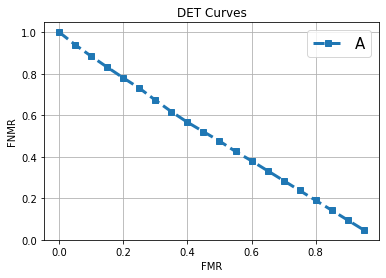

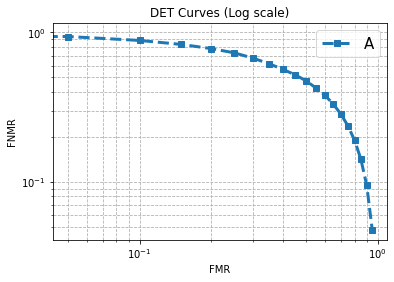

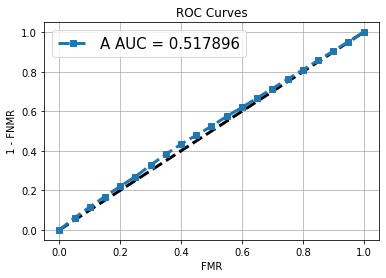

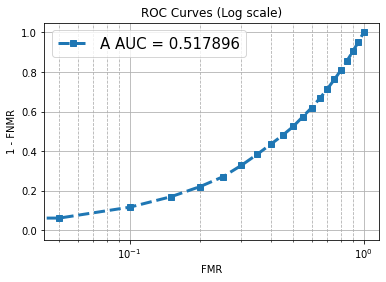

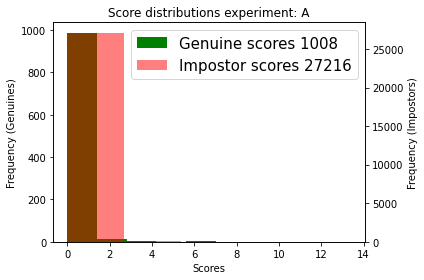

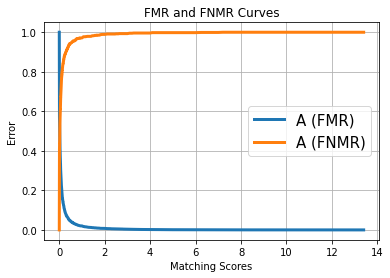

In [31]:
stat = get_eer_stats(genuine,imposter)
generate_eer_report([stat], ['A'], 'sift_report.html')
plot_eer_stats([stat], ['A'],save_plots=False,bins=5)

In [32]:
def plot_mk(stats, ids, hformat=False, bins=50,
                      lgf_size=15, save_plots=True, dpi=None,
                      save_path='', ext='.png'):

    for i, st in enumerate(stats):
        # Plotting score distributions
        title = 'Score distributions experiment: ' + ids[i]
        fig, ax1 = plt.subplots()

        ax1.grid(False)
        ax1.set_xlabel('Scores')
        ax1.set_title(title)
        ax1.set_ylabel('Frequency (Genuines)')

        ax2 = ax1.twinx()
        ax2.set_ylabel('Frequency (Impostors)')

        if hformat:
            # Obtaining histogram
            m = max(st.gen_scores)
            x = np.arange(m)
            ghist = np.histogram(st.gen_scores, bins=np.arange(m + 1))[0]

            ax1.plot(x, ghist, color='g',
                     label='Genuine scores %d' % len(st.gen_scores))

            x = np.arange(len(st.imp_scores))
            ax2.plot(x, st.imp_scores, color='r',
                     label='Impostor scores %d' % sum(st.imp_scores))
        else:
            ax1.hist(st.gen_scores, bins=bins, color='g',
                     label='Genuine scores %d' % len(st.gen_scores))
            ax2.hist(st.imp_scores, bins=bins, alpha=0.5, color='r',
                     label='Impostor scores %d' % len(st.imp_scores))

        fig.legend(prop=FontProperties(size=lgf_size), bbox_to_anchor=(1, 1),
                   bbox_transform=ax1.transAxes)
        fig.tight_layout()

        if save_plots:
            fig_name = 'Distributions (%s)' % ids[i] + ext
            fig.savefig(join(save_path, fig_name), dpi=dpi)
            plt.close('all')
        else:
            plt.show()

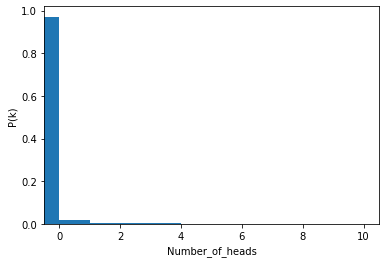

In [33]:
b = np.bincount(genuine,minlength=10)
#probability calculation
p = b / float(b.sum())
plt.bar(np.arange(len(b)) - 0.5, p, width=1)
plt.xlim(-0.5, 10 + 0.5)
plt.xlabel("Number_of_heads")
plt.ylabel("P(k)")

plt.show()

In [34]:
count = 0
total = 0
for i in range(length):
    total+=1
    if(float(id3[i]) >= 0.021277):
        count+=1

In [35]:
print("crr ="+str(count/total))

crr =0.4864654195011338
